In [1]:
import pickle
import os,sys
import numpy as np
from baseline.AKE.ake import AKE
from baseline.Kriging.kriging import OrdryKriging
from baseline.NMF.nmf import NMF
from baseline.ST_MVL.st_mvl import ST_MVL

In [2]:
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('../tensor2.pkl','rb') as f:
    tensor_array = pickle.load(f)

In [4]:
tensor_array[0].shape

(19, 7)

In [4]:
with open('../new_indices.pkl','rb') as f:
    new_indices = pickle.load(f)

In [5]:
tensor_array = np.array(tensor_array)
tensor_array = tensor_array[new_indices]

In [6]:
# write
with open('ake_loss_30.pkl','wb') as f:
    pickle.dump(ake_loss,f)

with open('kriging_loss_30.pkl','wb') as f:
    pickle.dump(kriging_loss,f)
    
with open('nmf_loss_30.pkl','wb') as f:
    pickle.dump(nmf_loss,f)

with open('st_mvl_loss_30.pkl','wb') as f:
    pickle.dump(st_mvl_loss,f)

NameError: name 'ake_loss' is not defined

In [7]:
# read 
with open('ake_loss_30.pkl','rb') as f:
    ake_loss_30 = pickle.load(f)

with open('kriging_loss_30.pkl','rb') as f:
    kriging_loss_30 = pickle.load(f)
    
with open('nmf_loss_30.pkl','rb') as f:
    nmf_loss_30 = pickle.load(f)
    
with open('st_mvl_loss_30.pkl','rb') as f:
    st_mvl_loss_30 = pickle.load(f)


EOFError: Ran out of input

In [15]:
# dump
with open('2_ake_loss_total.pkl','wb') as f:
    pickle.dump(ake_loss_total,f)
    
with open('2_kriging_loss_total.pkl','wb') as f:
    pickle.dump(kriging_loss_total,f)
    
with open('2_nmf_loss_total.pkl','wb') as f:
    pickle.dump(nmf_loss_total,f)
    
with open('2_st_mvl_loss_total.pkl','wb') as f:
    pickle.dump(st_mvl_loss_total,f)


In [8]:
# load 

with open('../2_ake_loss_total.pkl','rb') as f:
    ake_loss_total = np.array(pickle.load(f)) / 133

with open('../2_kriging_loss_total.pkl','rb') as f:
    kriging_loss_total = np.array(pickle.load(f)) / 133
    
with open('../2_nmf_loss_total.pkl','rb') as f:
    nmf_loss_total = np.array(pickle.load(f)) / 133

with open('../2_st_mvl_loss_total.pkl','rb') as f:
    st_mvl_loss_total = np.array(pickle.load(f)) /133

# read dcs reconstruction loss
with open('../2_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total = np.array(pickle.load(f))/133

with open('3_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total1 = np.array(pickle.load(f))/133

with open('4_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total2 = np.array(pickle.load(f))/133

with open('5_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total3 = np.array(pickle.load(f))/133

In [9]:
def generate_missing_matrix(data_matrix,miss_ratio=0.1):
    origin  = data_matrix.copy()
    spatial_size = data_matrix.shape[0]
    temporal_size = data_matrix.shape[1]
    k = round(spatial_size*temporal_size*miss_ratio)
    mask = np.ones_like(data_matrix)
    ri = np.random.choice(spatial_size*temporal_size,k,replace=False)
    origin.flat[ri] = 0
    mask.flat[ri] = 0
    return origin,mask
data_matrix,mask =generate_missing_matrix(tensor_array[0],0.3)

In [10]:
data_matrix

array([[ 0.   ,  9.725,  9.725,  9.6  ,  9.662,  9.725,  9.6  ],
       [ 9.912, 10.037,  9.912,  0.   ,  0.   ,  0.   ,  0.   ],
       [11.787,  0.   , 11.787, 11.725,  0.   , 11.662,  0.   ],
       [10.35 , 10.162, 10.225, 10.162, 10.1  ,  0.   , 10.037],
       [ 0.   , 10.1  , 10.35 ,  0.   , 10.287,  0.   , 10.225],
       [ 0.   , 11.412, 11.412, 11.412, 11.537, 11.537, 11.35 ],
       [ 8.162,  8.1  ,  7.662,  0.   ,  0.   ,  7.787,  7.662],
       [10.1  , 10.225, 10.287,  0.   ,  9.975, 10.1  , 10.037],
       [ 0.   ,  0.   , 10.225, 10.287,  0.   , 10.412, 10.225],
       [10.475, 10.475, 10.475,  0.   , 10.475, 10.475,  0.   ],
       [ 0.   ,  0.   ,  9.975,  9.85 ,  0.   ,  9.662,  9.662],
       [10.412, 10.225, 10.162,  0.   , 10.162, 10.1  ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  9.912,  9.975,  9.975],
       [10.6  , 10.412,  0.   , 10.35 , 10.475, 10.537, 10.475],
       [ 0.   ,  9.475,  0.   ,  0.   ,  0.   ,  9.287,  9.475],
       [10.162, 10.1  , 1

In [11]:
mask

array([[0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [12]:
def get_distance_matrix(data_matrix,linear=False):
    if not linear:
        spatial_length = data_matrix.shape[0]
        # print(spatial_length)
        dis_matrix = np.random.rand(spatial_length,spatial_length)
        dis_matrix += dis_matrix.T
        np.fill_diagonal(dis_matrix,0)
        return dis_matrix
    else:
        spatial_length = data_matrix.shape[0]
        dis_matrix = np.zeros((spatial_length,spatial_length))
        for i in range(spatial_length):
            dis_matrix[i][i:] = np.arange(0,spatial_length-i)
        dis_matrix = dis_matrix + dis_matrix.T
        return dis_matrix

In [13]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
ake_loss_total = []
kriging_loss_total = []
nmf_loss_total = []
st_mvl_loss_total = []



for miss_ratio in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    ake_loss = []
    kriging_loss = []
    nmf_loss = []
    st_mvl_loss = []  
    
    i = 0
    for tensor in tensor_array[:500]:
        data_matrix,mask = generate_missing_matrix(tensor,miss_ratio)
    
        ake = AKE()
        rec = ake.predict(data_matrix)
        ake_loss.append(np.sum(np.abs(rec-tensor)))
    
        odKrigin = OrdryKriging()
        odKrigin.train(data_matrix)
        rec1 = odKrigin.predict()
        kriging_loss.append(np.sum(np.abs(rec1-tensor)))
    
        nmf = NMF()
        rec2 = nmf.predict(data_matrix,mask)
        nmf_loss.append(np.sum(np.abs(rec2-tensor)))
    
        stmvl = ST_MVL()
        ds = get_distance_matrix(data_matrix,True)
        rec3 = stmvl.predict(data_matrix,ds)
        st_mvl_loss.append(np.sum(np.abs(rec3-tensor)))
    
        print('miss_ratio:{}, i:{}'.format(miss_ratio,i))
        i += 1
    
    ake_loss_total.append(ake_loss)
    kriging_loss_total.append(kriging_loss)
    nmf_loss_total.append(nmf_loss)
    st_mvl_loss_total.append(st_mvl_loss)

miss_ratio:0.1, i:0
miss_ratio:0.1, i:1
miss_ratio:0.1, i:2
miss_ratio:0.1, i:3
miss_ratio:0.1, i:4
miss_ratio:0.1, i:5
miss_ratio:0.1, i:6
miss_ratio:0.1, i:7
miss_ratio:0.1, i:8
miss_ratio:0.1, i:9
miss_ratio:0.1, i:10
miss_ratio:0.1, i:11
miss_ratio:0.1, i:12
miss_ratio:0.1, i:13
miss_ratio:0.1, i:14
miss_ratio:0.1, i:15
miss_ratio:0.1, i:16
miss_ratio:0.1, i:17
miss_ratio:0.1, i:18
miss_ratio:0.1, i:19
miss_ratio:0.1, i:20
miss_ratio:0.1, i:21
miss_ratio:0.1, i:22
miss_ratio:0.1, i:23
miss_ratio:0.1, i:24
miss_ratio:0.1, i:25
miss_ratio:0.1, i:26
miss_ratio:0.1, i:27
miss_ratio:0.1, i:28
miss_ratio:0.1, i:29
miss_ratio:0.1, i:30
miss_ratio:0.1, i:31
miss_ratio:0.1, i:32


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:33
miss_ratio:0.1, i:34
miss_ratio:0.1, i:35
miss_ratio:0.1, i:36
miss_ratio:0.1, i:37
miss_ratio:0.1, i:38
miss_ratio:0.1, i:39
miss_ratio:0.1, i:40
miss_ratio:0.1, i:41
miss_ratio:0.1, i:42
miss_ratio:0.1, i:43
miss_ratio:0.1, i:44
miss_ratio:0.1, i:45
miss_ratio:0.1, i:46
miss_ratio:0.1, i:47
miss_ratio:0.1, i:48
miss_ratio:0.1, i:49
miss_ratio:0.1, i:50
miss_ratio:0.1, i:51
miss_ratio:0.1, i:52
miss_ratio:0.1, i:53
miss_ratio:0.1, i:54
miss_ratio:0.1, i:55
miss_ratio:0.1, i:56
miss_ratio:0.1, i:57
miss_ratio:0.1, i:58
miss_ratio:0.1, i:59
miss_ratio:0.1, i:60
miss_ratio:0.1, i:61
miss_ratio:0.1, i:62
miss_ratio:0.1, i:63
miss_ratio:0.1, i:64
miss_ratio:0.1, i:65
miss_ratio:0.1, i:66
miss_ratio:0.1, i:67
miss_ratio:0.1, i:68
miss_ratio:0.1, i:69
miss_ratio:0.1, i:70
miss_ratio:0.1, i:71
miss_ratio:0.1, i:72
miss_ratio:0.1, i:73
miss_ratio:0.1, i:74
miss_ratio:0.1, i:75
miss_ratio:0.1, i:76
miss_ratio:0.1, i:77
miss_ratio:0.1, i:78
miss_ratio:0.1, i:79
miss_ratio:0.

/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:111
miss_ratio:0.1, i:112
miss_ratio:0.1, i:113
miss_ratio:0.1, i:114
miss_ratio:0.1, i:115
miss_ratio:0.1, i:116
miss_ratio:0.1, i:117
miss_ratio:0.1, i:118
miss_ratio:0.1, i:119
miss_ratio:0.1, i:120
miss_ratio:0.1, i:121
miss_ratio:0.1, i:122
miss_ratio:0.1, i:123
miss_ratio:0.1, i:124
miss_ratio:0.1, i:125
miss_ratio:0.1, i:126
miss_ratio:0.1, i:127


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:128
miss_ratio:0.1, i:129
miss_ratio:0.1, i:130
miss_ratio:0.1, i:131
miss_ratio:0.1, i:132


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:133
miss_ratio:0.1, i:134
miss_ratio:0.1, i:135
miss_ratio:0.1, i:136
miss_ratio:0.1, i:137
miss_ratio:0.1, i:138
miss_ratio:0.1, i:139


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:140
miss_ratio:0.1, i:141
miss_ratio:0.1, i:142


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:143
miss_ratio:0.1, i:144
miss_ratio:0.1, i:145
miss_ratio:0.1, i:146
miss_ratio:0.1, i:147
miss_ratio:0.1, i:148
miss_ratio:0.1, i:149
miss_ratio:0.1, i:150
miss_ratio:0.1, i:151
miss_ratio:0.1, i:152
miss_ratio:0.1, i:153
miss_ratio:0.1, i:154
miss_ratio:0.1, i:155
miss_ratio:0.1, i:156
miss_ratio:0.1, i:157
miss_ratio:0.1, i:158
miss_ratio:0.1, i:159
miss_ratio:0.1, i:160
miss_ratio:0.1, i:161
miss_ratio:0.1, i:162
miss_ratio:0.1, i:163
miss_ratio:0.1, i:164


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:165
miss_ratio:0.1, i:166
miss_ratio:0.1, i:167
miss_ratio:0.1, i:168
miss_ratio:0.1, i:169
miss_ratio:0.1, i:170
miss_ratio:0.1, i:171


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:172
miss_ratio:0.1, i:173
miss_ratio:0.1, i:174
miss_ratio:0.1, i:175
miss_ratio:0.1, i:176
miss_ratio:0.1, i:177
miss_ratio:0.1, i:178
miss_ratio:0.1, i:179
miss_ratio:0.1, i:180
miss_ratio:0.1, i:181
miss_ratio:0.1, i:182
miss_ratio:0.1, i:183
miss_ratio:0.1, i:184
miss_ratio:0.1, i:185
miss_ratio:0.1, i:186
miss_ratio:0.1, i:187
miss_ratio:0.1, i:188
miss_ratio:0.1, i:189
miss_ratio:0.1, i:190
miss_ratio:0.1, i:191
miss_ratio:0.1, i:192
miss_ratio:0.1, i:193
miss_ratio:0.1, i:194
miss_ratio:0.1, i:195
miss_ratio:0.1, i:196
miss_ratio:0.1, i:197
miss_ratio:0.1, i:198
miss_ratio:0.1, i:199
miss_ratio:0.1, i:200
miss_ratio:0.1, i:201
miss_ratio:0.1, i:202
miss_ratio:0.1, i:203
miss_ratio:0.1, i:204
miss_ratio:0.1, i:205
miss_ratio:0.1, i:206
miss_ratio:0.1, i:207
miss_ratio:0.1, i:208
miss_ratio:0.1, i:209
miss_ratio:0.1, i:210
miss_ratio:0.1, i:211
miss_ratio:0.1, i:212
miss_ratio:0.1, i:213
miss_ratio:0.1, i:214


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:215
miss_ratio:0.1, i:216
miss_ratio:0.1, i:217
miss_ratio:0.1, i:218
miss_ratio:0.1, i:219


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:220
miss_ratio:0.1, i:221
miss_ratio:0.1, i:222
miss_ratio:0.1, i:223
miss_ratio:0.1, i:224
miss_ratio:0.1, i:225
miss_ratio:0.1, i:226
miss_ratio:0.1, i:227
miss_ratio:0.1, i:228
miss_ratio:0.1, i:229
miss_ratio:0.1, i:230
miss_ratio:0.1, i:231
miss_ratio:0.1, i:232


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:233
miss_ratio:0.1, i:234
miss_ratio:0.1, i:235
miss_ratio:0.1, i:236
miss_ratio:0.1, i:237
miss_ratio:0.1, i:238
miss_ratio:0.1, i:239
miss_ratio:0.1, i:240
miss_ratio:0.1, i:241
miss_ratio:0.1, i:242
miss_ratio:0.1, i:243
miss_ratio:0.1, i:244
miss_ratio:0.1, i:245
miss_ratio:0.1, i:246
miss_ratio:0.1, i:247
miss_ratio:0.1, i:248
miss_ratio:0.1, i:249
miss_ratio:0.1, i:250
miss_ratio:0.1, i:251
miss_ratio:0.1, i:252
miss_ratio:0.1, i:253
miss_ratio:0.1, i:254
miss_ratio:0.1, i:255
miss_ratio:0.1, i:256
miss_ratio:0.1, i:257
miss_ratio:0.1, i:258
miss_ratio:0.1, i:259
miss_ratio:0.1, i:260
miss_ratio:0.1, i:261
miss_ratio:0.1, i:262
miss_ratio:0.1, i:263
miss_ratio:0.1, i:264
miss_ratio:0.1, i:265
miss_ratio:0.1, i:266
miss_ratio:0.1, i:267
miss_ratio:0.1, i:268
miss_ratio:0.1, i:269
miss_ratio:0.1, i:270
miss_ratio:0.1, i:271
miss_ratio:0.1, i:272
miss_ratio:0.1, i:273
miss_ratio:0.1, i:274
miss_ratio:0.1, i:275
miss_ratio:0.1, i:276
miss_ratio:0.1, i:277
miss_ratio

/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:288
miss_ratio:0.1, i:289
miss_ratio:0.1, i:290
miss_ratio:0.1, i:291
miss_ratio:0.1, i:292
miss_ratio:0.1, i:293
miss_ratio:0.1, i:294
miss_ratio:0.1, i:295
miss_ratio:0.1, i:296
miss_ratio:0.1, i:297
miss_ratio:0.1, i:298
miss_ratio:0.1, i:299
miss_ratio:0.1, i:300
miss_ratio:0.1, i:301
miss_ratio:0.1, i:302
miss_ratio:0.1, i:303
miss_ratio:0.1, i:304
miss_ratio:0.1, i:305
miss_ratio:0.1, i:306
miss_ratio:0.1, i:307
miss_ratio:0.1, i:308
miss_ratio:0.1, i:309
miss_ratio:0.1, i:310
miss_ratio:0.1, i:311
miss_ratio:0.1, i:312
miss_ratio:0.1, i:313
miss_ratio:0.1, i:314
miss_ratio:0.1, i:315
miss_ratio:0.1, i:316
miss_ratio:0.1, i:317
miss_ratio:0.1, i:318
miss_ratio:0.1, i:319
miss_ratio:0.1, i:320
miss_ratio:0.1, i:321
miss_ratio:0.1, i:322
miss_ratio:0.1, i:323
miss_ratio:0.1, i:324
miss_ratio:0.1, i:325
miss_ratio:0.1, i:326
miss_ratio:0.1, i:327
miss_ratio:0.1, i:328
miss_ratio:0.1, i:329
miss_ratio:0.1, i:330
miss_ratio:0.1, i:331


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:332
miss_ratio:0.1, i:333
miss_ratio:0.1, i:334
miss_ratio:0.1, i:335
miss_ratio:0.1, i:336
miss_ratio:0.1, i:337
miss_ratio:0.1, i:338
miss_ratio:0.1, i:339
miss_ratio:0.1, i:340
miss_ratio:0.1, i:341
miss_ratio:0.1, i:342
miss_ratio:0.1, i:343


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:344
miss_ratio:0.1, i:345
miss_ratio:0.1, i:346
miss_ratio:0.1, i:347
miss_ratio:0.1, i:348
miss_ratio:0.1, i:349
miss_ratio:0.1, i:350
miss_ratio:0.1, i:351
miss_ratio:0.1, i:352
miss_ratio:0.1, i:353
miss_ratio:0.1, i:354
miss_ratio:0.1, i:355
miss_ratio:0.1, i:356
miss_ratio:0.1, i:357
miss_ratio:0.1, i:358
miss_ratio:0.1, i:359
miss_ratio:0.1, i:360
miss_ratio:0.1, i:361
miss_ratio:0.1, i:362


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:363
miss_ratio:0.1, i:364
miss_ratio:0.1, i:365
miss_ratio:0.1, i:366
miss_ratio:0.1, i:367
miss_ratio:0.1, i:368
miss_ratio:0.1, i:369
miss_ratio:0.1, i:370
miss_ratio:0.1, i:371
miss_ratio:0.1, i:372
miss_ratio:0.1, i:373
miss_ratio:0.1, i:374
miss_ratio:0.1, i:375
miss_ratio:0.1, i:376
miss_ratio:0.1, i:377
miss_ratio:0.1, i:378
miss_ratio:0.1, i:379
miss_ratio:0.1, i:380
miss_ratio:0.1, i:381
miss_ratio:0.1, i:382
miss_ratio:0.1, i:383
miss_ratio:0.1, i:384
miss_ratio:0.1, i:385
miss_ratio:0.1, i:386
miss_ratio:0.1, i:387
miss_ratio:0.1, i:388
miss_ratio:0.1, i:389
miss_ratio:0.1, i:390
miss_ratio:0.1, i:391
miss_ratio:0.1, i:392
miss_ratio:0.1, i:393
miss_ratio:0.1, i:394
miss_ratio:0.1, i:395
miss_ratio:0.1, i:396
miss_ratio:0.1, i:397


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:398
miss_ratio:0.1, i:399
miss_ratio:0.1, i:400
miss_ratio:0.1, i:401
miss_ratio:0.1, i:402
miss_ratio:0.1, i:403
miss_ratio:0.1, i:404
miss_ratio:0.1, i:405
miss_ratio:0.1, i:406
miss_ratio:0.1, i:407
miss_ratio:0.1, i:408
miss_ratio:0.1, i:409
miss_ratio:0.1, i:410
miss_ratio:0.1, i:411
miss_ratio:0.1, i:412
miss_ratio:0.1, i:413
miss_ratio:0.1, i:414
miss_ratio:0.1, i:415
miss_ratio:0.1, i:416
miss_ratio:0.1, i:417
miss_ratio:0.1, i:418
miss_ratio:0.1, i:419
miss_ratio:0.1, i:420
miss_ratio:0.1, i:421
miss_ratio:0.1, i:422
miss_ratio:0.1, i:423
miss_ratio:0.1, i:424
miss_ratio:0.1, i:425
miss_ratio:0.1, i:426
miss_ratio:0.1, i:427
miss_ratio:0.1, i:428
miss_ratio:0.1, i:429


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:430
miss_ratio:0.1, i:431
miss_ratio:0.1, i:432
miss_ratio:0.1, i:433
miss_ratio:0.1, i:434
miss_ratio:0.1, i:435
miss_ratio:0.1, i:436
miss_ratio:0.1, i:437
miss_ratio:0.1, i:438
miss_ratio:0.1, i:439
miss_ratio:0.1, i:440
miss_ratio:0.1, i:441
miss_ratio:0.1, i:442
miss_ratio:0.1, i:443
miss_ratio:0.1, i:444
miss_ratio:0.1, i:445
miss_ratio:0.1, i:446
miss_ratio:0.1, i:447
miss_ratio:0.1, i:448
miss_ratio:0.1, i:449
miss_ratio:0.1, i:450
miss_ratio:0.1, i:451
miss_ratio:0.1, i:452
miss_ratio:0.1, i:453
miss_ratio:0.1, i:454
miss_ratio:0.1, i:455
miss_ratio:0.1, i:456


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:457
miss_ratio:0.1, i:458
miss_ratio:0.1, i:459
miss_ratio:0.1, i:460
miss_ratio:0.1, i:461
miss_ratio:0.1, i:462
miss_ratio:0.1, i:463
miss_ratio:0.1, i:464


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.1, i:465
miss_ratio:0.1, i:466
miss_ratio:0.1, i:467
miss_ratio:0.1, i:468
miss_ratio:0.1, i:469
miss_ratio:0.1, i:470
miss_ratio:0.1, i:471
miss_ratio:0.1, i:472
miss_ratio:0.1, i:473
miss_ratio:0.1, i:474
miss_ratio:0.1, i:475
miss_ratio:0.1, i:476
miss_ratio:0.1, i:477
miss_ratio:0.1, i:478
miss_ratio:0.1, i:479
miss_ratio:0.1, i:480
miss_ratio:0.1, i:481
miss_ratio:0.1, i:482
miss_ratio:0.1, i:483
miss_ratio:0.1, i:484
miss_ratio:0.1, i:485
miss_ratio:0.1, i:486
miss_ratio:0.1, i:487
miss_ratio:0.1, i:488
miss_ratio:0.1, i:489
miss_ratio:0.1, i:490
miss_ratio:0.1, i:491
miss_ratio:0.1, i:492
miss_ratio:0.1, i:493
miss_ratio:0.1, i:494
miss_ratio:0.1, i:495
miss_ratio:0.1, i:496
miss_ratio:0.1, i:497
miss_ratio:0.1, i:498
miss_ratio:0.1, i:499
miss_ratio:0.2, i:0
miss_ratio:0.2, i:1
miss_ratio:0.2, i:2
miss_ratio:0.2, i:3
miss_ratio:0.2, i:4
miss_ratio:0.2, i:5


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:6
miss_ratio:0.2, i:7
miss_ratio:0.2, i:8
miss_ratio:0.2, i:9
miss_ratio:0.2, i:10
miss_ratio:0.2, i:11
miss_ratio:0.2, i:12
miss_ratio:0.2, i:13
miss_ratio:0.2, i:14
miss_ratio:0.2, i:15


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:16
miss_ratio:0.2, i:17
miss_ratio:0.2, i:18
miss_ratio:0.2, i:19


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:20
miss_ratio:0.2, i:21
miss_ratio:0.2, i:22
miss_ratio:0.2, i:23
miss_ratio:0.2, i:24
miss_ratio:0.2, i:25
miss_ratio:0.2, i:26
miss_ratio:0.2, i:27
miss_ratio:0.2, i:28
miss_ratio:0.2, i:29
miss_ratio:0.2, i:30
miss_ratio:0.2, i:31


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:32
miss_ratio:0.2, i:33
miss_ratio:0.2, i:34
miss_ratio:0.2, i:35
miss_ratio:0.2, i:36
miss_ratio:0.2, i:37


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:38
miss_ratio:0.2, i:39
miss_ratio:0.2, i:40
miss_ratio:0.2, i:41
miss_ratio:0.2, i:42
miss_ratio:0.2, i:43
miss_ratio:0.2, i:44
miss_ratio:0.2, i:45
miss_ratio:0.2, i:46
miss_ratio:0.2, i:47
miss_ratio:0.2, i:48
miss_ratio:0.2, i:49


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:50
miss_ratio:0.2, i:51
miss_ratio:0.2, i:52
miss_ratio:0.2, i:53
miss_ratio:0.2, i:54
miss_ratio:0.2, i:55
miss_ratio:0.2, i:56
miss_ratio:0.2, i:57
miss_ratio:0.2, i:58
miss_ratio:0.2, i:59


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:60
miss_ratio:0.2, i:61
miss_ratio:0.2, i:62
miss_ratio:0.2, i:63


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:64
miss_ratio:0.2, i:65


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:66
miss_ratio:0.2, i:67
miss_ratio:0.2, i:68
miss_ratio:0.2, i:69
miss_ratio:0.2, i:70
miss_ratio:0.2, i:71
miss_ratio:0.2, i:72
miss_ratio:0.2, i:73
miss_ratio:0.2, i:74
miss_ratio:0.2, i:75
miss_ratio:0.2, i:76
miss_ratio:0.2, i:77
miss_ratio:0.2, i:78
miss_ratio:0.2, i:79
miss_ratio:0.2, i:80
miss_ratio:0.2, i:81
miss_ratio:0.2, i:82
miss_ratio:0.2, i:83
miss_ratio:0.2, i:84
miss_ratio:0.2, i:85
miss_ratio:0.2, i:86
miss_ratio:0.2, i:87
miss_ratio:0.2, i:88
miss_ratio:0.2, i:89


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:90
miss_ratio:0.2, i:91
miss_ratio:0.2, i:92
miss_ratio:0.2, i:93
miss_ratio:0.2, i:94
miss_ratio:0.2, i:95
miss_ratio:0.2, i:96
miss_ratio:0.2, i:97


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:98
miss_ratio:0.2, i:99
miss_ratio:0.2, i:100
miss_ratio:0.2, i:101
miss_ratio:0.2, i:102
miss_ratio:0.2, i:103
miss_ratio:0.2, i:104
miss_ratio:0.2, i:105


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:106
miss_ratio:0.2, i:107


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:108
miss_ratio:0.2, i:109
miss_ratio:0.2, i:110
miss_ratio:0.2, i:111
miss_ratio:0.2, i:112
miss_ratio:0.2, i:113
miss_ratio:0.2, i:114
miss_ratio:0.2, i:115
miss_ratio:0.2, i:116
miss_ratio:0.2, i:117
miss_ratio:0.2, i:118
miss_ratio:0.2, i:119


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:120
miss_ratio:0.2, i:121
miss_ratio:0.2, i:122
miss_ratio:0.2, i:123
miss_ratio:0.2, i:124
miss_ratio:0.2, i:125
miss_ratio:0.2, i:126
miss_ratio:0.2, i:127


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:128
miss_ratio:0.2, i:129
miss_ratio:0.2, i:130
miss_ratio:0.2, i:131
miss_ratio:0.2, i:132
miss_ratio:0.2, i:133


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:134
miss_ratio:0.2, i:135


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:136
miss_ratio:0.2, i:137


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.2, i:138
miss_ratio:0.2, i:139


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:140
miss_ratio:0.2, i:141
miss_ratio:0.2, i:142
miss_ratio:0.2, i:143


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:144
miss_ratio:0.2, i:145
miss_ratio:0.2, i:146
miss_ratio:0.2, i:147


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:148
miss_ratio:0.2, i:149
miss_ratio:0.2, i:150
miss_ratio:0.2, i:151


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:152
miss_ratio:0.2, i:153
miss_ratio:0.2, i:154
miss_ratio:0.2, i:155


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:156
miss_ratio:0.2, i:157
miss_ratio:0.2, i:158
miss_ratio:0.2, i:159


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:160
miss_ratio:0.2, i:161
miss_ratio:0.2, i:162
miss_ratio:0.2, i:163


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:164
miss_ratio:0.2, i:165


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:166
miss_ratio:0.2, i:167


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:168
miss_ratio:0.2, i:169


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:170
miss_ratio:0.2, i:171
miss_ratio:0.2, i:172
miss_ratio:0.2, i:173
miss_ratio:0.2, i:174
miss_ratio:0.2, i:175
miss_ratio:0.2, i:176
miss_ratio:0.2, i:177
miss_ratio:0.2, i:178
miss_ratio:0.2, i:179
miss_ratio:0.2, i:180
miss_ratio:0.2, i:181
miss_ratio:0.2, i:182
miss_ratio:0.2, i:183
miss_ratio:0.2, i:184
miss_ratio:0.2, i:185
miss_ratio:0.2, i:186
miss_ratio:0.2, i:187
miss_ratio:0.2, i:188
miss_ratio:0.2, i:189
miss_ratio:0.2, i:190
miss_ratio:0.2, i:191


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:192
miss_ratio:0.2, i:193
miss_ratio:0.2, i:194
miss_ratio:0.2, i:195
miss_ratio:0.2, i:196
miss_ratio:0.2, i:197
miss_ratio:0.2, i:198
miss_ratio:0.2, i:199
miss_ratio:0.2, i:200
miss_ratio:0.2, i:201


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:202
miss_ratio:0.2, i:203
miss_ratio:0.2, i:204
miss_ratio:0.2, i:205


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.2, i:206
miss_ratio:0.2, i:207
miss_ratio:0.2, i:208
miss_ratio:0.2, i:209


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:210
miss_ratio:0.2, i:211
miss_ratio:0.2, i:212
miss_ratio:0.2, i:213
miss_ratio:0.2, i:214
miss_ratio:0.2, i:215


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:216
miss_ratio:0.2, i:217


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:218
miss_ratio:0.2, i:219
miss_ratio:0.2, i:220
miss_ratio:0.2, i:221
miss_ratio:0.2, i:222
miss_ratio:0.2, i:223
miss_ratio:0.2, i:224
miss_ratio:0.2, i:225
miss_ratio:0.2, i:226
miss_ratio:0.2, i:227
miss_ratio:0.2, i:228
miss_ratio:0.2, i:229
miss_ratio:0.2, i:230
miss_ratio:0.2, i:231


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:232
miss_ratio:0.2, i:233
miss_ratio:0.2, i:234
miss_ratio:0.2, i:235
miss_ratio:0.2, i:236
miss_ratio:0.2, i:237


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:238
miss_ratio:0.2, i:239
miss_ratio:0.2, i:240
miss_ratio:0.2, i:241


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:242
miss_ratio:0.2, i:243
miss_ratio:0.2, i:244
miss_ratio:0.2, i:245


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:246
miss_ratio:0.2, i:247
miss_ratio:0.2, i:248
miss_ratio:0.2, i:249
miss_ratio:0.2, i:250
miss_ratio:0.2, i:251
miss_ratio:0.2, i:252
miss_ratio:0.2, i:253
miss_ratio:0.2, i:254
miss_ratio:0.2, i:255


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:256
miss_ratio:0.2, i:257
miss_ratio:0.2, i:258
miss_ratio:0.2, i:259
miss_ratio:0.2, i:260
miss_ratio:0.2, i:261
miss_ratio:0.2, i:262
miss_ratio:0.2, i:263
miss_ratio:0.2, i:264
miss_ratio:0.2, i:265
miss_ratio:0.2, i:266
miss_ratio:0.2, i:267
miss_ratio:0.2, i:268
miss_ratio:0.2, i:269
miss_ratio:0.2, i:270
miss_ratio:0.2, i:271
miss_ratio:0.2, i:272
miss_ratio:0.2, i:273
miss_ratio:0.2, i:274
miss_ratio:0.2, i:275
miss_ratio:0.2, i:276
miss_ratio:0.2, i:277
miss_ratio:0.2, i:278
miss_ratio:0.2, i:279
miss_ratio:0.2, i:280
miss_ratio:0.2, i:281
miss_ratio:0.2, i:282
miss_ratio:0.2, i:283


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:284
miss_ratio:0.2, i:285
miss_ratio:0.2, i:286
miss_ratio:0.2, i:287
miss_ratio:0.2, i:288
miss_ratio:0.2, i:289
miss_ratio:0.2, i:290
miss_ratio:0.2, i:291


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:292
miss_ratio:0.2, i:293
miss_ratio:0.2, i:294
miss_ratio:0.2, i:295
miss_ratio:0.2, i:296
miss_ratio:0.2, i:297
miss_ratio:0.2, i:298
miss_ratio:0.2, i:299
miss_ratio:0.2, i:300
miss_ratio:0.2, i:301
miss_ratio:0.2, i:302
miss_ratio:0.2, i:303
miss_ratio:0.2, i:304
miss_ratio:0.2, i:305
miss_ratio:0.2, i:306
miss_ratio:0.2, i:307
miss_ratio:0.2, i:308
miss_ratio:0.2, i:309
miss_ratio:0.2, i:310
miss_ratio:0.2, i:311
miss_ratio:0.2, i:312
miss_ratio:0.2, i:313
miss_ratio:0.2, i:314
miss_ratio:0.2, i:315
miss_ratio:0.2, i:316
miss_ratio:0.2, i:317
miss_ratio:0.2, i:318
miss_ratio:0.2, i:319
miss_ratio:0.2, i:320
miss_ratio:0.2, i:321


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:322
miss_ratio:0.2, i:323
miss_ratio:0.2, i:324
miss_ratio:0.2, i:325
miss_ratio:0.2, i:326
miss_ratio:0.2, i:327
miss_ratio:0.2, i:328
miss_ratio:0.2, i:329


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:330
miss_ratio:0.2, i:331


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:332
miss_ratio:0.2, i:333


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:334
miss_ratio:0.2, i:335


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:336
miss_ratio:0.2, i:337
miss_ratio:0.2, i:338
miss_ratio:0.2, i:339


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:340
miss_ratio:0.2, i:341
miss_ratio:0.2, i:342
miss_ratio:0.2, i:343
miss_ratio:0.2, i:344
miss_ratio:0.2, i:345
miss_ratio:0.2, i:346
miss_ratio:0.2, i:347


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:348
miss_ratio:0.2, i:349
miss_ratio:0.2, i:350
miss_ratio:0.2, i:351
miss_ratio:0.2, i:352
miss_ratio:0.2, i:353


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:354
miss_ratio:0.2, i:355
miss_ratio:0.2, i:356
miss_ratio:0.2, i:357
miss_ratio:0.2, i:358
miss_ratio:0.2, i:359


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:360
miss_ratio:0.2, i:361
miss_ratio:0.2, i:362
miss_ratio:0.2, i:363


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:364
miss_ratio:0.2, i:365
miss_ratio:0.2, i:366
miss_ratio:0.2, i:367
miss_ratio:0.2, i:368
miss_ratio:0.2, i:369
miss_ratio:0.2, i:370
miss_ratio:0.2, i:371


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:372
miss_ratio:0.2, i:373
miss_ratio:0.2, i:374
miss_ratio:0.2, i:375


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:376
miss_ratio:0.2, i:377
miss_ratio:0.2, i:378
miss_ratio:0.2, i:379


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:380
miss_ratio:0.2, i:381
miss_ratio:0.2, i:382
miss_ratio:0.2, i:383
miss_ratio:0.2, i:384
miss_ratio:0.2, i:385
miss_ratio:0.2, i:386
miss_ratio:0.2, i:387


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:388
miss_ratio:0.2, i:389


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:390
miss_ratio:0.2, i:391


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:392
miss_ratio:0.2, i:393
miss_ratio:0.2, i:394
miss_ratio:0.2, i:395
miss_ratio:0.2, i:396
miss_ratio:0.2, i:397
miss_ratio:0.2, i:398
miss_ratio:0.2, i:399
miss_ratio:0.2, i:400
miss_ratio:0.2, i:401


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:402
miss_ratio:0.2, i:403
miss_ratio:0.2, i:404
miss_ratio:0.2, i:405
miss_ratio:0.2, i:406
miss_ratio:0.2, i:407
miss_ratio:0.2, i:408
miss_ratio:0.2, i:409
miss_ratio:0.2, i:410
miss_ratio:0.2, i:411
miss_ratio:0.2, i:412
miss_ratio:0.2, i:413
miss_ratio:0.2, i:414
miss_ratio:0.2, i:415


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:416
miss_ratio:0.2, i:417
miss_ratio:0.2, i:418
miss_ratio:0.2, i:419
miss_ratio:0.2, i:420
miss_ratio:0.2, i:421
miss_ratio:0.2, i:422
miss_ratio:0.2, i:423


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:424
miss_ratio:0.2, i:425
miss_ratio:0.2, i:426
miss_ratio:0.2, i:427
miss_ratio:0.2, i:428
miss_ratio:0.2, i:429
miss_ratio:0.2, i:430
miss_ratio:0.2, i:431
miss_ratio:0.2, i:432
miss_ratio:0.2, i:433
miss_ratio:0.2, i:434
miss_ratio:0.2, i:435
miss_ratio:0.2, i:436
miss_ratio:0.2, i:437
miss_ratio:0.2, i:438
miss_ratio:0.2, i:439
miss_ratio:0.2, i:440
miss_ratio:0.2, i:441


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:442
miss_ratio:0.2, i:443
miss_ratio:0.2, i:444
miss_ratio:0.2, i:445
miss_ratio:0.2, i:446
miss_ratio:0.2, i:447
miss_ratio:0.2, i:448
miss_ratio:0.2, i:449


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:450
miss_ratio:0.2, i:451


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:452
miss_ratio:0.2, i:453


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:454
miss_ratio:0.2, i:455


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:456
miss_ratio:0.2, i:457
miss_ratio:0.2, i:458
miss_ratio:0.2, i:459


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:460
miss_ratio:0.2, i:461
miss_ratio:0.2, i:462
miss_ratio:0.2, i:463
miss_ratio:0.2, i:464
miss_ratio:0.2, i:465


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:466
miss_ratio:0.2, i:467
miss_ratio:0.2, i:468
miss_ratio:0.2, i:469


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:470
miss_ratio:0.2, i:471
miss_ratio:0.2, i:472
miss_ratio:0.2, i:473
miss_ratio:0.2, i:474
miss_ratio:0.2, i:475
miss_ratio:0.2, i:476
miss_ratio:0.2, i:477


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.2, i:478
miss_ratio:0.2, i:479
miss_ratio:0.2, i:480
miss_ratio:0.2, i:481
miss_ratio:0.2, i:482
miss_ratio:0.2, i:483
miss_ratio:0.2, i:484
miss_ratio:0.2, i:485
miss_ratio:0.2, i:486
miss_ratio:0.2, i:487
miss_ratio:0.2, i:488
miss_ratio:0.2, i:489


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.2, i:490
miss_ratio:0.2, i:491
miss_ratio:0.2, i:492
miss_ratio:0.2, i:493
miss_ratio:0.2, i:494
miss_ratio:0.2, i:495
miss_ratio:0.2, i:496
miss_ratio:0.2, i:497
miss_ratio:0.2, i:498
miss_ratio:0.2, i:499
miss_ratio:0.3, i:0
miss_ratio:0.3, i:1
miss_ratio:0.3, i:2
miss_ratio:0.3, i:3


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:4
miss_ratio:0.3, i:5


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:6
miss_ratio:0.3, i:7


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:8
miss_ratio:0.3, i:9


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:10
miss_ratio:0.3, i:11
miss_ratio:0.3, i:12
miss_ratio:0.3, i:13


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:14
miss_ratio:0.3, i:15
miss_ratio:0.3, i:16
miss_ratio:0.3, i:17
miss_ratio:0.3, i:18
miss_ratio:0.3, i:19
miss_ratio:0.3, i:20
miss_ratio:0.3, i:21


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:22
miss_ratio:0.3, i:23


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:24
miss_ratio:0.3, i:25


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:26
miss_ratio:0.3, i:27


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:28
miss_ratio:0.3, i:29


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:30
miss_ratio:0.3, i:31


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:32
miss_ratio:0.3, i:33
miss_ratio:0.3, i:34
miss_ratio:0.3, i:35


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:36
miss_ratio:0.3, i:37
miss_ratio:0.3, i:38
miss_ratio:0.3, i:39


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:40
miss_ratio:0.3, i:41
miss_ratio:0.3, i:42
miss_ratio:0.3, i:43


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:44
miss_ratio:0.3, i:45
miss_ratio:0.3, i:46
miss_ratio:0.3, i:47


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:48
miss_ratio:0.3, i:49


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:50
miss_ratio:0.3, i:51
miss_ratio:0.3, i:52
miss_ratio:0.3, i:53


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:54
miss_ratio:0.3, i:55
miss_ratio:0.3, i:56
miss_ratio:0.3, i:57
miss_ratio:0.3, i:58
miss_ratio:0.3, i:59


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:60
miss_ratio:0.3, i:61


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:62
miss_ratio:0.3, i:63


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:64
miss_ratio:0.3, i:65


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:66
miss_ratio:0.3, i:67


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:68
miss_ratio:0.3, i:69
miss_ratio:0.3, i:70
miss_ratio:0.3, i:71


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:72
miss_ratio:0.3, i:73


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:74
miss_ratio:0.3, i:75


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:76
miss_ratio:0.3, i:77
miss_ratio:0.3, i:78
miss_ratio:0.3, i:79


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:80
miss_ratio:0.3, i:81


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:82
miss_ratio:0.3, i:83


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:84
miss_ratio:0.3, i:85
miss_ratio:0.3, i:86
miss_ratio:0.3, i:87


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:88
miss_ratio:0.3, i:89
miss_ratio:0.3, i:90
miss_ratio:0.3, i:91
miss_ratio:0.3, i:92
miss_ratio:0.3, i:93


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:94
miss_ratio:0.3, i:95


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:96
miss_ratio:0.3, i:97
miss_ratio:0.3, i:98
miss_ratio:0.3, i:99


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:100
miss_ratio:0.3, i:101


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:102
miss_ratio:0.3, i:103


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:104
miss_ratio:0.3, i:105
miss_ratio:0.3, i:106
miss_ratio:0.3, i:107


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:108
miss_ratio:0.3, i:109


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:110
miss_ratio:0.3, i:111


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:112
miss_ratio:0.3, i:113
miss_ratio:0.3, i:114
miss_ratio:0.3, i:115


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:116
miss_ratio:0.3, i:117


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:118
miss_ratio:0.3, i:119


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:120
miss_ratio:0.3, i:121


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:122
miss_ratio:0.3, i:123


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:124
miss_ratio:0.3, i:125
miss_ratio:0.3, i:126
miss_ratio:0.3, i:127


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:128
miss_ratio:0.3, i:129


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:130
miss_ratio:0.3, i:131


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:132
miss_ratio:0.3, i:133


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:134
miss_ratio:0.3, i:135


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:136
miss_ratio:0.3, i:137


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:138
miss_ratio:0.3, i:139


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:140
miss_ratio:0.3, i:141
miss_ratio:0.3, i:142
miss_ratio:0.3, i:143


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:144
miss_ratio:0.3, i:145


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:146
miss_ratio:0.3, i:147


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:148
miss_ratio:0.3, i:149


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:150
miss_ratio:0.3, i:151


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:152
miss_ratio:0.3, i:153
miss_ratio:0.3, i:154
miss_ratio:0.3, i:155


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:156
miss_ratio:0.3, i:157


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:158
miss_ratio:0.3, i:159


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:160
miss_ratio:0.3, i:161


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:162
miss_ratio:0.3, i:163


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:164
miss_ratio:0.3, i:165


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:166
miss_ratio:0.3, i:167
miss_ratio:0.3, i:168
miss_ratio:0.3, i:169


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:170
miss_ratio:0.3, i:171


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:172
miss_ratio:0.3, i:173


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:174
miss_ratio:0.3, i:175


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:176
miss_ratio:0.3, i:177


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:178
miss_ratio:0.3, i:179


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:180
miss_ratio:0.3, i:181


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:182
miss_ratio:0.3, i:183


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:184
miss_ratio:0.3, i:185


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:186
miss_ratio:0.3, i:187
miss_ratio:0.3, i:188
miss_ratio:0.3, i:189


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:190
miss_ratio:0.3, i:191


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:192
miss_ratio:0.3, i:193


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:194
miss_ratio:0.3, i:195
miss_ratio:0.3, i:196
miss_ratio:0.3, i:197


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:198
miss_ratio:0.3, i:199
miss_ratio:0.3, i:200
miss_ratio:0.3, i:201


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:202
miss_ratio:0.3, i:203


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:204
miss_ratio:0.3, i:205


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:206
miss_ratio:0.3, i:207


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:208
miss_ratio:0.3, i:209
miss_ratio:0.3, i:210
miss_ratio:0.3, i:211
miss_ratio:0.3, i:212
miss_ratio:0.3, i:213


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:214
miss_ratio:0.3, i:215


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:216
miss_ratio:0.3, i:217
miss_ratio:0.3, i:218
miss_ratio:0.3, i:219


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:220
miss_ratio:0.3, i:221


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:222
miss_ratio:0.3, i:223


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:224
miss_ratio:0.3, i:225
miss_ratio:0.3, i:226
miss_ratio:0.3, i:227


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:228
miss_ratio:0.3, i:229
miss_ratio:0.3, i:230
miss_ratio:0.3, i:231
miss_ratio:0.3, i:232
miss_ratio:0.3, i:233


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:234
miss_ratio:0.3, i:235
miss_ratio:0.3, i:236
miss_ratio:0.3, i:237
miss_ratio:0.3, i:238
miss_ratio:0.3, i:239
miss_ratio:0.3, i:240
miss_ratio:0.3, i:241


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:242
miss_ratio:0.3, i:243


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:244
miss_ratio:0.3, i:245


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:246
miss_ratio:0.3, i:247
miss_ratio:0.3, i:248
miss_ratio:0.3, i:249


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:250
miss_ratio:0.3, i:251
miss_ratio:0.3, i:252
miss_ratio:0.3, i:253


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:254
miss_ratio:0.3, i:255
miss_ratio:0.3, i:256
miss_ratio:0.3, i:257


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:258
miss_ratio:0.3, i:259


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:260
miss_ratio:0.3, i:261


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:262
miss_ratio:0.3, i:263


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:264
miss_ratio:0.3, i:265


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:266
miss_ratio:0.3, i:267
miss_ratio:0.3, i:268
miss_ratio:0.3, i:269


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:270
miss_ratio:0.3, i:271


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:272
miss_ratio:0.3, i:273
miss_ratio:0.3, i:274
miss_ratio:0.3, i:275
miss_ratio:0.3, i:276
miss_ratio:0.3, i:277


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:278
miss_ratio:0.3, i:279
miss_ratio:0.3, i:280
miss_ratio:0.3, i:281


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:282
miss_ratio:0.3, i:283


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:284
miss_ratio:0.3, i:285


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:286
miss_ratio:0.3, i:287


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:288
miss_ratio:0.3, i:289
miss_ratio:0.3, i:290
miss_ratio:0.3, i:291


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:292
miss_ratio:0.3, i:293


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:294
miss_ratio:0.3, i:295
miss_ratio:0.3, i:296
miss_ratio:0.3, i:297


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:298
miss_ratio:0.3, i:299


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:300
miss_ratio:0.3, i:301
miss_ratio:0.3, i:302
miss_ratio:0.3, i:303


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:304
miss_ratio:0.3, i:305
miss_ratio:0.3, i:306
miss_ratio:0.3, i:307


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:308
miss_ratio:0.3, i:309


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:310
miss_ratio:0.3, i:311


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:312
miss_ratio:0.3, i:313
miss_ratio:0.3, i:314
miss_ratio:0.3, i:315


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:316
miss_ratio:0.3, i:317


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:318
miss_ratio:0.3, i:319
miss_ratio:0.3, i:320
miss_ratio:0.3, i:321


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:322
miss_ratio:0.3, i:323
miss_ratio:0.3, i:324
miss_ratio:0.3, i:325


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:326
miss_ratio:0.3, i:327


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:328
miss_ratio:0.3, i:329


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:330
miss_ratio:0.3, i:331


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:332
miss_ratio:0.3, i:333
miss_ratio:0.3, i:334
miss_ratio:0.3, i:335


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:336
miss_ratio:0.3, i:337


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:338
miss_ratio:0.3, i:339


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:340
miss_ratio:0.3, i:341
miss_ratio:0.3, i:342
miss_ratio:0.3, i:343


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:344
miss_ratio:0.3, i:345
miss_ratio:0.3, i:346
miss_ratio:0.3, i:347


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:348
miss_ratio:0.3, i:349


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:350
miss_ratio:0.3, i:351
miss_ratio:0.3, i:352
miss_ratio:0.3, i:353


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:354
miss_ratio:0.3, i:355


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:356
miss_ratio:0.3, i:357


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:358
miss_ratio:0.3, i:359
miss_ratio:0.3, i:360
miss_ratio:0.3, i:361


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:362
miss_ratio:0.3, i:363
miss_ratio:0.3, i:364
miss_ratio:0.3, i:365


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:366
miss_ratio:0.3, i:367
miss_ratio:0.3, i:368
miss_ratio:0.3, i:369


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:370
miss_ratio:0.3, i:371


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:372
miss_ratio:0.3, i:373


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:374
miss_ratio:0.3, i:375


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:376
miss_ratio:0.3, i:377
miss_ratio:0.3, i:378
miss_ratio:0.3, i:379


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:380
miss_ratio:0.3, i:381
miss_ratio:0.3, i:382
miss_ratio:0.3, i:383


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:384
miss_ratio:0.3, i:385


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:386
miss_ratio:0.3, i:387
miss_ratio:0.3, i:388
miss_ratio:0.3, i:389
miss_ratio:0.3, i:390
miss_ratio:0.3, i:391


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.3, i:392
miss_ratio:0.3, i:393


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:394
miss_ratio:0.3, i:395


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:396
miss_ratio:0.3, i:397


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:398
miss_ratio:0.3, i:399


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:400
miss_ratio:0.3, i:401


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:402
miss_ratio:0.3, i:403
miss_ratio:0.3, i:404
miss_ratio:0.3, i:405


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:406
miss_ratio:0.3, i:407


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:408
miss_ratio:0.3, i:409


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:410
miss_ratio:0.3, i:411


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:412
miss_ratio:0.3, i:413


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:414
miss_ratio:0.3, i:415
miss_ratio:0.3, i:416
miss_ratio:0.3, i:417


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:418
miss_ratio:0.3, i:419


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:420
miss_ratio:0.3, i:421


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:422
miss_ratio:0.3, i:423
miss_ratio:0.3, i:424
miss_ratio:0.3, i:425


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:426
miss_ratio:0.3, i:427


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:428
miss_ratio:0.3, i:429
miss_ratio:0.3, i:430
miss_ratio:0.3, i:431


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:432
miss_ratio:0.3, i:433


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:434
miss_ratio:0.3, i:435


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.3, i:436
miss_ratio:0.3, i:437


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:438
miss_ratio:0.3, i:439


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:440
miss_ratio:0.3, i:441


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:442
miss_ratio:0.3, i:443
miss_ratio:0.3, i:444
miss_ratio:0.3, i:445


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:446
miss_ratio:0.3, i:447
miss_ratio:0.3, i:448
miss_ratio:0.3, i:449


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:450
miss_ratio:0.3, i:451
miss_ratio:0.3, i:452
miss_ratio:0.3, i:453


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:454
miss_ratio:0.3, i:455


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:456
miss_ratio:0.3, i:457


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:458
miss_ratio:0.3, i:459


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:460
miss_ratio:0.3, i:461
miss_ratio:0.3, i:462
miss_ratio:0.3, i:463


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:464
miss_ratio:0.3, i:465


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:466
miss_ratio:0.3, i:467


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:468
miss_ratio:0.3, i:469
miss_ratio:0.3, i:470
miss_ratio:0.3, i:471


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:472
miss_ratio:0.3, i:473


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:474
miss_ratio:0.3, i:475
miss_ratio:0.3, i:476
miss_ratio:0.3, i:477
miss_ratio:0.3, i:478
miss_ratio:0.3, i:479


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:480
miss_ratio:0.3, i:481
miss_ratio:0.3, i:482
miss_ratio:0.3, i:483


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:484
miss_ratio:0.3, i:485


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:486
miss_ratio:0.3, i:487


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:488
miss_ratio:0.3, i:489


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:490
miss_ratio:0.3, i:491


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:492
miss_ratio:0.3, i:493


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:494
miss_ratio:0.3, i:495
miss_ratio:0.3, i:496
miss_ratio:0.3, i:497


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.3, i:498
miss_ratio:0.3, i:499


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:0
miss_ratio:0.4, i:1


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:2
miss_ratio:0.4, i:3
miss_ratio:0.4, i:4
miss_ratio:0.4, i:5
miss_ratio:0.4, i:6


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:7
miss_ratio:0.4, i:8
miss_ratio:0.4, i:9


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:10
miss_ratio:0.4, i:11


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:12
miss_ratio:0.4, i:13
miss_ratio:0.4, i:14


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:15
miss_ratio:0.4, i:16


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:17
miss_ratio:0.4, i:18
miss_ratio:0.4, i:19


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:20
miss_ratio:0.4, i:21


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:22
miss_ratio:0.4, i:23


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:24
miss_ratio:0.4, i:25
miss_ratio:0.4, i:26


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:27
miss_ratio:0.4, i:28


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:29
miss_ratio:0.4, i:30


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:31
miss_ratio:0.4, i:32
miss_ratio:0.4, i:33


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:34
miss_ratio:0.4, i:35


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:36
miss_ratio:0.4, i:37


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:38
miss_ratio:0.4, i:39
miss_ratio:0.4, i:40


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:41
miss_ratio:0.4, i:42
miss_ratio:0.4, i:43


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:44
miss_ratio:0.4, i:45
miss_ratio:0.4, i:46


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:47
miss_ratio:0.4, i:48
miss_ratio:0.4, i:49


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:50
miss_ratio:0.4, i:51


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:52
miss_ratio:0.4, i:53
miss_ratio:0.4, i:54


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:55
miss_ratio:0.4, i:56
miss_ratio:0.4, i:57


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:58
miss_ratio:0.4, i:59
miss_ratio:0.4, i:60


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:61
miss_ratio:0.4, i:62


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:63
miss_ratio:0.4, i:64


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:65
miss_ratio:0.4, i:66


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:67
miss_ratio:0.4, i:68
miss_ratio:0.4, i:69


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:70
miss_ratio:0.4, i:71


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:72
miss_ratio:0.4, i:73


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:74
miss_ratio:0.4, i:75


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.4, i:76
miss_ratio:0.4, i:77


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:78
miss_ratio:0.4, i:79
miss_ratio:0.4, i:80
miss_ratio:0.4, i:81


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:82
miss_ratio:0.4, i:83


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:84
miss_ratio:0.4, i:85
miss_ratio:0.4, i:86


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:87
miss_ratio:0.4, i:88


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:89
miss_ratio:0.4, i:90


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.4, i:91
miss_ratio:0.4, i:92


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:93
miss_ratio:0.4, i:94
miss_ratio:0.4, i:95


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:96
miss_ratio:0.4, i:97


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:98
miss_ratio:0.4, i:99


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:100
miss_ratio:0.4, i:101


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:102
miss_ratio:0.4, i:103


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:104
miss_ratio:0.4, i:105
miss_ratio:0.4, i:106


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:107
miss_ratio:0.4, i:108
miss_ratio:0.4, i:109


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.4, i:110
miss_ratio:0.4, i:111
miss_ratio:0.4, i:112


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:113
miss_ratio:0.4, i:114
miss_ratio:0.4, i:115
miss_ratio:0.4, i:116
miss_ratio:0.4, i:117


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:118
miss_ratio:0.4, i:119
miss_ratio:0.4, i:120


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:121
miss_ratio:0.4, i:122
miss_ratio:0.4, i:123
miss_ratio:0.4, i:124
miss_ratio:0.4, i:125


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:126
miss_ratio:0.4, i:127
miss_ratio:0.4, i:128


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:129
miss_ratio:0.4, i:130


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:131
miss_ratio:0.4, i:132


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:133
miss_ratio:0.4, i:134


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:135
miss_ratio:0.4, i:136


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:137
miss_ratio:0.4, i:138


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:139
miss_ratio:0.4, i:140
miss_ratio:0.4, i:141


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:142
miss_ratio:0.4, i:143
miss_ratio:0.4, i:144


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:145
miss_ratio:0.4, i:146
miss_ratio:0.4, i:147


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:148
miss_ratio:0.4, i:149
miss_ratio:0.4, i:150


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:151
miss_ratio:0.4, i:152


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:153
miss_ratio:0.4, i:154
miss_ratio:0.4, i:155


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:156
miss_ratio:0.4, i:157


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:158
miss_ratio:0.4, i:159


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:160
miss_ratio:0.4, i:161
miss_ratio:0.4, i:162


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:163
miss_ratio:0.4, i:164


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:165
miss_ratio:0.4, i:166
miss_ratio:0.4, i:167


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:168
miss_ratio:0.4, i:169
miss_ratio:0.4, i:170


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:171
miss_ratio:0.4, i:172
miss_ratio:0.4, i:173


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:174
miss_ratio:0.4, i:175
miss_ratio:0.4, i:176


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:177
miss_ratio:0.4, i:178


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:179
miss_ratio:0.4, i:180


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:181
miss_ratio:0.4, i:182
miss_ratio:0.4, i:183


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:184
miss_ratio:0.4, i:185


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:186
miss_ratio:0.4, i:187


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:188
miss_ratio:0.4, i:189
miss_ratio:0.4, i:190


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:191
miss_ratio:0.4, i:192
miss_ratio:0.4, i:193


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:194
miss_ratio:0.4, i:195


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:196
miss_ratio:0.4, i:197


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:198
miss_ratio:0.4, i:199


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.4, i:200
miss_ratio:0.4, i:201
miss_ratio:0.4, i:202


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:203
miss_ratio:0.4, i:204


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:205
miss_ratio:0.4, i:206


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:207
miss_ratio:0.4, i:208


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:209
miss_ratio:0.4, i:210


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:211
miss_ratio:0.4, i:212


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:213
miss_ratio:0.4, i:214


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:215
miss_ratio:0.4, i:216
miss_ratio:0.4, i:217


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:218
miss_ratio:0.4, i:219


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:220
miss_ratio:0.4, i:221
miss_ratio:0.4, i:222


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:223
miss_ratio:0.4, i:224


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:225
miss_ratio:0.4, i:226
miss_ratio:0.4, i:227


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:228
miss_ratio:0.4, i:229


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:230
miss_ratio:0.4, i:231


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:232
miss_ratio:0.4, i:233


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:234
miss_ratio:0.4, i:235
miss_ratio:0.4, i:236
miss_ratio:0.4, i:237


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:238
miss_ratio:0.4, i:239
miss_ratio:0.4, i:240


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:241
miss_ratio:0.4, i:242
miss_ratio:0.4, i:243


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:244
miss_ratio:0.4, i:245
miss_ratio:0.4, i:246
miss_ratio:0.4, i:247


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:248
miss_ratio:0.4, i:249


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:250
miss_ratio:0.4, i:251


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:252
miss_ratio:0.4, i:253


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:254
miss_ratio:0.4, i:255


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:256
miss_ratio:0.4, i:257


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:258
miss_ratio:0.4, i:259


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:260
miss_ratio:0.4, i:261
miss_ratio:0.4, i:262
miss_ratio:0.4, i:263
miss_ratio:0.4, i:264


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:265
miss_ratio:0.4, i:266
miss_ratio:0.4, i:267


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:268
miss_ratio:0.4, i:269
miss_ratio:0.4, i:270


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:271
miss_ratio:0.4, i:272


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:273
miss_ratio:0.4, i:274
miss_ratio:0.4, i:275


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:276
miss_ratio:0.4, i:277


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:278
miss_ratio:0.4, i:279
miss_ratio:0.4, i:280


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:281
miss_ratio:0.4, i:282
miss_ratio:0.4, i:283


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:284
miss_ratio:0.4, i:285


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:286
miss_ratio:0.4, i:287
miss_ratio:0.4, i:288


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:289
miss_ratio:0.4, i:290
miss_ratio:0.4, i:291


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:292
miss_ratio:0.4, i:293
miss_ratio:0.4, i:294


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:295
miss_ratio:0.4, i:296
miss_ratio:0.4, i:297


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:298
miss_ratio:0.4, i:299
miss_ratio:0.4, i:300


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:301
miss_ratio:0.4, i:302


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:303
miss_ratio:0.4, i:304


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:305
miss_ratio:0.4, i:306


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:307
miss_ratio:0.4, i:308
miss_ratio:0.4, i:309


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:310
miss_ratio:0.4, i:311
miss_ratio:0.4, i:312


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:313
miss_ratio:0.4, i:314
miss_ratio:0.4, i:315


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:316
miss_ratio:0.4, i:317
miss_ratio:0.4, i:318


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:319
miss_ratio:0.4, i:320


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:321
miss_ratio:0.4, i:322
miss_ratio:0.4, i:323


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:324
miss_ratio:0.4, i:325
miss_ratio:0.4, i:326


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:327
miss_ratio:0.4, i:328
miss_ratio:0.4, i:329


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:330
miss_ratio:0.4, i:331
miss_ratio:0.4, i:332
miss_ratio:0.4, i:333


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:334
miss_ratio:0.4, i:335
miss_ratio:0.4, i:336


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:337
miss_ratio:0.4, i:338
miss_ratio:0.4, i:339


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:340
miss_ratio:0.4, i:341


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:342
miss_ratio:0.4, i:343
miss_ratio:0.4, i:344


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:345
miss_ratio:0.4, i:346


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:347
miss_ratio:0.4, i:348


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:349
miss_ratio:0.4, i:350
miss_ratio:0.4, i:351


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:352
miss_ratio:0.4, i:353
miss_ratio:0.4, i:354
miss_ratio:0.4, i:355


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:356
miss_ratio:0.4, i:357


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:358
miss_ratio:0.4, i:359
miss_ratio:0.4, i:360


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:361
miss_ratio:0.4, i:362
miss_ratio:0.4, i:363


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:364
miss_ratio:0.4, i:365
miss_ratio:0.4, i:366
miss_ratio:0.4, i:367


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:368
miss_ratio:0.4, i:369


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:370
miss_ratio:0.4, i:371
miss_ratio:0.4, i:372


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:373
miss_ratio:0.4, i:374
miss_ratio:0.4, i:375


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:376
miss_ratio:0.4, i:377
miss_ratio:0.4, i:378


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:379
miss_ratio:0.4, i:380
miss_ratio:0.4, i:381


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:382
miss_ratio:0.4, i:383
miss_ratio:0.4, i:384


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:385
miss_ratio:0.4, i:386


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:387
miss_ratio:0.4, i:388
miss_ratio:0.4, i:389


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:390
miss_ratio:0.4, i:391
miss_ratio:0.4, i:392


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:393
miss_ratio:0.4, i:394


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:395
miss_ratio:0.4, i:396


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:397
miss_ratio:0.4, i:398


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:399
miss_ratio:0.4, i:400
miss_ratio:0.4, i:401
miss_ratio:0.4, i:402


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:403
miss_ratio:0.4, i:404
miss_ratio:0.4, i:405


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:406
miss_ratio:0.4, i:407


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:408
miss_ratio:0.4, i:409
miss_ratio:0.4, i:410


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:411
miss_ratio:0.4, i:412
miss_ratio:0.4, i:413


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:414
miss_ratio:0.4, i:415
miss_ratio:0.4, i:416


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:417
miss_ratio:0.4, i:418
miss_ratio:0.4, i:419


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:420
miss_ratio:0.4, i:421
miss_ratio:0.4, i:422
miss_ratio:0.4, i:423


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:424
miss_ratio:0.4, i:425
miss_ratio:0.4, i:426


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:427
miss_ratio:0.4, i:428


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:429
miss_ratio:0.4, i:430
miss_ratio:0.4, i:431


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:432
miss_ratio:0.4, i:433
miss_ratio:0.4, i:434
miss_ratio:0.4, i:435
miss_ratio:0.4, i:436


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:437
miss_ratio:0.4, i:438
miss_ratio:0.4, i:439


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:440
miss_ratio:0.4, i:441


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:442
miss_ratio:0.4, i:443


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:444
miss_ratio:0.4, i:445
miss_ratio:0.4, i:446


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:447
miss_ratio:0.4, i:448


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:449
miss_ratio:0.4, i:450
miss_ratio:0.4, i:451


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:452
miss_ratio:0.4, i:453


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:454
miss_ratio:0.4, i:455


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:456
miss_ratio:0.4, i:457


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:458
miss_ratio:0.4, i:459
miss_ratio:0.4, i:460


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:461
miss_ratio:0.4, i:462


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:463
miss_ratio:0.4, i:464


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:465
miss_ratio:0.4, i:466


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:467
miss_ratio:0.4, i:468


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.4, i:469
miss_ratio:0.4, i:470


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:471
miss_ratio:0.4, i:472
miss_ratio:0.4, i:473


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:474
miss_ratio:0.4, i:475


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:476
miss_ratio:0.4, i:477


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:478
miss_ratio:0.4, i:479


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:480
miss_ratio:0.4, i:481
miss_ratio:0.4, i:482


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:483
miss_ratio:0.4, i:484
miss_ratio:0.4, i:485


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


miss_ratio:0.4, i:486
miss_ratio:0.4, i:487
miss_ratio:0.4, i:488


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:489
miss_ratio:0.4, i:490


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:491
miss_ratio:0.4, i:492


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:493
miss_ratio:0.4, i:494


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:495
miss_ratio:0.4, i:496
miss_ratio:0.4, i:497


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.4, i:498
miss_ratio:0.4, i:499
miss_ratio:0.5, i:0


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:1
miss_ratio:0.5, i:2
miss_ratio:0.5, i:3


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:4
miss_ratio:0.5, i:5
miss_ratio:0.5, i:6


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:7
miss_ratio:0.5, i:8
miss_ratio:0.5, i:9


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:10
miss_ratio:0.5, i:11
miss_ratio:0.5, i:12


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:13
miss_ratio:0.5, i:14
miss_ratio:0.5, i:15


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:16
miss_ratio:0.5, i:17
miss_ratio:0.5, i:18


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:19
miss_ratio:0.5, i:20
miss_ratio:0.5, i:21


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:22
miss_ratio:0.5, i:23
miss_ratio:0.5, i:24


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:25
miss_ratio:0.5, i:26
miss_ratio:0.5, i:27


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:28
miss_ratio:0.5, i:29
miss_ratio:0.5, i:30


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:31
miss_ratio:0.5, i:32
miss_ratio:0.5, i:33


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:34
miss_ratio:0.5, i:35
miss_ratio:0.5, i:36


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:37
miss_ratio:0.5, i:38
miss_ratio:0.5, i:39


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:40
miss_ratio:0.5, i:41
miss_ratio:0.5, i:42


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:43
miss_ratio:0.5, i:44
miss_ratio:0.5, i:45


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:46
miss_ratio:0.5, i:47
miss_ratio:0.5, i:48


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:49
miss_ratio:0.5, i:50
miss_ratio:0.5, i:51


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:52
miss_ratio:0.5, i:53
miss_ratio:0.5, i:54


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:55
miss_ratio:0.5, i:56
miss_ratio:0.5, i:57


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:58
miss_ratio:0.5, i:59
miss_ratio:0.5, i:60


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:61
miss_ratio:0.5, i:62
miss_ratio:0.5, i:63


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:64
miss_ratio:0.5, i:65
miss_ratio:0.5, i:66


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:67
miss_ratio:0.5, i:68
miss_ratio:0.5, i:69


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:70
miss_ratio:0.5, i:71
miss_ratio:0.5, i:72


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:73
miss_ratio:0.5, i:74
miss_ratio:0.5, i:75


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:76
miss_ratio:0.5, i:77
miss_ratio:0.5, i:78


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:79
miss_ratio:0.5, i:80
miss_ratio:0.5, i:81


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:82
miss_ratio:0.5, i:83
miss_ratio:0.5, i:84


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:85
miss_ratio:0.5, i:86
miss_ratio:0.5, i:87


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.5, i:88
miss_ratio:0.5, i:89
miss_ratio:0.5, i:90


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:91
miss_ratio:0.5, i:92
miss_ratio:0.5, i:93


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:94
miss_ratio:0.5, i:95
miss_ratio:0.5, i:96


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:97
miss_ratio:0.5, i:98
miss_ratio:0.5, i:99


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:100
miss_ratio:0.5, i:101
miss_ratio:0.5, i:102


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:103
miss_ratio:0.5, i:104
miss_ratio:0.5, i:105


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:106
miss_ratio:0.5, i:107
miss_ratio:0.5, i:108


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:109
miss_ratio:0.5, i:110
miss_ratio:0.5, i:111


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:112
miss_ratio:0.5, i:113
miss_ratio:0.5, i:114


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:115
miss_ratio:0.5, i:116
miss_ratio:0.5, i:117


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:118
miss_ratio:0.5, i:119
miss_ratio:0.5, i:120


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:121
miss_ratio:0.5, i:122
miss_ratio:0.5, i:123


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:124
miss_ratio:0.5, i:125
miss_ratio:0.5, i:126


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:127
miss_ratio:0.5, i:128
miss_ratio:0.5, i:129


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:130
miss_ratio:0.5, i:131
miss_ratio:0.5, i:132


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:133
miss_ratio:0.5, i:134
miss_ratio:0.5, i:135


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:136
miss_ratio:0.5, i:137
miss_ratio:0.5, i:138


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:139
miss_ratio:0.5, i:140
miss_ratio:0.5, i:141


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:142
miss_ratio:0.5, i:143
miss_ratio:0.5, i:144


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:145
miss_ratio:0.5, i:146
miss_ratio:0.5, i:147


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:148
miss_ratio:0.5, i:149
miss_ratio:0.5, i:150


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:151
miss_ratio:0.5, i:152
miss_ratio:0.5, i:153


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:154
miss_ratio:0.5, i:155
miss_ratio:0.5, i:156


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:157
miss_ratio:0.5, i:158
miss_ratio:0.5, i:159


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:160
miss_ratio:0.5, i:161
miss_ratio:0.5, i:162


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:163
miss_ratio:0.5, i:164
miss_ratio:0.5, i:165


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:166
miss_ratio:0.5, i:167
miss_ratio:0.5, i:168


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:169
miss_ratio:0.5, i:170
miss_ratio:0.5, i:171


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:172
miss_ratio:0.5, i:173
miss_ratio:0.5, i:174


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:175
miss_ratio:0.5, i:176
miss_ratio:0.5, i:177


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:178
miss_ratio:0.5, i:179
miss_ratio:0.5, i:180


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:181
miss_ratio:0.5, i:182
miss_ratio:0.5, i:183


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:184
miss_ratio:0.5, i:185
miss_ratio:0.5, i:186


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:187
miss_ratio:0.5, i:188
miss_ratio:0.5, i:189


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:190
miss_ratio:0.5, i:191
miss_ratio:0.5, i:192


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:193
miss_ratio:0.5, i:194
miss_ratio:0.5, i:195


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:196
miss_ratio:0.5, i:197
miss_ratio:0.5, i:198


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:199
miss_ratio:0.5, i:200
miss_ratio:0.5, i:201


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:202
miss_ratio:0.5, i:203
miss_ratio:0.5, i:204


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:205
miss_ratio:0.5, i:206
miss_ratio:0.5, i:207


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:208
miss_ratio:0.5, i:209
miss_ratio:0.5, i:210


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:211
miss_ratio:0.5, i:212
miss_ratio:0.5, i:213


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:214
miss_ratio:0.5, i:215
miss_ratio:0.5, i:216


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:217
miss_ratio:0.5, i:218
miss_ratio:0.5, i:219


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:220
miss_ratio:0.5, i:221
miss_ratio:0.5, i:222
miss_ratio:0.5, i:223
miss_ratio:0.5, i:224
miss_ratio:0.5, i:225


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:226
miss_ratio:0.5, i:227
miss_ratio:0.5, i:228


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:229
miss_ratio:0.5, i:230
miss_ratio:0.5, i:231


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:232
miss_ratio:0.5, i:233
miss_ratio:0.5, i:234


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:235
miss_ratio:0.5, i:236
miss_ratio:0.5, i:237


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:238
miss_ratio:0.5, i:239
miss_ratio:0.5, i:240


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:241
miss_ratio:0.5, i:242
miss_ratio:0.5, i:243


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:244
miss_ratio:0.5, i:245
miss_ratio:0.5, i:246


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:247
miss_ratio:0.5, i:248
miss_ratio:0.5, i:249


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:250
miss_ratio:0.5, i:251
miss_ratio:0.5, i:252
miss_ratio:0.5, i:253
miss_ratio:0.5, i:254
miss_ratio:0.5, i:255


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:256
miss_ratio:0.5, i:257
miss_ratio:0.5, i:258


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:259
miss_ratio:0.5, i:260
miss_ratio:0.5, i:261


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:262
miss_ratio:0.5, i:263
miss_ratio:0.5, i:264


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:265
miss_ratio:0.5, i:266
miss_ratio:0.5, i:267


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:268
miss_ratio:0.5, i:269
miss_ratio:0.5, i:270
miss_ratio:0.5, i:271
miss_ratio:0.5, i:272
miss_ratio:0.5, i:273


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:274
miss_ratio:0.5, i:275
miss_ratio:0.5, i:276


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:277
miss_ratio:0.5, i:278
miss_ratio:0.5, i:279
miss_ratio:0.5, i:280
miss_ratio:0.5, i:281
miss_ratio:0.5, i:282


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:283
miss_ratio:0.5, i:284
miss_ratio:0.5, i:285


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:286
miss_ratio:0.5, i:287
miss_ratio:0.5, i:288


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.5, i:289
miss_ratio:0.5, i:290
miss_ratio:0.5, i:291


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:292
miss_ratio:0.5, i:293
miss_ratio:0.5, i:294


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:295
miss_ratio:0.5, i:296
miss_ratio:0.5, i:297


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:298
miss_ratio:0.5, i:299
miss_ratio:0.5, i:300


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:301
miss_ratio:0.5, i:302
miss_ratio:0.5, i:303
miss_ratio:0.5, i:304
miss_ratio:0.5, i:305
miss_ratio:0.5, i:306


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.5, i:307
miss_ratio:0.5, i:308
miss_ratio:0.5, i:309


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:310
miss_ratio:0.5, i:311
miss_ratio:0.5, i:312


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:313
miss_ratio:0.5, i:314
miss_ratio:0.5, i:315


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:316
miss_ratio:0.5, i:317
miss_ratio:0.5, i:318


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:319
miss_ratio:0.5, i:320
miss_ratio:0.5, i:321


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:322
miss_ratio:0.5, i:323
miss_ratio:0.5, i:324


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:325
miss_ratio:0.5, i:326
miss_ratio:0.5, i:327


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:328
miss_ratio:0.5, i:329
miss_ratio:0.5, i:330


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:331
miss_ratio:0.5, i:332
miss_ratio:0.5, i:333


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:334
miss_ratio:0.5, i:335
miss_ratio:0.5, i:336


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:337
miss_ratio:0.5, i:338
miss_ratio:0.5, i:339


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:340
miss_ratio:0.5, i:341
miss_ratio:0.5, i:342


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:343
miss_ratio:0.5, i:344
miss_ratio:0.5, i:345


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:346
miss_ratio:0.5, i:347
miss_ratio:0.5, i:348


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:349
miss_ratio:0.5, i:350
miss_ratio:0.5, i:351


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:352
miss_ratio:0.5, i:353
miss_ratio:0.5, i:354


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:355
miss_ratio:0.5, i:356
miss_ratio:0.5, i:357
miss_ratio:0.5, i:358
miss_ratio:0.5, i:359
miss_ratio:0.5, i:360


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.5, i:361
miss_ratio:0.5, i:362
miss_ratio:0.5, i:363


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:364
miss_ratio:0.5, i:365
miss_ratio:0.5, i:366


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:367
miss_ratio:0.5, i:368
miss_ratio:0.5, i:369


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:370
miss_ratio:0.5, i:371
miss_ratio:0.5, i:372


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:373
miss_ratio:0.5, i:374
miss_ratio:0.5, i:375


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:376
miss_ratio:0.5, i:377
miss_ratio:0.5, i:378


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:379
miss_ratio:0.5, i:380
miss_ratio:0.5, i:381


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:382
miss_ratio:0.5, i:383
miss_ratio:0.5, i:384
miss_ratio:0.5, i:385
miss_ratio:0.5, i:386
miss_ratio:0.5, i:387


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:388
miss_ratio:0.5, i:389
miss_ratio:0.5, i:390
miss_ratio:0.5, i:391
miss_ratio:0.5, i:392
miss_ratio:0.5, i:393


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:394
miss_ratio:0.5, i:395
miss_ratio:0.5, i:396


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:397
miss_ratio:0.5, i:398
miss_ratio:0.5, i:399
miss_ratio:0.5, i:400
miss_ratio:0.5, i:401
miss_ratio:0.5, i:402


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:403
miss_ratio:0.5, i:404
miss_ratio:0.5, i:405
miss_ratio:0.5, i:406
miss_ratio:0.5, i:407
miss_ratio:0.5, i:408


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:409
miss_ratio:0.5, i:410
miss_ratio:0.5, i:411


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:412
miss_ratio:0.5, i:413
miss_ratio:0.5, i:414


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:415
miss_ratio:0.5, i:416
miss_ratio:0.5, i:417
miss_ratio:0.5, i:418
miss_ratio:0.5, i:419
miss_ratio:0.5, i:420


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:421
miss_ratio:0.5, i:422
miss_ratio:0.5, i:423


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:424
miss_ratio:0.5, i:425
miss_ratio:0.5, i:426


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:427
miss_ratio:0.5, i:428
miss_ratio:0.5, i:429


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:430
miss_ratio:0.5, i:431
miss_ratio:0.5, i:432


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:433
miss_ratio:0.5, i:434
miss_ratio:0.5, i:435


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:436
miss_ratio:0.5, i:437
miss_ratio:0.5, i:438


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:439
miss_ratio:0.5, i:440
miss_ratio:0.5, i:441


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:442
miss_ratio:0.5, i:443
miss_ratio:0.5, i:444


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:445
miss_ratio:0.5, i:446
miss_ratio:0.5, i:447


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:448
miss_ratio:0.5, i:449
miss_ratio:0.5, i:450


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:451
miss_ratio:0.5, i:452
miss_ratio:0.5, i:453


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:454
miss_ratio:0.5, i:455
miss_ratio:0.5, i:456


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:457
miss_ratio:0.5, i:458
miss_ratio:0.5, i:459


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:460
miss_ratio:0.5, i:461
miss_ratio:0.5, i:462


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:463
miss_ratio:0.5, i:464
miss_ratio:0.5, i:465


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:466
miss_ratio:0.5, i:467
miss_ratio:0.5, i:468


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:469
miss_ratio:0.5, i:470
miss_ratio:0.5, i:471


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:472
miss_ratio:0.5, i:473
miss_ratio:0.5, i:474


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:475
miss_ratio:0.5, i:476
miss_ratio:0.5, i:477
miss_ratio:0.5, i:478
miss_ratio:0.5, i:479
miss_ratio:0.5, i:480


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:481
miss_ratio:0.5, i:482
miss_ratio:0.5, i:483


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:484
miss_ratio:0.5, i:485
miss_ratio:0.5, i:486


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:487
miss_ratio:0.5, i:488
miss_ratio:0.5, i:489


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:490
miss_ratio:0.5, i:491
miss_ratio:0.5, i:492


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:493
miss_ratio:0.5, i:494
miss_ratio:0.5, i:495


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:496
miss_ratio:0.5, i:497
miss_ratio:0.5, i:498


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.5, i:499
miss_ratio:0.6, i:0
miss_ratio:0.6, i:1
miss_ratio:0.6, i:2


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:3
miss_ratio:0.6, i:4
miss_ratio:0.6, i:5
miss_ratio:0.6, i:6


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:7
miss_ratio:0.6, i:8
miss_ratio:0.6, i:9
miss_ratio:0.6, i:10


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.6, i:11
miss_ratio:0.6, i:12
miss_ratio:0.6, i:13
miss_ratio:0.6, i:14


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:15
miss_ratio:0.6, i:16
miss_ratio:0.6, i:17
miss_ratio:0.6, i:18


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:19
miss_ratio:0.6, i:20
miss_ratio:0.6, i:21
miss_ratio:0.6, i:22
miss_ratio:0.6, i:23
miss_ratio:0.6, i:24
miss_ratio:0.6, i:25
miss_ratio:0.6, i:26


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:27
miss_ratio:0.6, i:28
miss_ratio:0.6, i:29
miss_ratio:0.6, i:30


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:31
miss_ratio:0.6, i:32
miss_ratio:0.6, i:33
miss_ratio:0.6, i:34


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:35
miss_ratio:0.6, i:36
miss_ratio:0.6, i:37
miss_ratio:0.6, i:38


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:39
miss_ratio:0.6, i:40
miss_ratio:0.6, i:41
miss_ratio:0.6, i:42


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:43
miss_ratio:0.6, i:44
miss_ratio:0.6, i:45
miss_ratio:0.6, i:46


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:47
miss_ratio:0.6, i:48
miss_ratio:0.6, i:49
miss_ratio:0.6, i:50


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:51
miss_ratio:0.6, i:52
miss_ratio:0.6, i:53
miss_ratio:0.6, i:54


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:55
miss_ratio:0.6, i:56
miss_ratio:0.6, i:57
miss_ratio:0.6, i:58


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:59
miss_ratio:0.6, i:60
miss_ratio:0.6, i:61
miss_ratio:0.6, i:62


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:63
miss_ratio:0.6, i:64
miss_ratio:0.6, i:65
miss_ratio:0.6, i:66


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:67
miss_ratio:0.6, i:68
miss_ratio:0.6, i:69


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:70
miss_ratio:0.6, i:71
miss_ratio:0.6, i:72
miss_ratio:0.6, i:73


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:74
miss_ratio:0.6, i:75
miss_ratio:0.6, i:76
miss_ratio:0.6, i:77


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:78
miss_ratio:0.6, i:79
miss_ratio:0.6, i:80
miss_ratio:0.6, i:81


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:82
miss_ratio:0.6, i:83
miss_ratio:0.6, i:84
miss_ratio:0.6, i:85


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:86
miss_ratio:0.6, i:87
miss_ratio:0.6, i:88
miss_ratio:0.6, i:89


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:90
miss_ratio:0.6, i:91
miss_ratio:0.6, i:92
miss_ratio:0.6, i:93


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:94
miss_ratio:0.6, i:95
miss_ratio:0.6, i:96
miss_ratio:0.6, i:97


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:98
miss_ratio:0.6, i:99
miss_ratio:0.6, i:100
miss_ratio:0.6, i:101


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:102
miss_ratio:0.6, i:103
miss_ratio:0.6, i:104
miss_ratio:0.6, i:105


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:106
miss_ratio:0.6, i:107
miss_ratio:0.6, i:108
miss_ratio:0.6, i:109


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:110
miss_ratio:0.6, i:111
miss_ratio:0.6, i:112
miss_ratio:0.6, i:113


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:114
miss_ratio:0.6, i:115
miss_ratio:0.6, i:116
miss_ratio:0.6, i:117


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:118
miss_ratio:0.6, i:119
miss_ratio:0.6, i:120
miss_ratio:0.6, i:121


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:122
miss_ratio:0.6, i:123
miss_ratio:0.6, i:124
miss_ratio:0.6, i:125


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.6, i:126
miss_ratio:0.6, i:127
miss_ratio:0.6, i:128
miss_ratio:0.6, i:129


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:130
miss_ratio:0.6, i:131
miss_ratio:0.6, i:132
miss_ratio:0.6, i:133


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:134
miss_ratio:0.6, i:135
miss_ratio:0.6, i:136
miss_ratio:0.6, i:137


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:138
miss_ratio:0.6, i:139
miss_ratio:0.6, i:140
miss_ratio:0.6, i:141


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:142
miss_ratio:0.6, i:143
miss_ratio:0.6, i:144
miss_ratio:0.6, i:145


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:146
miss_ratio:0.6, i:147
miss_ratio:0.6, i:148
miss_ratio:0.6, i:149


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:150
miss_ratio:0.6, i:151
miss_ratio:0.6, i:152
miss_ratio:0.6, i:153


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:154
miss_ratio:0.6, i:155
miss_ratio:0.6, i:156
miss_ratio:0.6, i:157


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:158
miss_ratio:0.6, i:159
miss_ratio:0.6, i:160
miss_ratio:0.6, i:161


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:162
miss_ratio:0.6, i:163
miss_ratio:0.6, i:164
miss_ratio:0.6, i:165


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:166
miss_ratio:0.6, i:167
miss_ratio:0.6, i:168
miss_ratio:0.6, i:169


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:170
miss_ratio:0.6, i:171
miss_ratio:0.6, i:172
miss_ratio:0.6, i:173


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:174
miss_ratio:0.6, i:175
miss_ratio:0.6, i:176
miss_ratio:0.6, i:177


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.6, i:178
miss_ratio:0.6, i:179
miss_ratio:0.6, i:180
miss_ratio:0.6, i:181


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:182
miss_ratio:0.6, i:183
miss_ratio:0.6, i:184
miss_ratio:0.6, i:185


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:186
miss_ratio:0.6, i:187
miss_ratio:0.6, i:188
miss_ratio:0.6, i:189


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:190
miss_ratio:0.6, i:191
miss_ratio:0.6, i:192
miss_ratio:0.6, i:193


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:194
miss_ratio:0.6, i:195
miss_ratio:0.6, i:196
miss_ratio:0.6, i:197


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:198
miss_ratio:0.6, i:199
miss_ratio:0.6, i:200
miss_ratio:0.6, i:201


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:202
miss_ratio:0.6, i:203
miss_ratio:0.6, i:204
miss_ratio:0.6, i:205


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:206
miss_ratio:0.6, i:207
miss_ratio:0.6, i:208


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:209
miss_ratio:0.6, i:210
miss_ratio:0.6, i:211
miss_ratio:0.6, i:212


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:213
miss_ratio:0.6, i:214
miss_ratio:0.6, i:215
miss_ratio:0.6, i:216


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:217
miss_ratio:0.6, i:218
miss_ratio:0.6, i:219
miss_ratio:0.6, i:220


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:221
miss_ratio:0.6, i:222
miss_ratio:0.6, i:223
miss_ratio:0.6, i:224


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:225
miss_ratio:0.6, i:226
miss_ratio:0.6, i:227
miss_ratio:0.6, i:228


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:229
miss_ratio:0.6, i:230
miss_ratio:0.6, i:231
miss_ratio:0.6, i:232


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:233
miss_ratio:0.6, i:234
miss_ratio:0.6, i:235
miss_ratio:0.6, i:236


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:237
miss_ratio:0.6, i:238
miss_ratio:0.6, i:239
miss_ratio:0.6, i:240


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:241
miss_ratio:0.6, i:242
miss_ratio:0.6, i:243
miss_ratio:0.6, i:244


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:245
miss_ratio:0.6, i:246
miss_ratio:0.6, i:247
miss_ratio:0.6, i:248


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:249
miss_ratio:0.6, i:250
miss_ratio:0.6, i:251
miss_ratio:0.6, i:252


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:253
miss_ratio:0.6, i:254
miss_ratio:0.6, i:255
miss_ratio:0.6, i:256


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:257
miss_ratio:0.6, i:258
miss_ratio:0.6, i:259
miss_ratio:0.6, i:260


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:261
miss_ratio:0.6, i:262
miss_ratio:0.6, i:263
miss_ratio:0.6, i:264


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:265
miss_ratio:0.6, i:266
miss_ratio:0.6, i:267
miss_ratio:0.6, i:268


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:269
miss_ratio:0.6, i:270
miss_ratio:0.6, i:271
miss_ratio:0.6, i:272


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:273
miss_ratio:0.6, i:274
miss_ratio:0.6, i:275
miss_ratio:0.6, i:276


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:277
miss_ratio:0.6, i:278
miss_ratio:0.6, i:279
miss_ratio:0.6, i:280


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:281
miss_ratio:0.6, i:282
miss_ratio:0.6, i:283
miss_ratio:0.6, i:284


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:285
miss_ratio:0.6, i:286
miss_ratio:0.6, i:287
miss_ratio:0.6, i:288


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:289
miss_ratio:0.6, i:290
miss_ratio:0.6, i:291
miss_ratio:0.6, i:292
miss_ratio:0.6, i:293
miss_ratio:0.6, i:294
miss_ratio:0.6, i:295
miss_ratio:0.6, i:296


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:297
miss_ratio:0.6, i:298
miss_ratio:0.6, i:299
miss_ratio:0.6, i:300


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:301
miss_ratio:0.6, i:302
miss_ratio:0.6, i:303
miss_ratio:0.6, i:304


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:305
miss_ratio:0.6, i:306
miss_ratio:0.6, i:307
miss_ratio:0.6, i:308
miss_ratio:0.6, i:309
miss_ratio:0.6, i:310
miss_ratio:0.6, i:311
miss_ratio:0.6, i:312


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:313
miss_ratio:0.6, i:314
miss_ratio:0.6, i:315
miss_ratio:0.6, i:316


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:317
miss_ratio:0.6, i:318
miss_ratio:0.6, i:319
miss_ratio:0.6, i:320


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:321
miss_ratio:0.6, i:322
miss_ratio:0.6, i:323
miss_ratio:0.6, i:324


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:325
miss_ratio:0.6, i:326
miss_ratio:0.6, i:327
miss_ratio:0.6, i:328


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.6, i:329
miss_ratio:0.6, i:330
miss_ratio:0.6, i:331
miss_ratio:0.6, i:332


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.6, i:333
miss_ratio:0.6, i:334
miss_ratio:0.6, i:335
miss_ratio:0.6, i:336


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:337
miss_ratio:0.6, i:338
miss_ratio:0.6, i:339
miss_ratio:0.6, i:340


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:341
miss_ratio:0.6, i:342
miss_ratio:0.6, i:343
miss_ratio:0.6, i:344


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:345
miss_ratio:0.6, i:346
miss_ratio:0.6, i:347
miss_ratio:0.6, i:348


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:349
miss_ratio:0.6, i:350
miss_ratio:0.6, i:351
miss_ratio:0.6, i:352


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:353
miss_ratio:0.6, i:354
miss_ratio:0.6, i:355
miss_ratio:0.6, i:356


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:357
miss_ratio:0.6, i:358
miss_ratio:0.6, i:359
miss_ratio:0.6, i:360


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:361
miss_ratio:0.6, i:362
miss_ratio:0.6, i:363
miss_ratio:0.6, i:364


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.6, i:365
miss_ratio:0.6, i:366
miss_ratio:0.6, i:367
miss_ratio:0.6, i:368


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:369
miss_ratio:0.6, i:370
miss_ratio:0.6, i:371
miss_ratio:0.6, i:372


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:373
miss_ratio:0.6, i:374
miss_ratio:0.6, i:375
miss_ratio:0.6, i:376


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:377
miss_ratio:0.6, i:378
miss_ratio:0.6, i:379
miss_ratio:0.6, i:380


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.6, i:381
miss_ratio:0.6, i:382
miss_ratio:0.6, i:383
miss_ratio:0.6, i:384


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:385
miss_ratio:0.6, i:386
miss_ratio:0.6, i:387
miss_ratio:0.6, i:388


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:389
miss_ratio:0.6, i:390
miss_ratio:0.6, i:391
miss_ratio:0.6, i:392


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:393
miss_ratio:0.6, i:394
miss_ratio:0.6, i:395
miss_ratio:0.6, i:396


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:397
miss_ratio:0.6, i:398
miss_ratio:0.6, i:399
miss_ratio:0.6, i:400


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:401
miss_ratio:0.6, i:402
miss_ratio:0.6, i:403
miss_ratio:0.6, i:404


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:405
miss_ratio:0.6, i:406
miss_ratio:0.6, i:407
miss_ratio:0.6, i:408


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:409
miss_ratio:0.6, i:410
miss_ratio:0.6, i:411
miss_ratio:0.6, i:412
miss_ratio:0.6, i:413
miss_ratio:0.6, i:414
miss_ratio:0.6, i:415
miss_ratio:0.6, i:416


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:417
miss_ratio:0.6, i:418
miss_ratio:0.6, i:419
miss_ratio:0.6, i:420


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:421
miss_ratio:0.6, i:422
miss_ratio:0.6, i:423
miss_ratio:0.6, i:424


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:425
miss_ratio:0.6, i:426
miss_ratio:0.6, i:427
miss_ratio:0.6, i:428


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:429
miss_ratio:0.6, i:430
miss_ratio:0.6, i:431
miss_ratio:0.6, i:432


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.6, i:433
miss_ratio:0.6, i:434
miss_ratio:0.6, i:435
miss_ratio:0.6, i:436


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:437
miss_ratio:0.6, i:438
miss_ratio:0.6, i:439
miss_ratio:0.6, i:440


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:441
miss_ratio:0.6, i:442
miss_ratio:0.6, i:443
miss_ratio:0.6, i:444


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:445
miss_ratio:0.6, i:446
miss_ratio:0.6, i:447
miss_ratio:0.6, i:448


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:449
miss_ratio:0.6, i:450
miss_ratio:0.6, i:451
miss_ratio:0.6, i:452


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:453
miss_ratio:0.6, i:454
miss_ratio:0.6, i:455
miss_ratio:0.6, i:456


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:457
miss_ratio:0.6, i:458
miss_ratio:0.6, i:459
miss_ratio:0.6, i:460


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:461
miss_ratio:0.6, i:462
miss_ratio:0.6, i:463
miss_ratio:0.6, i:464


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:465
miss_ratio:0.6, i:466
miss_ratio:0.6, i:467
miss_ratio:0.6, i:468


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:469
miss_ratio:0.6, i:470
miss_ratio:0.6, i:471
miss_ratio:0.6, i:472


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:473
miss_ratio:0.6, i:474
miss_ratio:0.6, i:475
miss_ratio:0.6, i:476


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:477
miss_ratio:0.6, i:478
miss_ratio:0.6, i:479
miss_ratio:0.6, i:480


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:481
miss_ratio:0.6, i:482
miss_ratio:0.6, i:483
miss_ratio:0.6, i:484


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.6, i:485
miss_ratio:0.6, i:486
miss_ratio:0.6, i:487
miss_ratio:0.6, i:488


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef

miss_ratio:0.6, i:489
miss_ratio:0.6, i:490
miss_ratio:0.6, i:491
miss_ratio:0.6, i:492


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:493
miss_ratio:0.6, i:494
miss_ratio:0.6, i:495
miss_ratio:0.6, i:496


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.6, i:497
miss_ratio:0.6, i:498
miss_ratio:0.6, i:499
miss_ratio:0.7, i:0


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.7, i:1
miss_ratio:0.7, i:2
miss_ratio:0.7, i:3
miss_ratio:0.7, i:4
miss_ratio:0.7, i:5
miss_ratio:0.7, i:6
miss_ratio:0.7, i:7
miss_ratio:0.7, i:8


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.7, i:9
miss_ratio:0.7, i:10
miss_ratio:0.7, i:11
miss_ratio:0.7, i:12
miss_ratio:0.7, i:13


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in dou

miss_ratio:0.7, i:14
miss_ratio:0.7, i:15
miss_ratio:0.7, i:16
miss_ratio:0.7, i:17


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.7, i:18
miss_ratio:0.7, i:19
miss_ratio:0.7, i:20
miss_ratio:0.7, i:21


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.7, i:22
miss_ratio:0.7, i:23
miss_ratio:0.7, i:24
miss_ratio:0.7, i:25


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65:

miss_ratio:0.7, i:26
miss_ratio:0.7, i:27
miss_ratio:0.7, i:28
miss_ratio:0.7, i:29
miss_ratio:0.7, i:30


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim

miss_ratio:0.7, i:31
miss_ratio:0.7, i:32
miss_ratio:0.7, i:33
miss_ratio:0.7, i:34


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: Runt

miss_ratio:0.7, i:35
miss_ratio:0.7, i:36
miss_ratio:0.7, i:37
miss_ratio:0.7, i:38


/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65:

# Missing ratio and errors

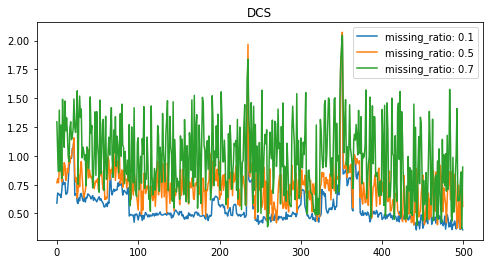

In [62]:
# plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(dcs_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))
# plt.plot()
plt.plot(dcs_loss_total2[0],label='missing_ratio: {}'.format(0.1))
# plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
plt.plot(dcs_loss_total2[4],label='missing_ratio: {}'.format(0.5))
plt.plot(dcs_loss_total2[6],label='missing_ratio: {}'.format(0.7))
# plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))

plt.title('DCS')
plt.legend()
plt.savefig('12_dcs_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

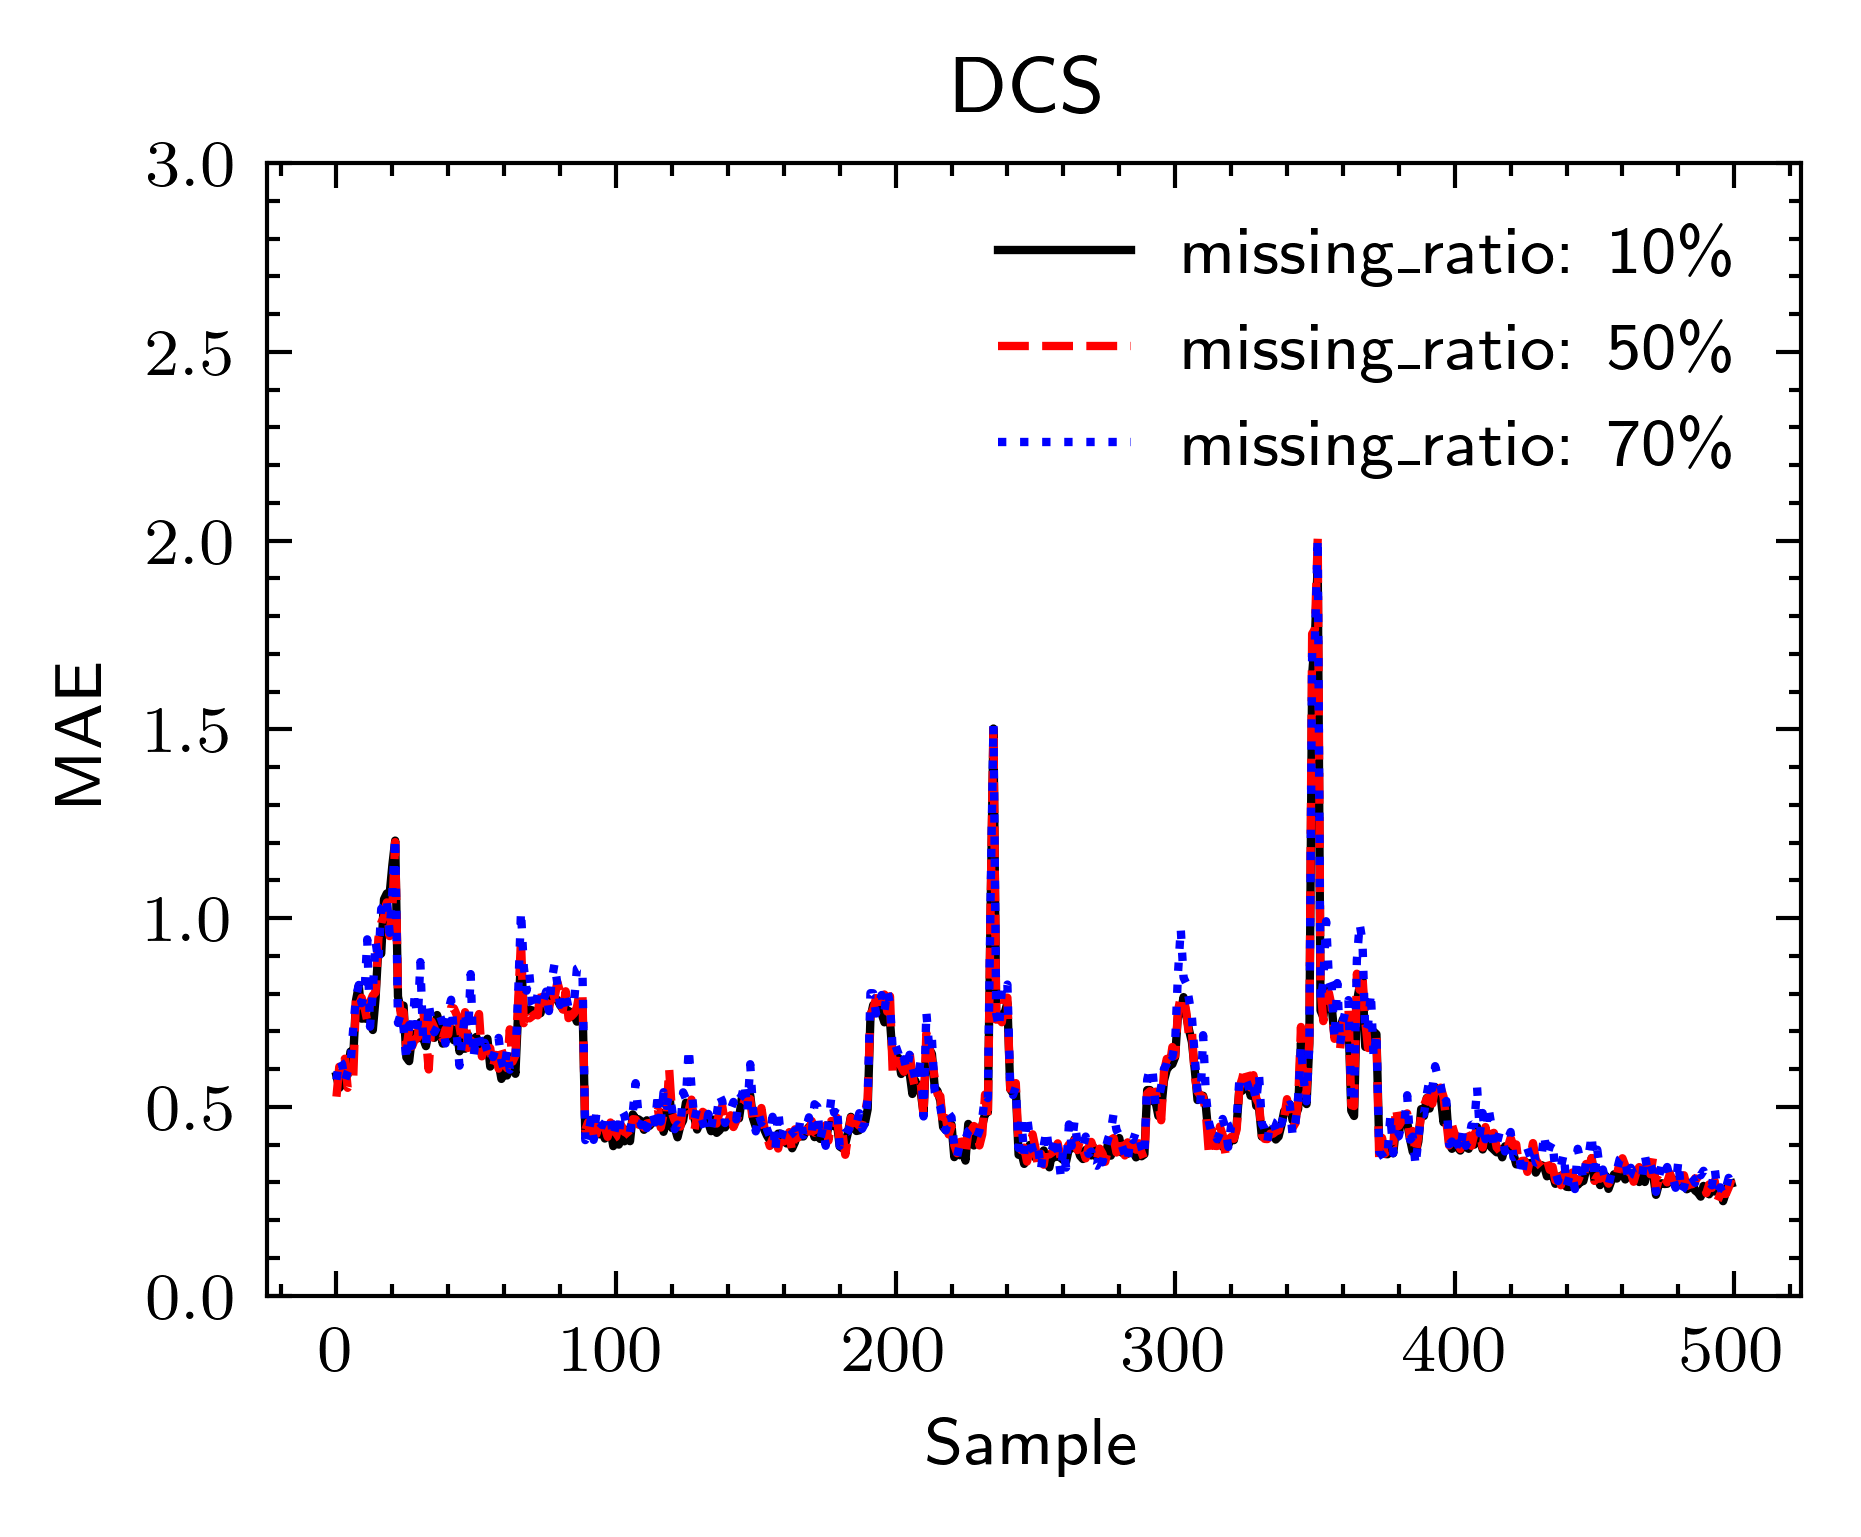

In [47]:
# plt.rcParams['figure.figsize']=(16,8)
# plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(dcs_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))
# plt.plot()
with plt.style.context(['science','ieee']):

    plt.plot(dcs_loss_total[0],label='missing_ratio: {}\%'.format(10))
    # plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
    plt.plot(dcs_loss_total[4],label='missing_ratio: {}\%'.format(50))
    plt.plot(dcs_loss_total[6],label='missing_ratio: {}\%'.format(70))
    # plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))
    plt.xlabel('Sample')
    plt.ylabel("MAE")
    plt.ylim(0,3)

    plt.title('DCS')
    plt.legend()
    plt.savefig('14_dcs_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

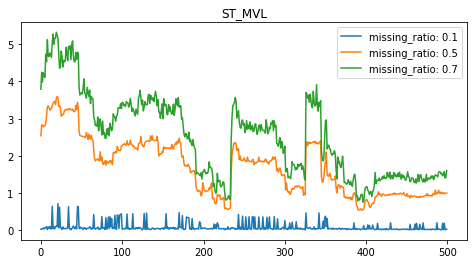

In [29]:

# plt.rcParams['figure.figsize']=(16,8)
# plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(st_mvl_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))
plt.rcParams['figure.figsize']=(8,4)


# with plt.style.context(['science', 'ieee']):
plt.plot(st_mvl_loss_total[0],label='missing_ratio: {}'.format(0.1))
plt.plot(st_mvl_loss_total[4],label='missing_ratio: {}'.format(0.5))
plt.plot(st_mvl_loss_total[6],label='missing_ratio: {}'.format(0.7))
plt.title('ST_MVL')
plt.legend()
# plt.savefig('12_st_mvl_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

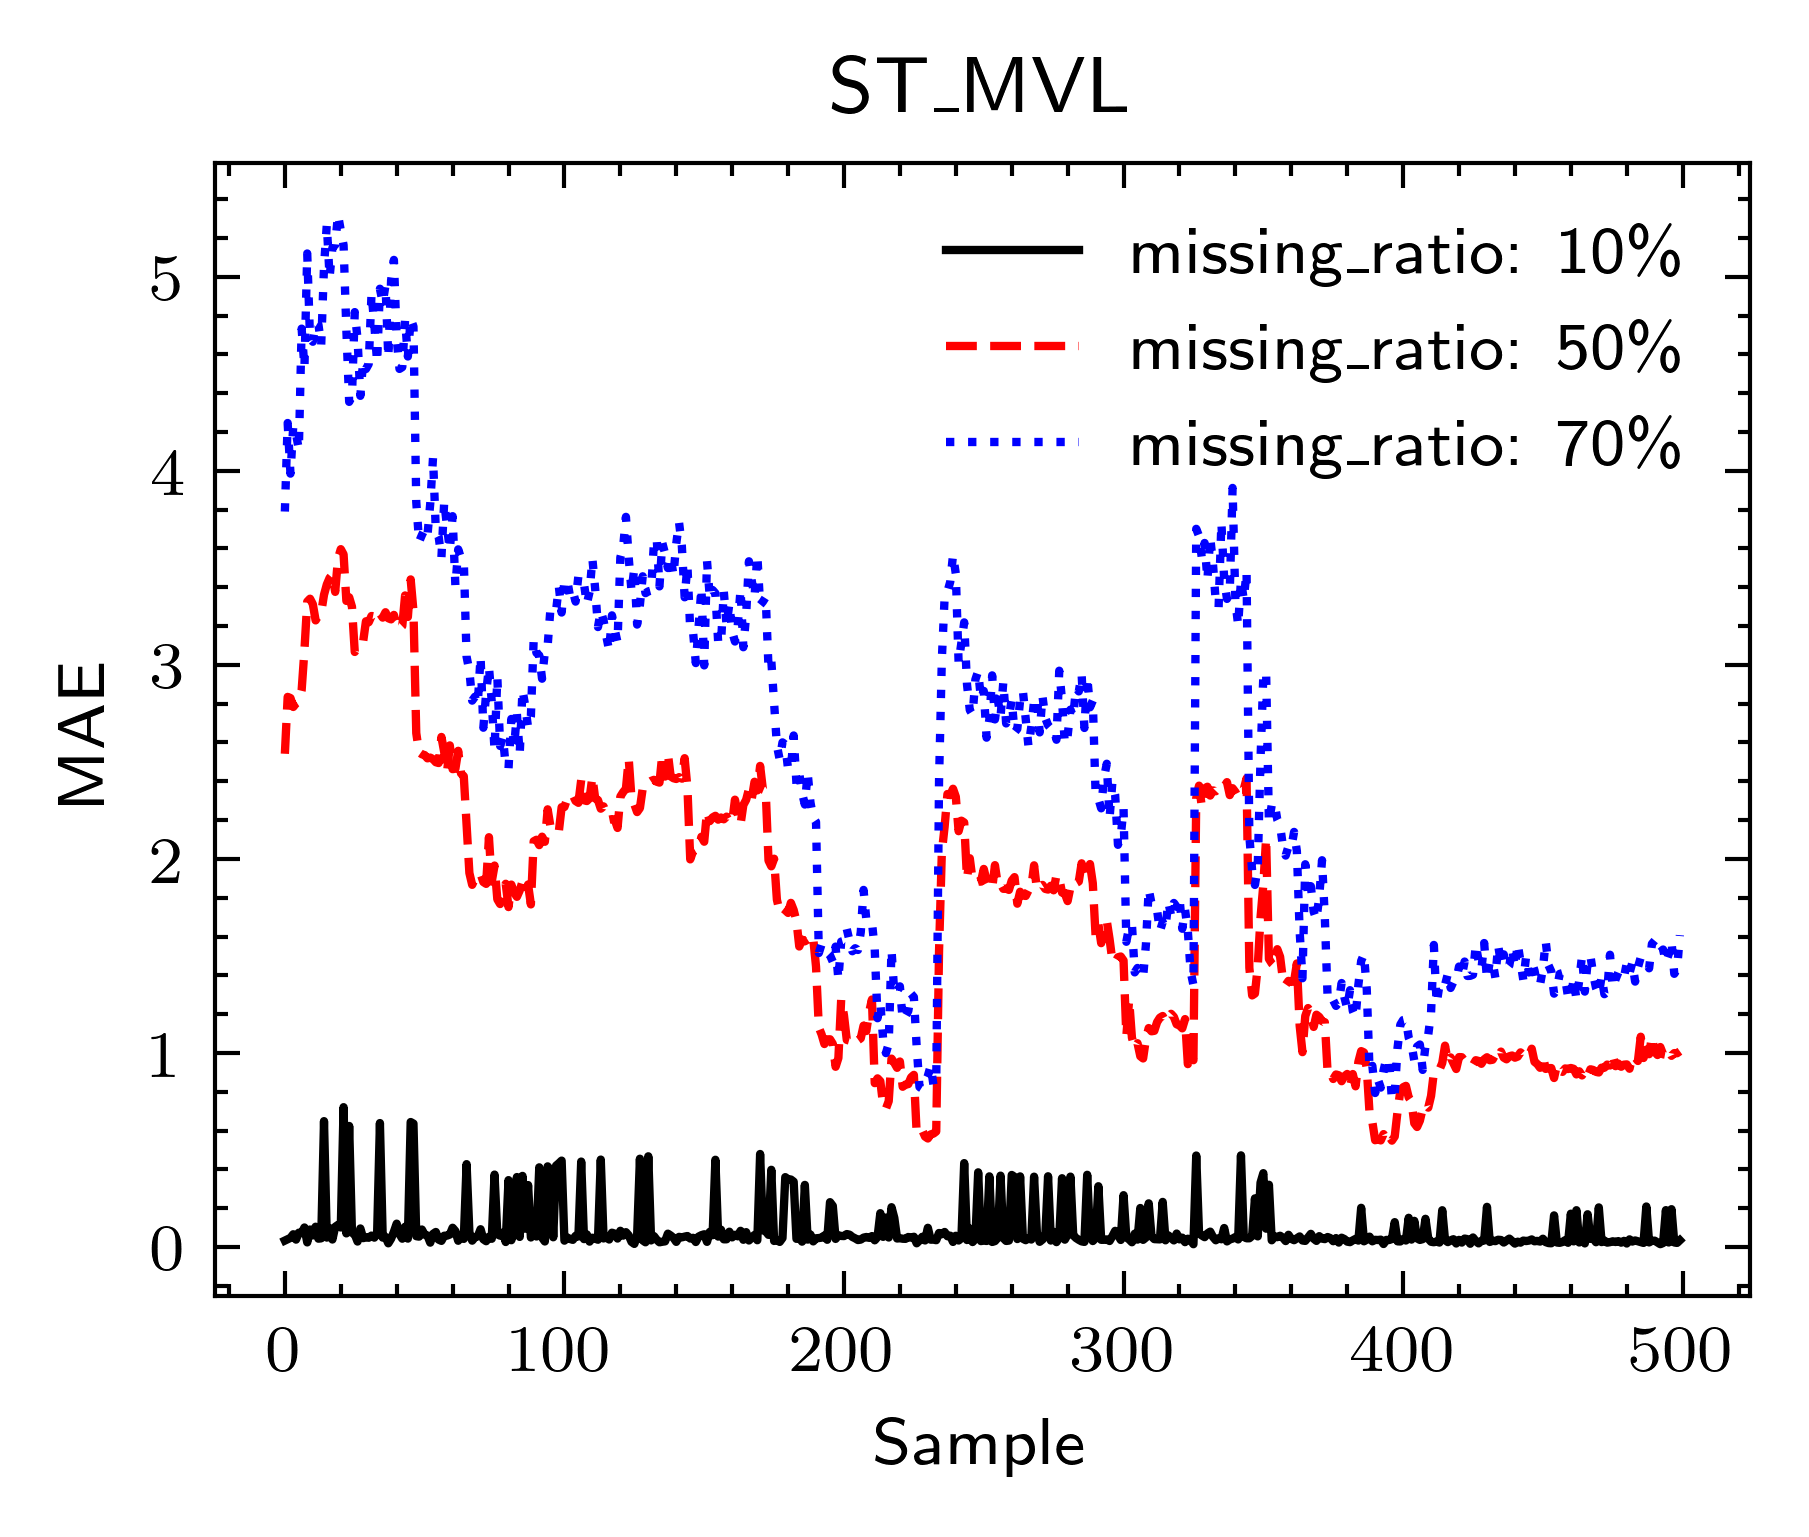

In [44]:
with plt.style.context(['science','ieee']):

    plt.plot(st_mvl_loss_total[0],label='missing_ratio: {}\%'.format(10))
    # plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
    plt.plot(st_mvl_loss_total[4],label='missing_ratio: {}\%'.format(50))
    plt.plot(st_mvl_loss_total[6],label='missing_ratio: {}\%'.format(70))
    # plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))
    plt.xlabel('Sample')
    plt.ylabel("MAE")

    plt.title('ST_MVL')
    plt.legend()
    plt.savefig('14_st_mvl_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

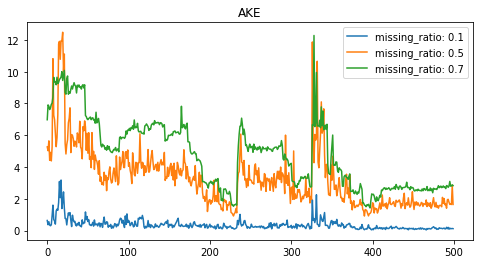

In [61]:
# plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(ake_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.plot(ake_loss_total[0],label='missing_ratio: {}'.format(0.1))
plt.plot(ake_loss_total[4],label='missing_ratio: {}'.format(0.5))
plt.plot(ake_loss_total[6],label='missing_ratio: {}'.format(0.7))


    
plt.title('AKE')
plt.legend()
plt.savefig('12_ake_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

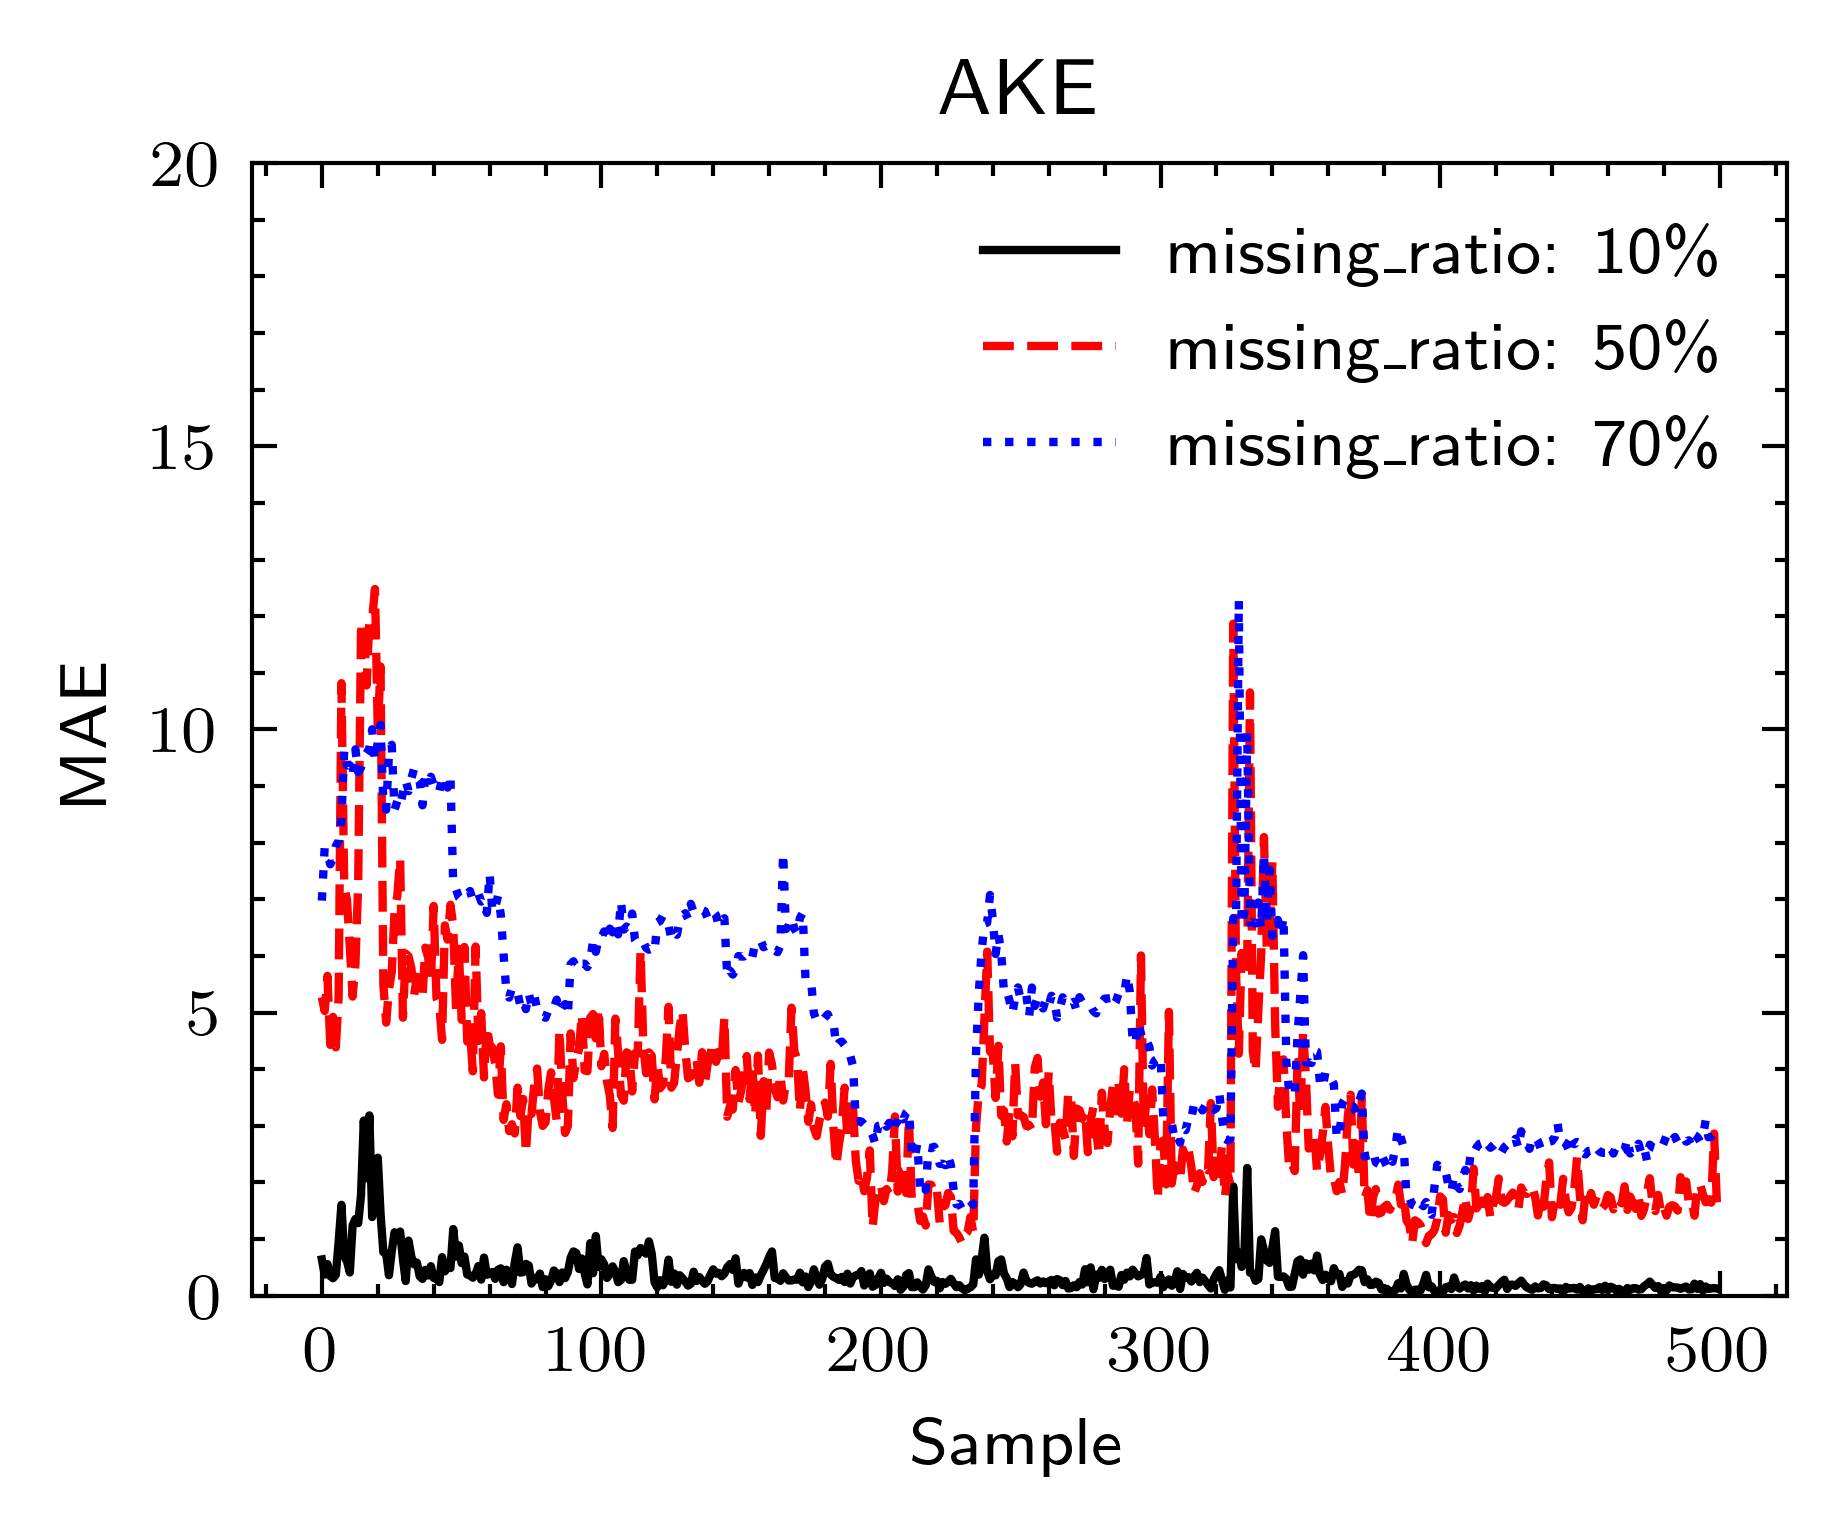

In [43]:
with plt.style.context(['science','ieee']):

    plt.plot(ake_loss_total[0],label='missing_ratio: {}\%'.format(10))
    # plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
    plt.plot(ake_loss_total[4],label='missing_ratio: {}\%'.format(50))
    plt.plot(ake_loss_total[6],label='missing_ratio: {}\%'.format(70))
    # plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))
    plt.ylim(0,20)
    plt.xlabel('Sample')
    plt.ylabel("MAE")

    plt.title('AKE')
    plt.legend()
    plt.savefig('14_ake_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

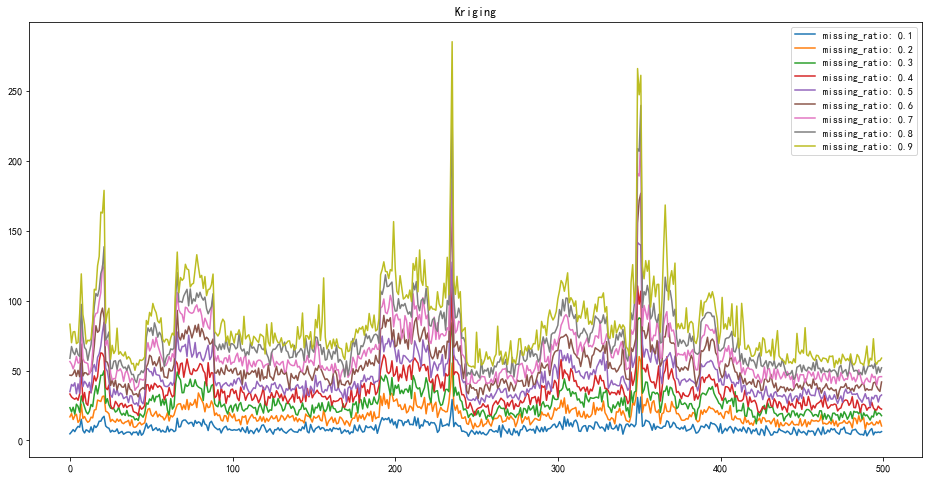

In [62]:
plt.rcParams['figure.figsize']=(16,8)
for i,ake in enumerate(kriging_loss_total):
    plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.title('Kriging')
plt.legend()
plt.savefig('5_kriging_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

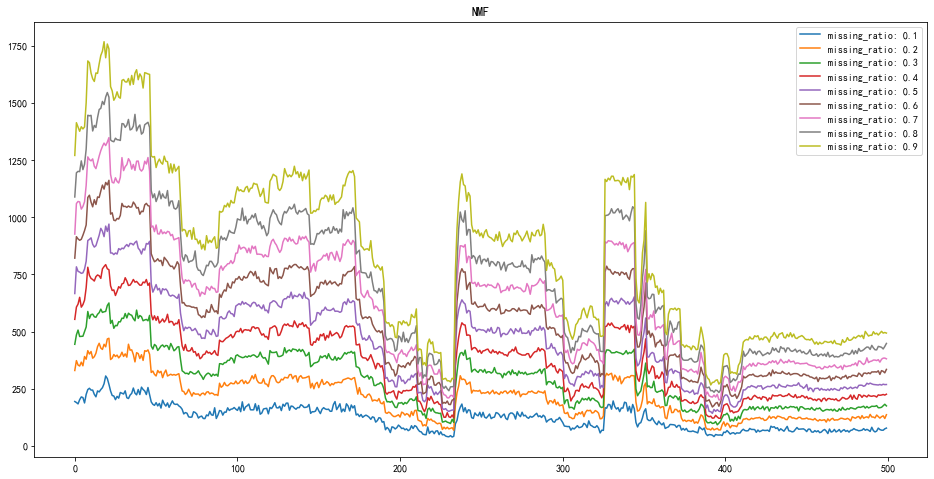

In [63]:
plt.rcParams['figure.figsize']=(16,8)
for i,ake in enumerate(nmf_loss_total):
    plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.title('NMF')
plt.legend()
plt.savefig('5_nmf_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


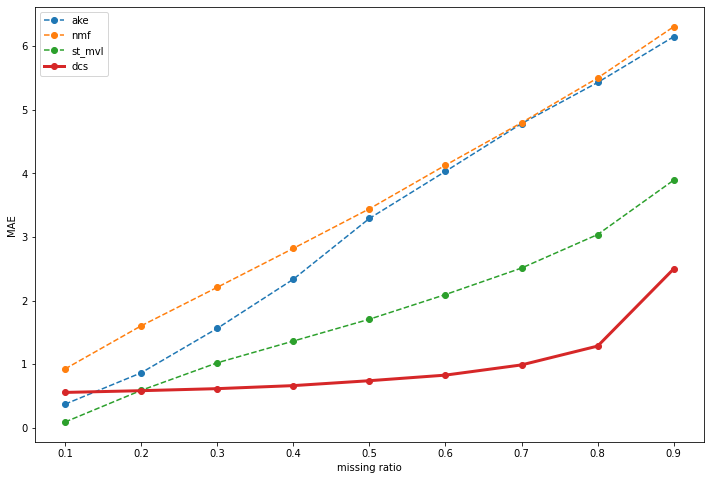

In [10]:
# mean loss 与missing ratio的对比关系
ake_mean = []
# kriging_mean = []
nmf_mean = []
st_mvl_mean = []
dcs_mean = []
dcs_mean1 = []
dcs_mean2 = []

for i,j in enumerate(ake_loss_total):
    ake_mean.append(np.mean(ake_loss_total[i]))
#     kriging_mean.append(np.mean(kriging_loss_total[i]))
    nmf_mean.append(np.mean(nmf_loss_total[i]))
    st_mvl_mean.append(np.mean(st_mvl_loss_total[i]))
    dcs_mean.append(np.mean(dcs_loss_total[i]))
    dcs_mean1.append(np.mean(dcs_loss_total1[i]))
    dcs_mean2.append(np.mean(dcs_loss_total2[i]))

x_plot = np.arange(0.1,1,0.1)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize']=(12,8)
plt.plot(x_plot,ake_mean,marker='o',ls='--',label='ake')
# plt.plot(x_plot,kriging_mean,marker='o',ls='--',label='kriging')
plt.plot(x_plot,nmf_mean,marker='o',ls='--',label='nmf')
plt.plot(x_plot,st_mvl_mean,marker='o',ls='--',label='st_mvl')
# plt.plot(x_plot,dcs_mean,marker='o',linewidth=3,label='dcs_sa') # 不带有迭代限制的原始版
# plt.plot(x_plot,dcs_mean1,marker='o',linewidth=3,label='dcs')
plt.plot(x_plot,dcs_mean2,marker='o',linewidth=3,label='dcs') # 带有迭代次数限制的完整版

plt.xlabel('missing ratio')
# plt.ylabel('误差      ',rotation=0)
plt.ylabel('MAE')
# plt.xticks(np.arange(1,10,1))
plt.legend()
# plt.savefig('12_mean_loss_bench.png',dpi=300,bbox_inches='tight',pad_inches=0)

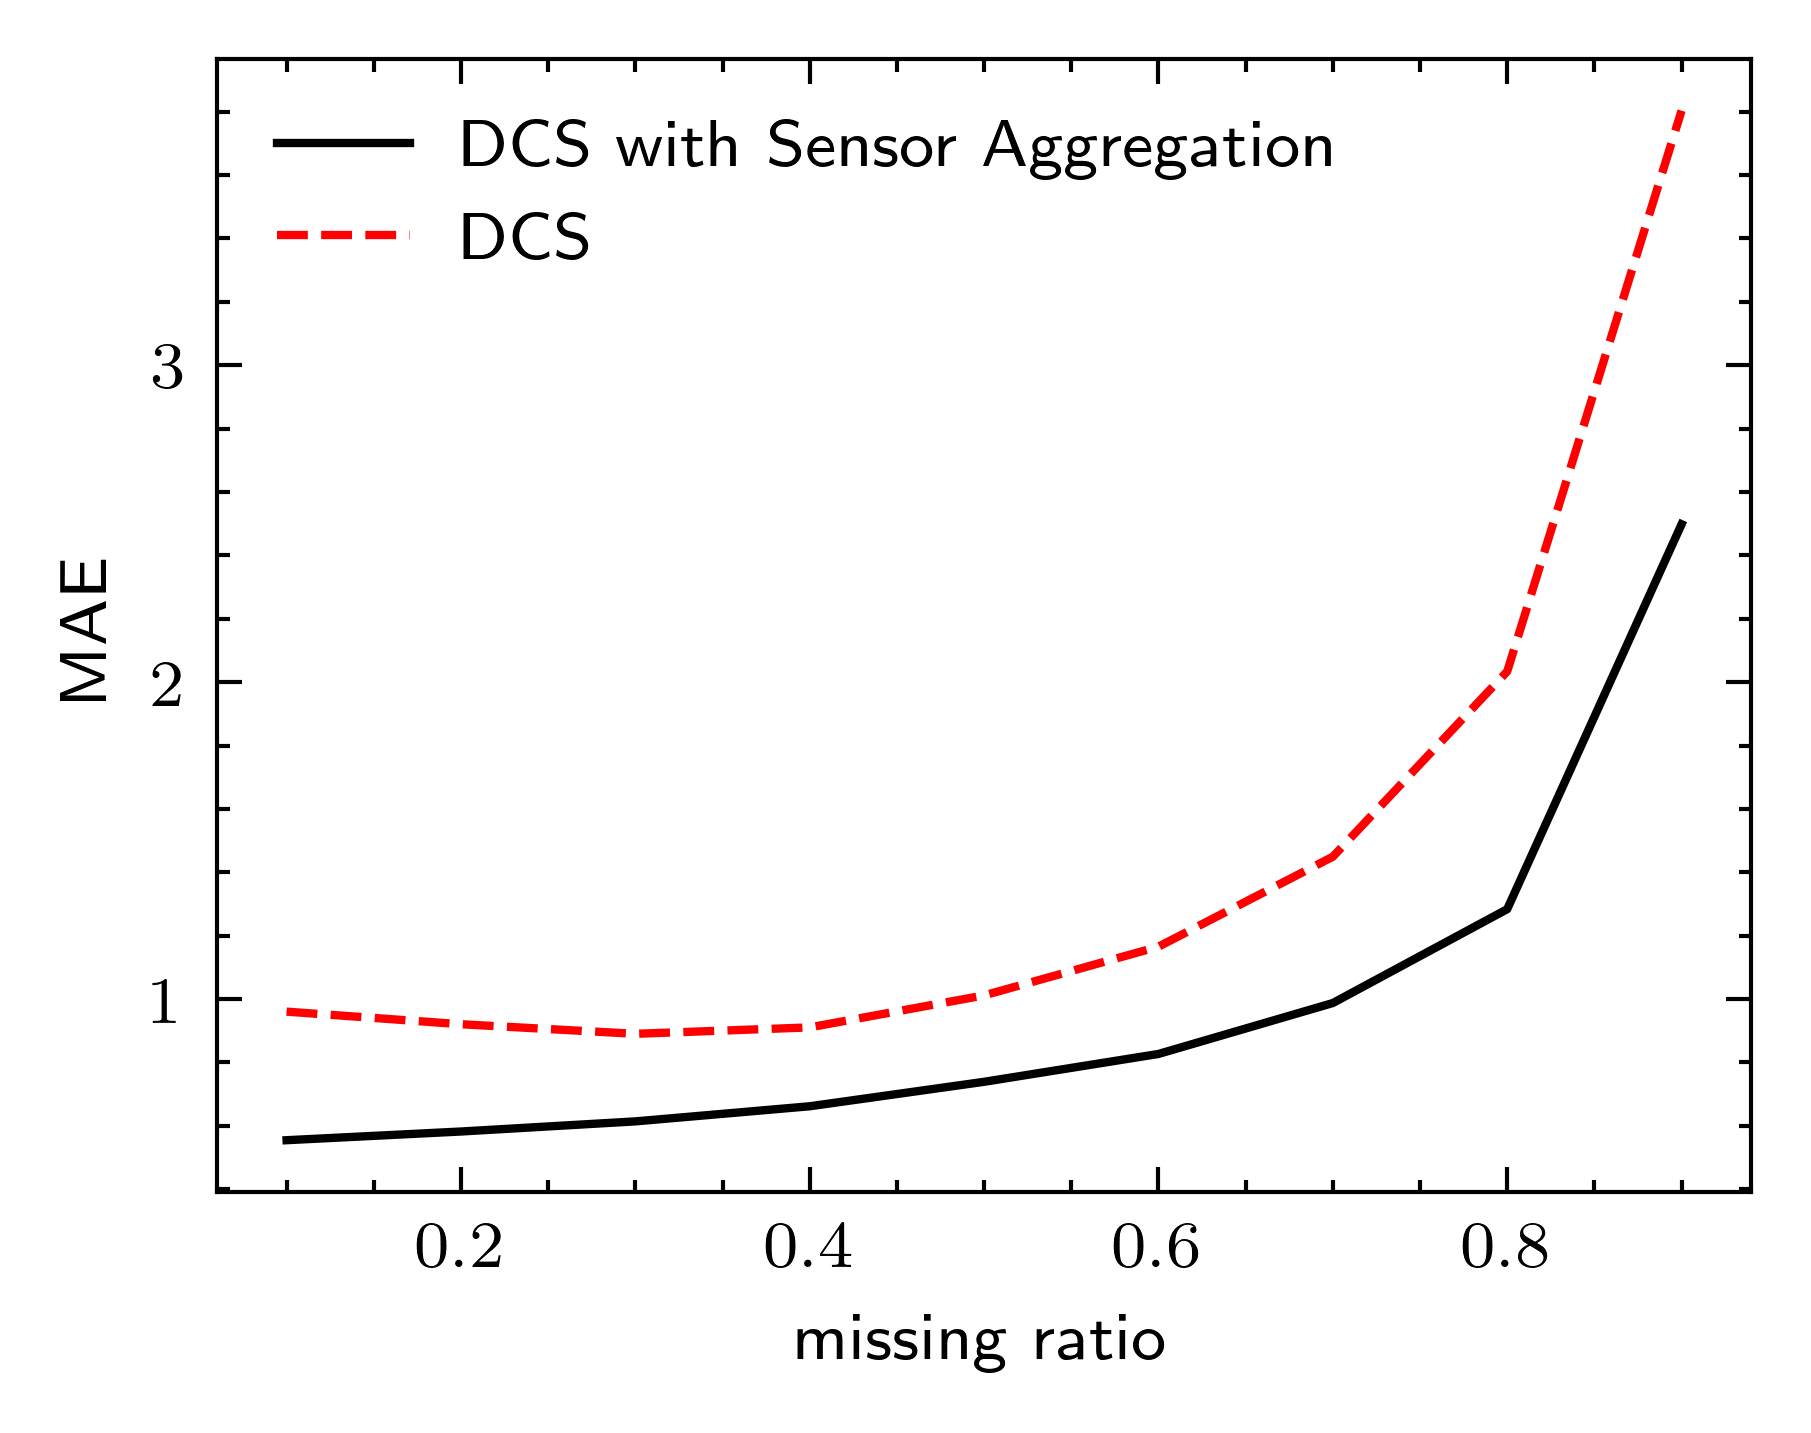

In [20]:
# mean loss 与missing ratio的对比关系
ake_mean = []
# kriging_mean = []
nmf_mean = []
st_mvl_mean = []
dcs_mean = []
dcs_mean1 = []
dcs_mean2 = []

for i,j in enumerate(ake_loss_total):
    ake_mean.append(np.mean(ake_loss_total[i]))
#     kriging_mean.append(np.mean(kriging_loss_total[i]))
    nmf_mean.append(np.mean(nmf_loss_total[i]))
    st_mvl_mean.append(np.mean(st_mvl_loss_total[i]))
    dcs_mean.append(np.mean(dcs_loss_total[i]))
    dcs_mean1.append(np.mean(dcs_loss_total1[i]))
    dcs_mean2.append(np.mean(dcs_loss_total2[i]))

x_plot = np.arange(0.1,1,0.1)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize']=(12,8)
with plt.style.context(['science','ieee']) :

    plt.plot(x_plot,dcs_mean2,label='DCS with Sensor Aggregation') # 带有迭代次数限制的完整版
    # plt.plot(x_plot,ake_mean,label='ake')
# plt.plot(x_plot,kriging_mean,marker='o',ls='--',label='kriging')
    # plt.plot(x_plot,nmf_mean,label='nmf')
    # plt.plot(x_plot,st_mvl_mean,label='st_mvl')
# plt.plot(x_plot,dcs_mean,marker='o',linewidth=3,label='dcs_sa') # 不带有迭代限制的原始版
    plt.plot(x_plot,dcs_mean1,label='DCS')

    plt.xlabel('missing ratio')
# plt.ylabel('误差      ',rotation=0)
    plt.ylabel('MAE')
# plt.xticks(np.arange(1,10,1))
    plt.legend()
    plt.savefig('13_dcs_mean_loss_bench.png',dpi=300)

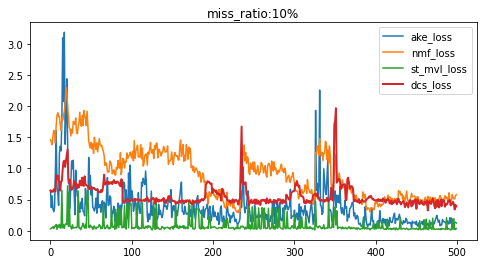

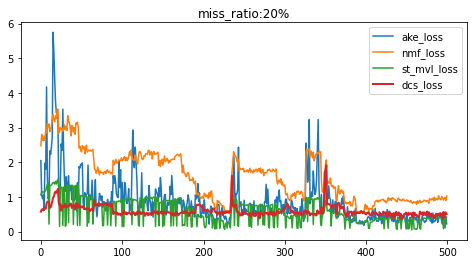

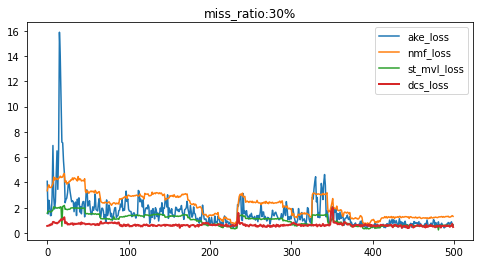

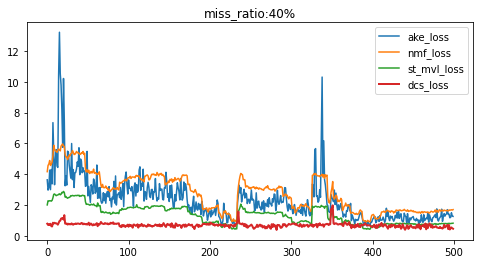

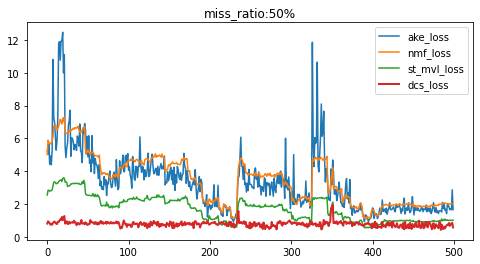

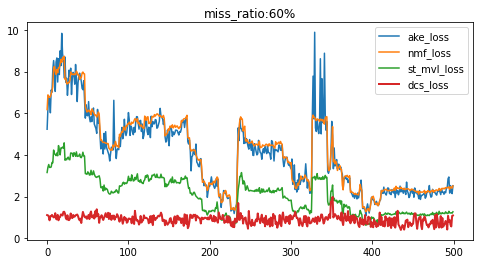

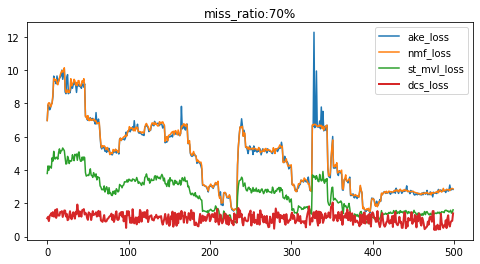

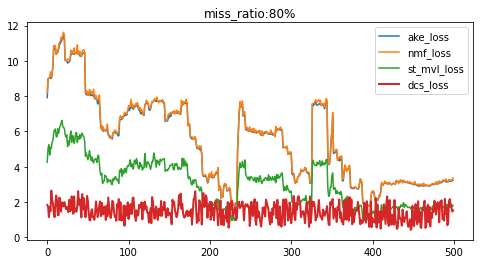

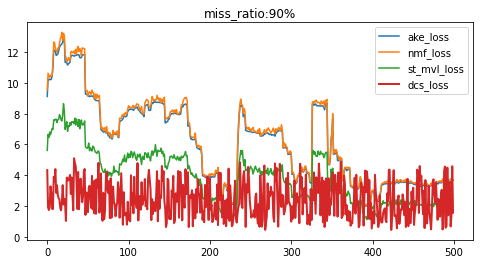

In [53]:
# per missing ratio

# ake_loss_total = []
# kriging_loss_total = []
# nmf_loss_total = []
# st_mvl_loss_total = []
# dcs_loss_total

# plt.rcParams['figure.figsize']=(8,4)


# print(len(ake_loss_total))

for i in range(0,9,1):
#     ake_loss_total[i]
    plt.figure()
    # plt.ylim(-0,10)
    plt.plot(ake_loss_total[i],label='ake_loss')
    # plt.plot(kriging_loss_total[i],label='kriging_loss')
    plt.plot(nmf_loss_total[i],label='nmf_loss')
    plt.plot(st_mvl_loss_total[i],label='st_mvl_loss')
    # plt.plot(dcs_loss_total[i],linewidth=1,label='dcs_loss_sa') # 原始模型, 无迭代次数限制
    # plt.plot(dcs_loss_total2[i],linewidth=1,label='dcs_loss')
    plt.plot(dcs_loss_total3[i],linewidth=2,label='dcs_loss') # 带次数限制的版本
    plt.title('miss_ratio:{}%'.format((i+1)*10))
    plt.legend()
    plt.savefig('13_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
    # plt.savefig('11_dcs_compare_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
# indices = int(miss_ratio*10-1)
# print(indices)

# size = 1000
# plt.rcParams['figure.figsize']=(12,8)
# # x_plot = np.arange(0,29834,1)
# plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
# plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
# plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
# plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
# plt.legend()
# plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

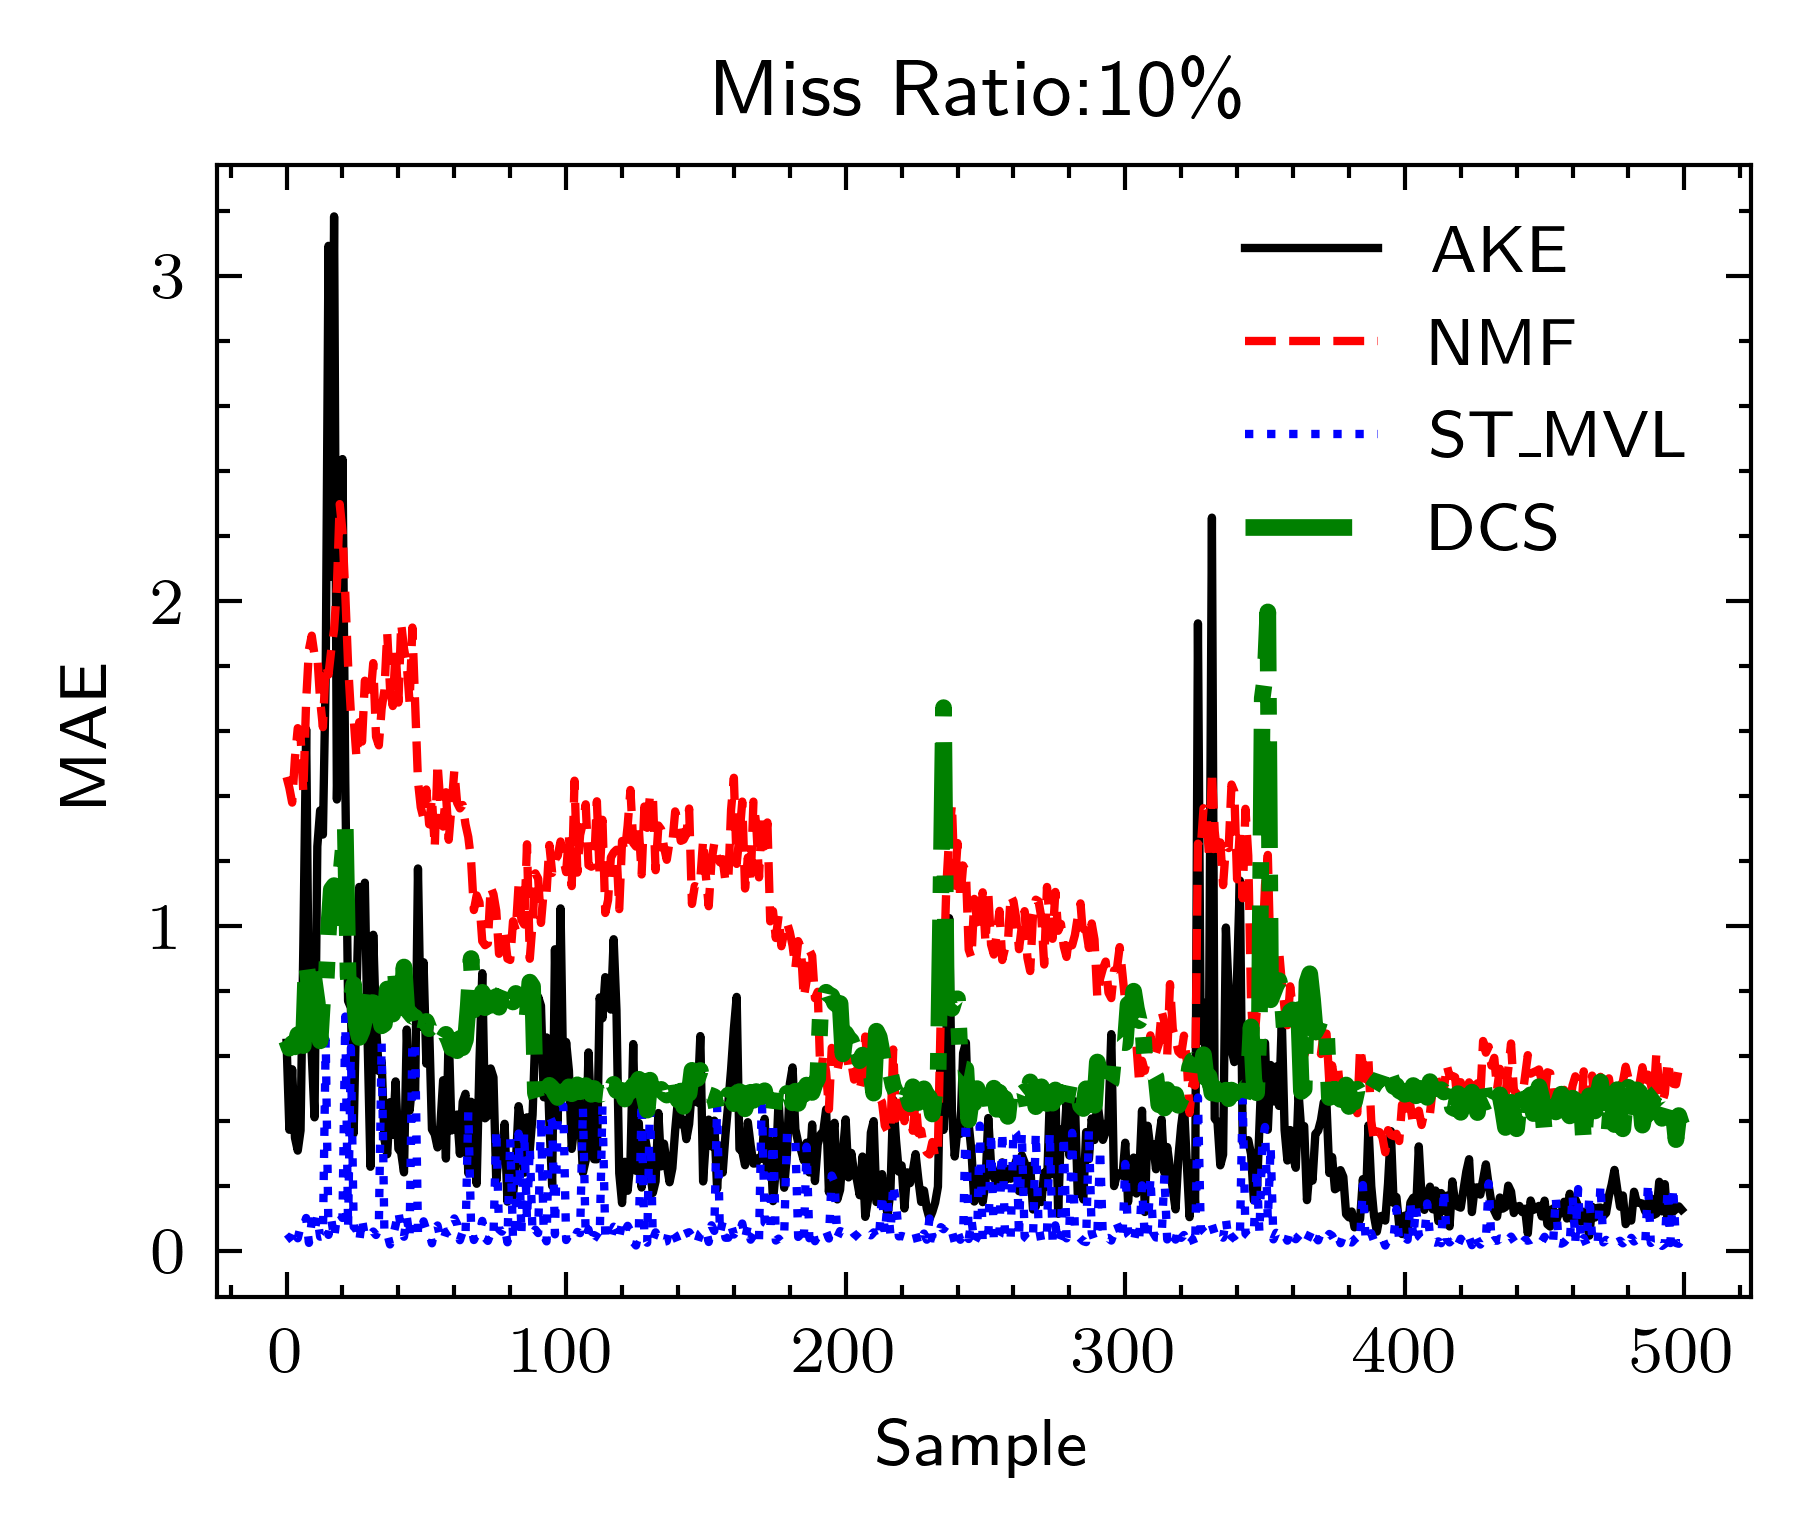

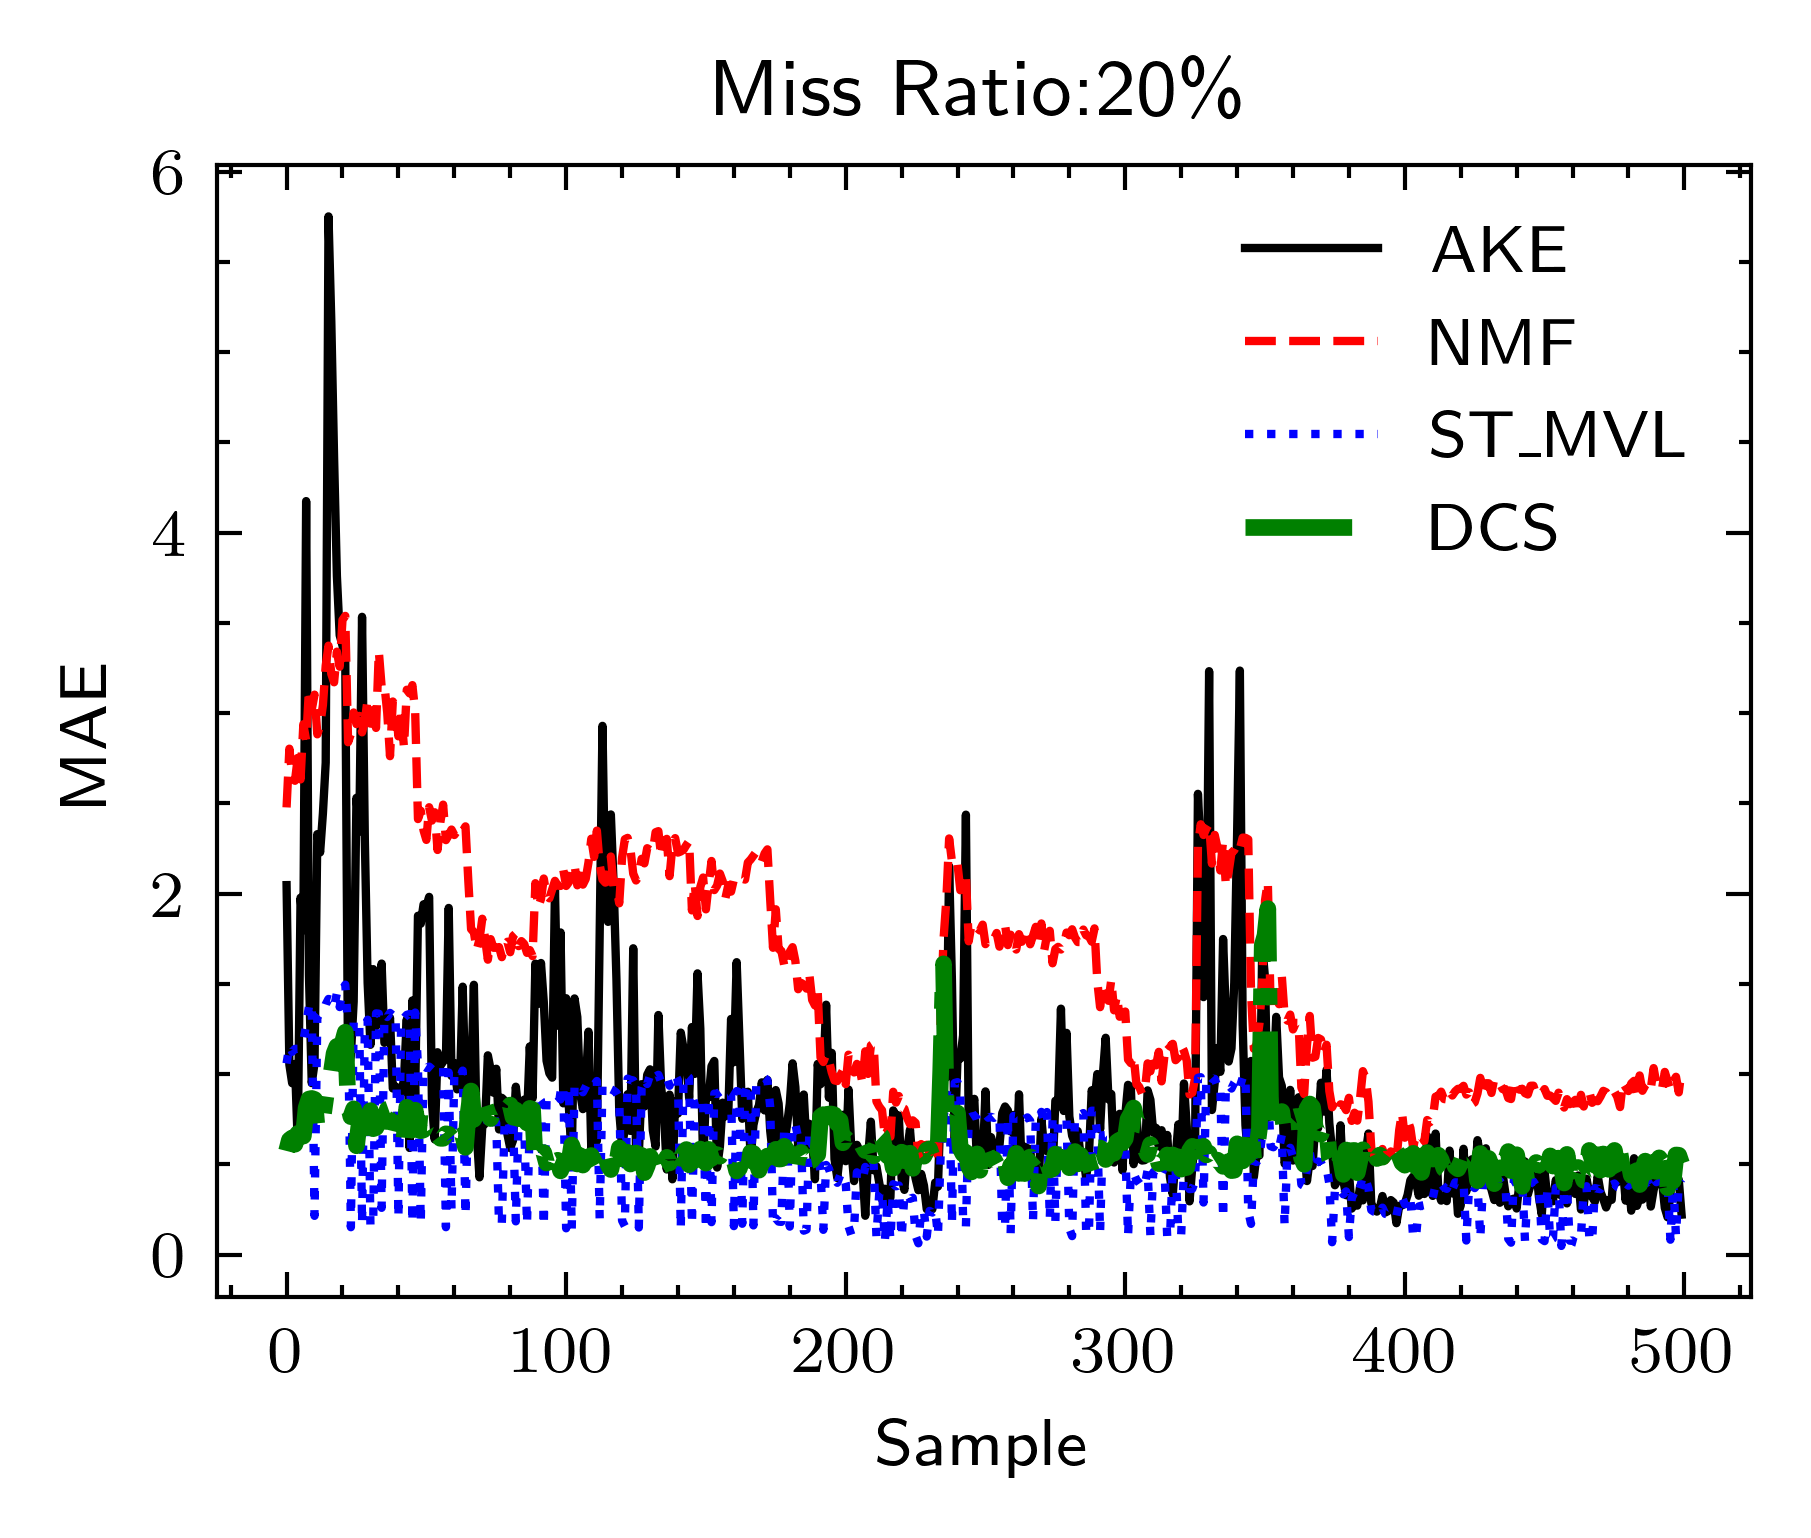

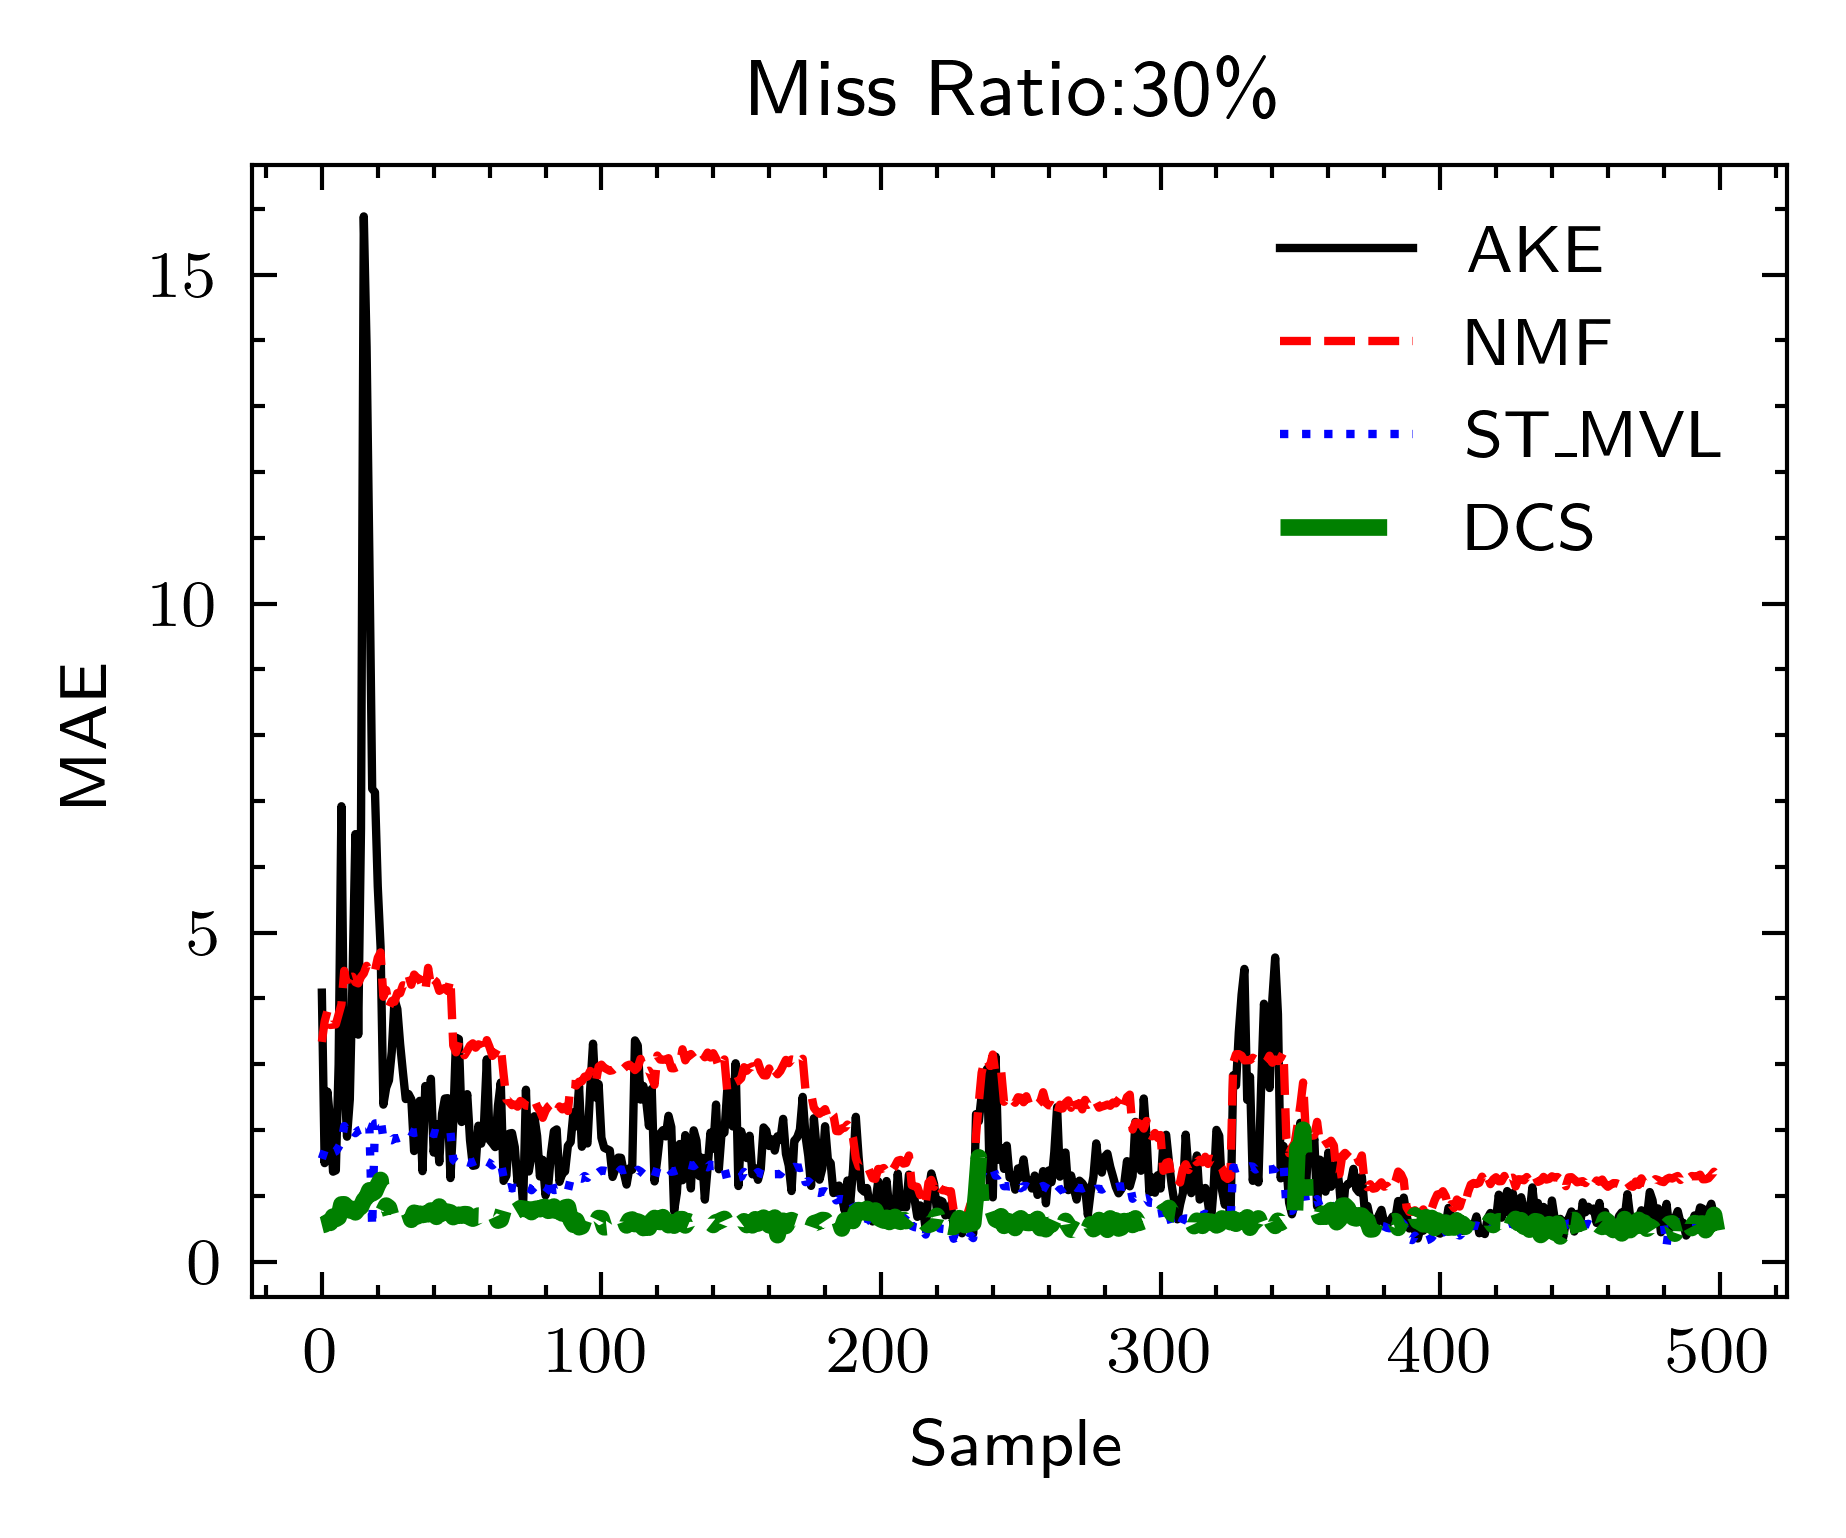

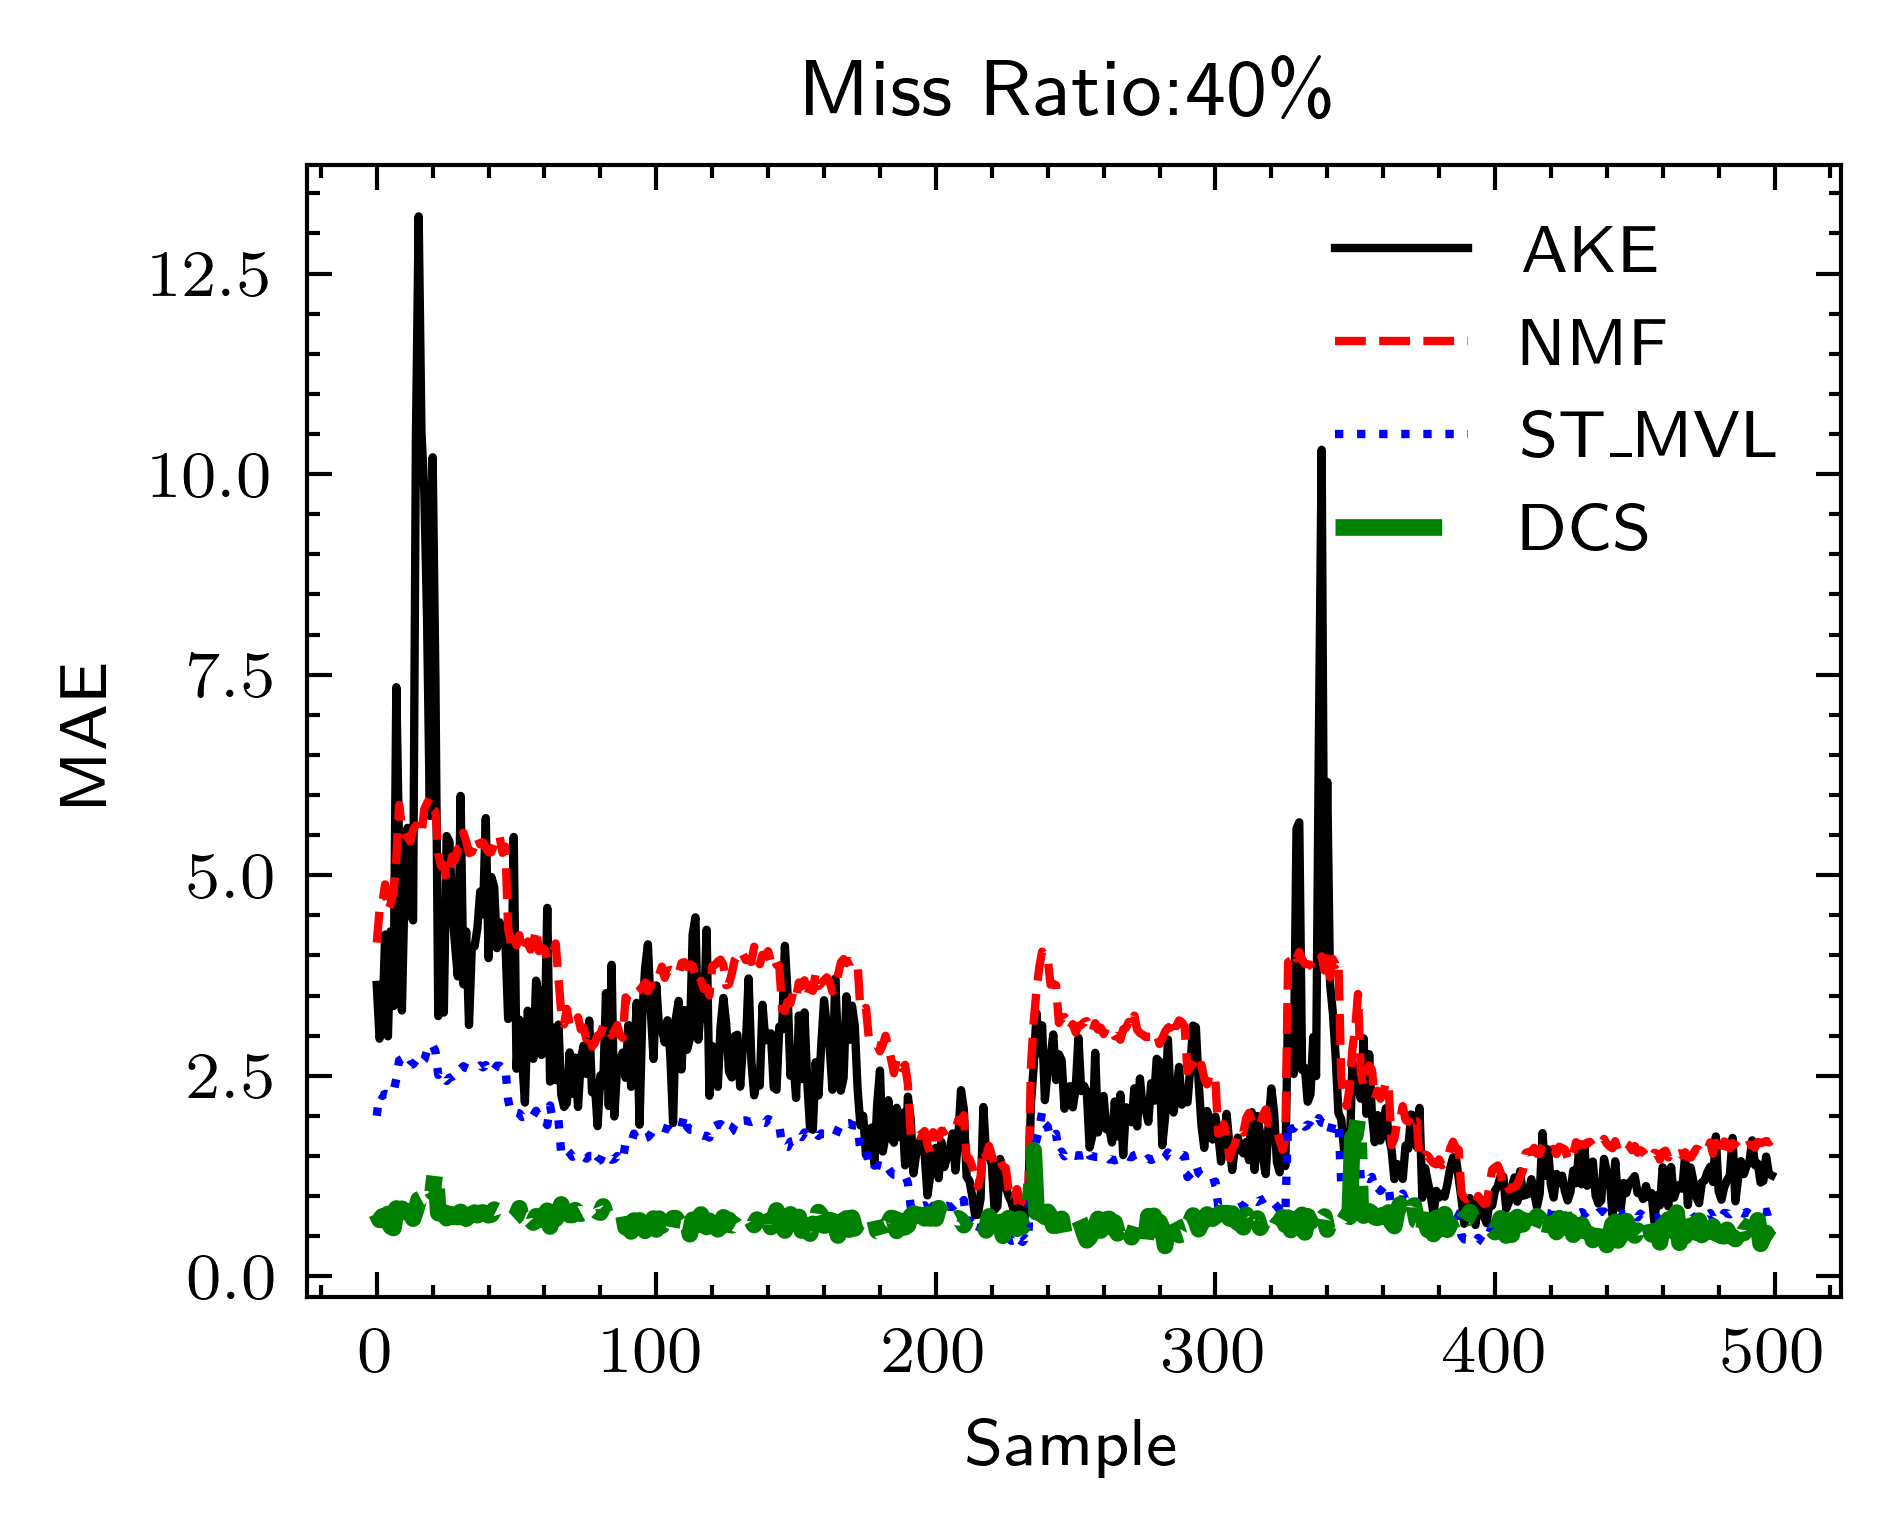

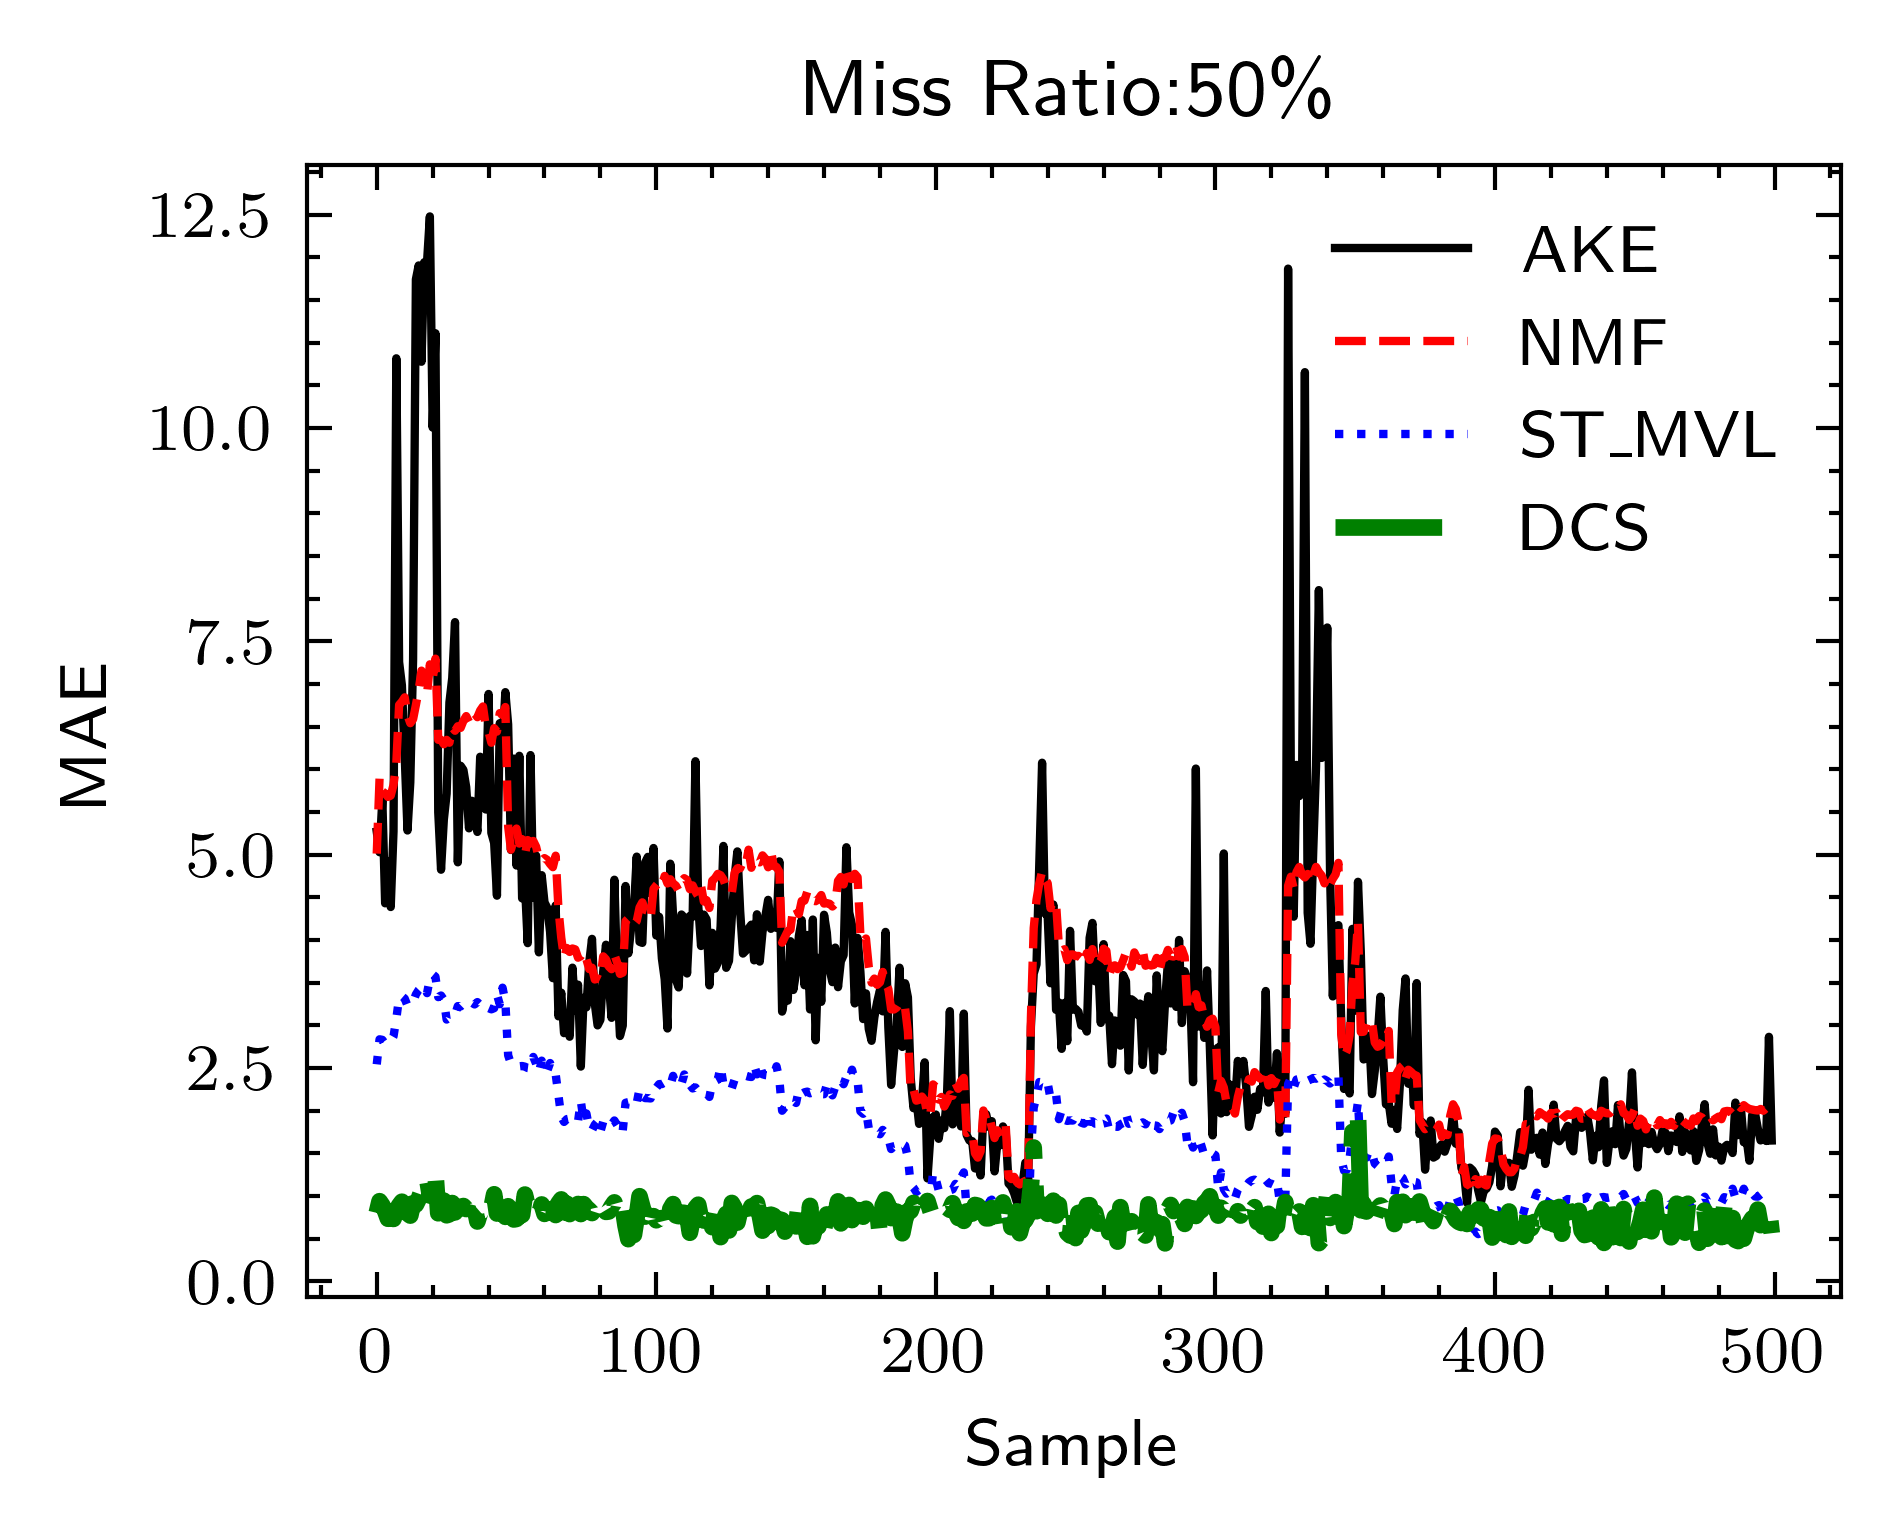

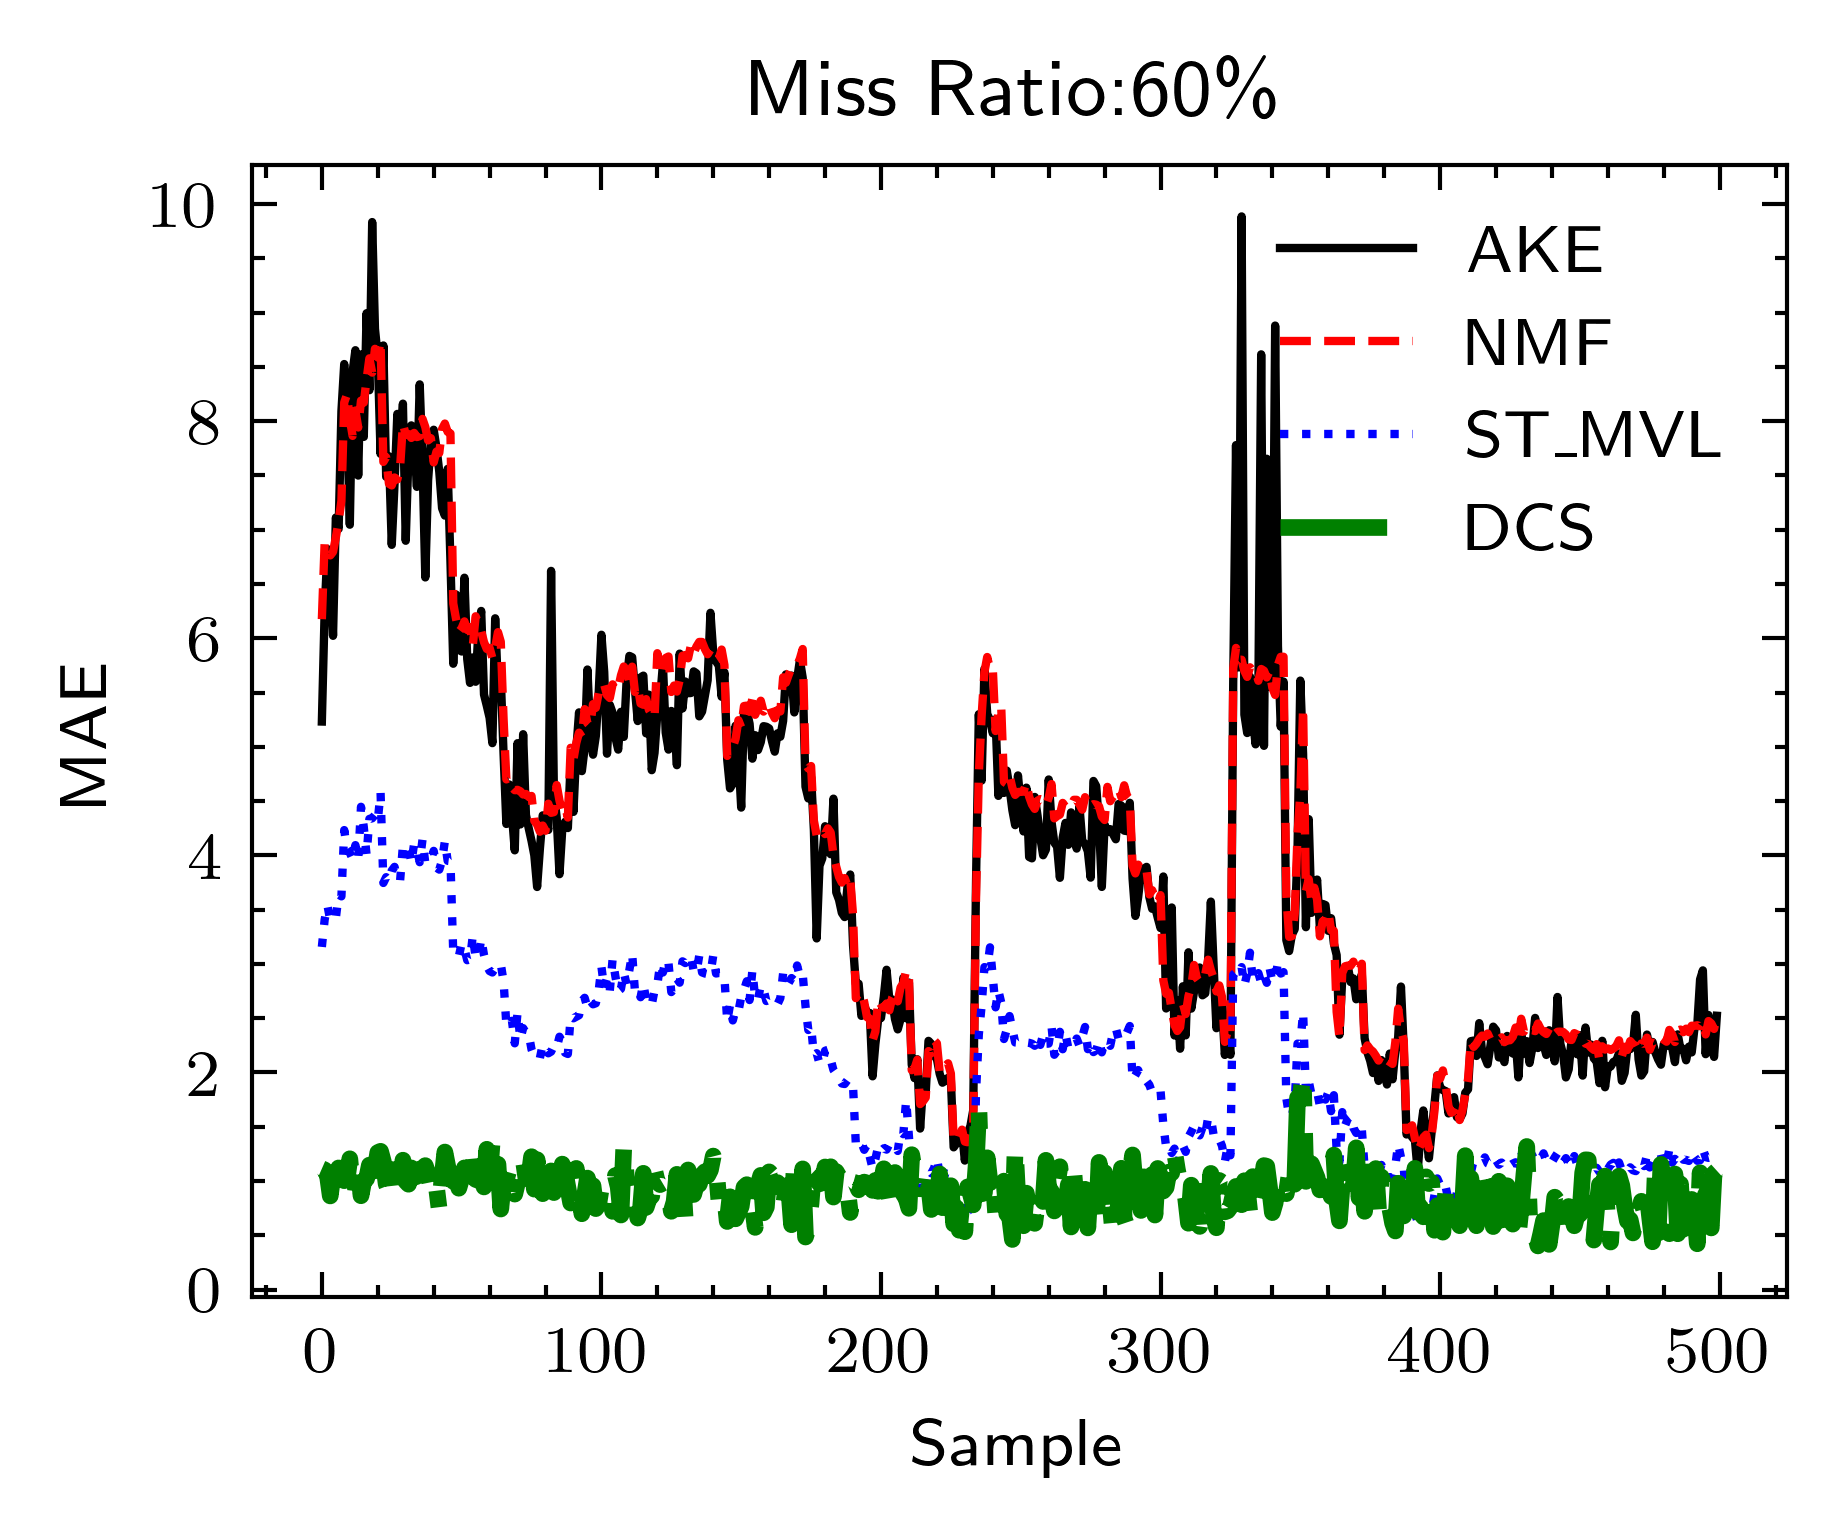

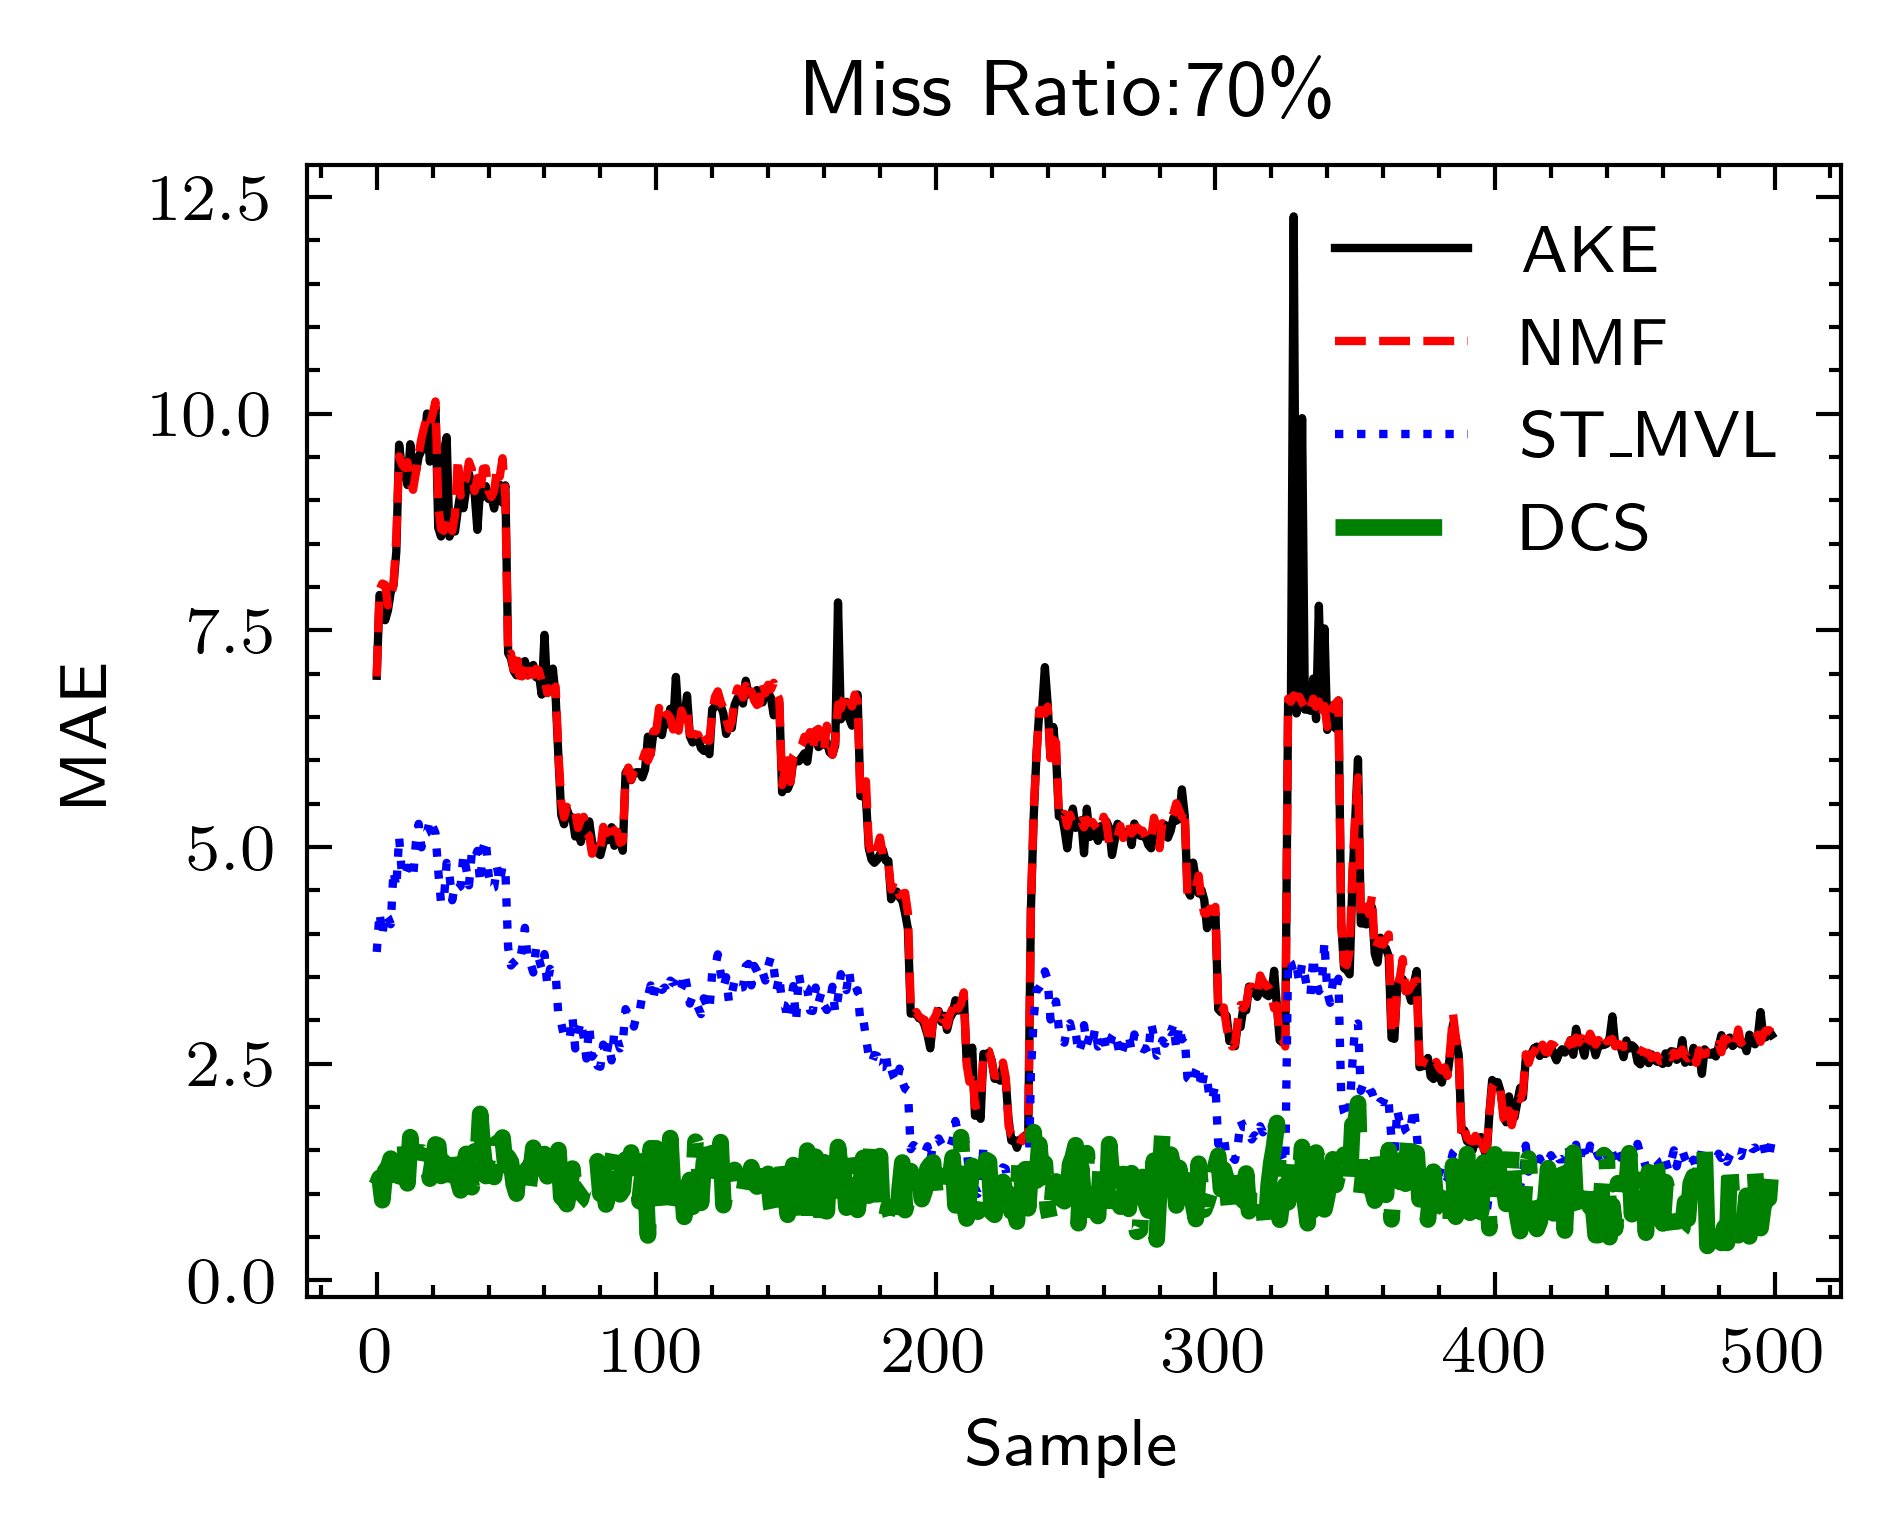

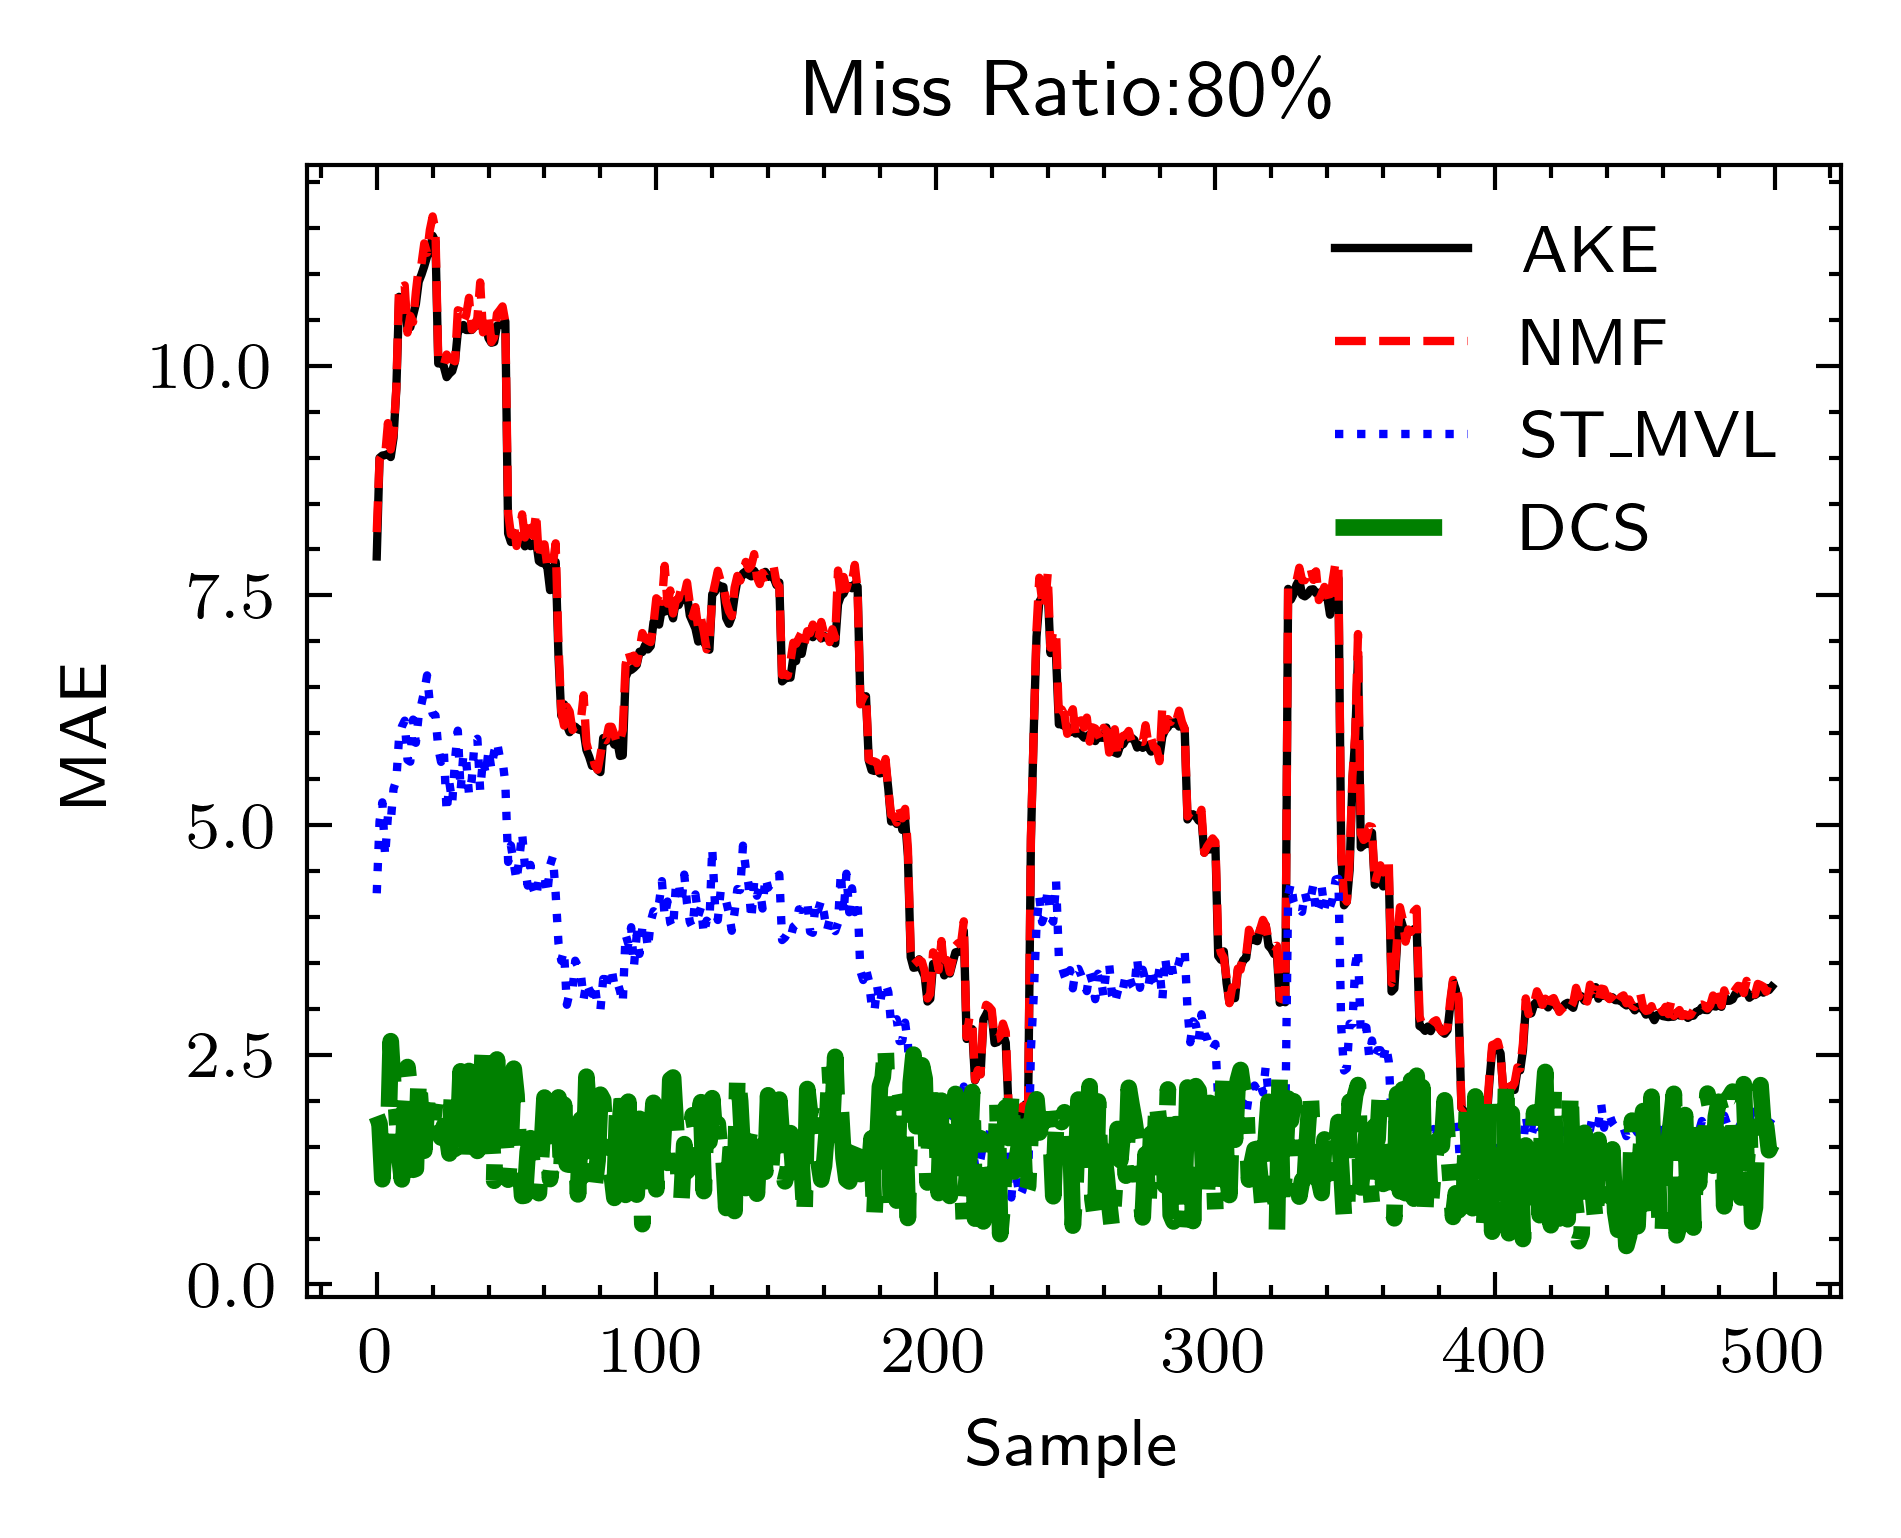

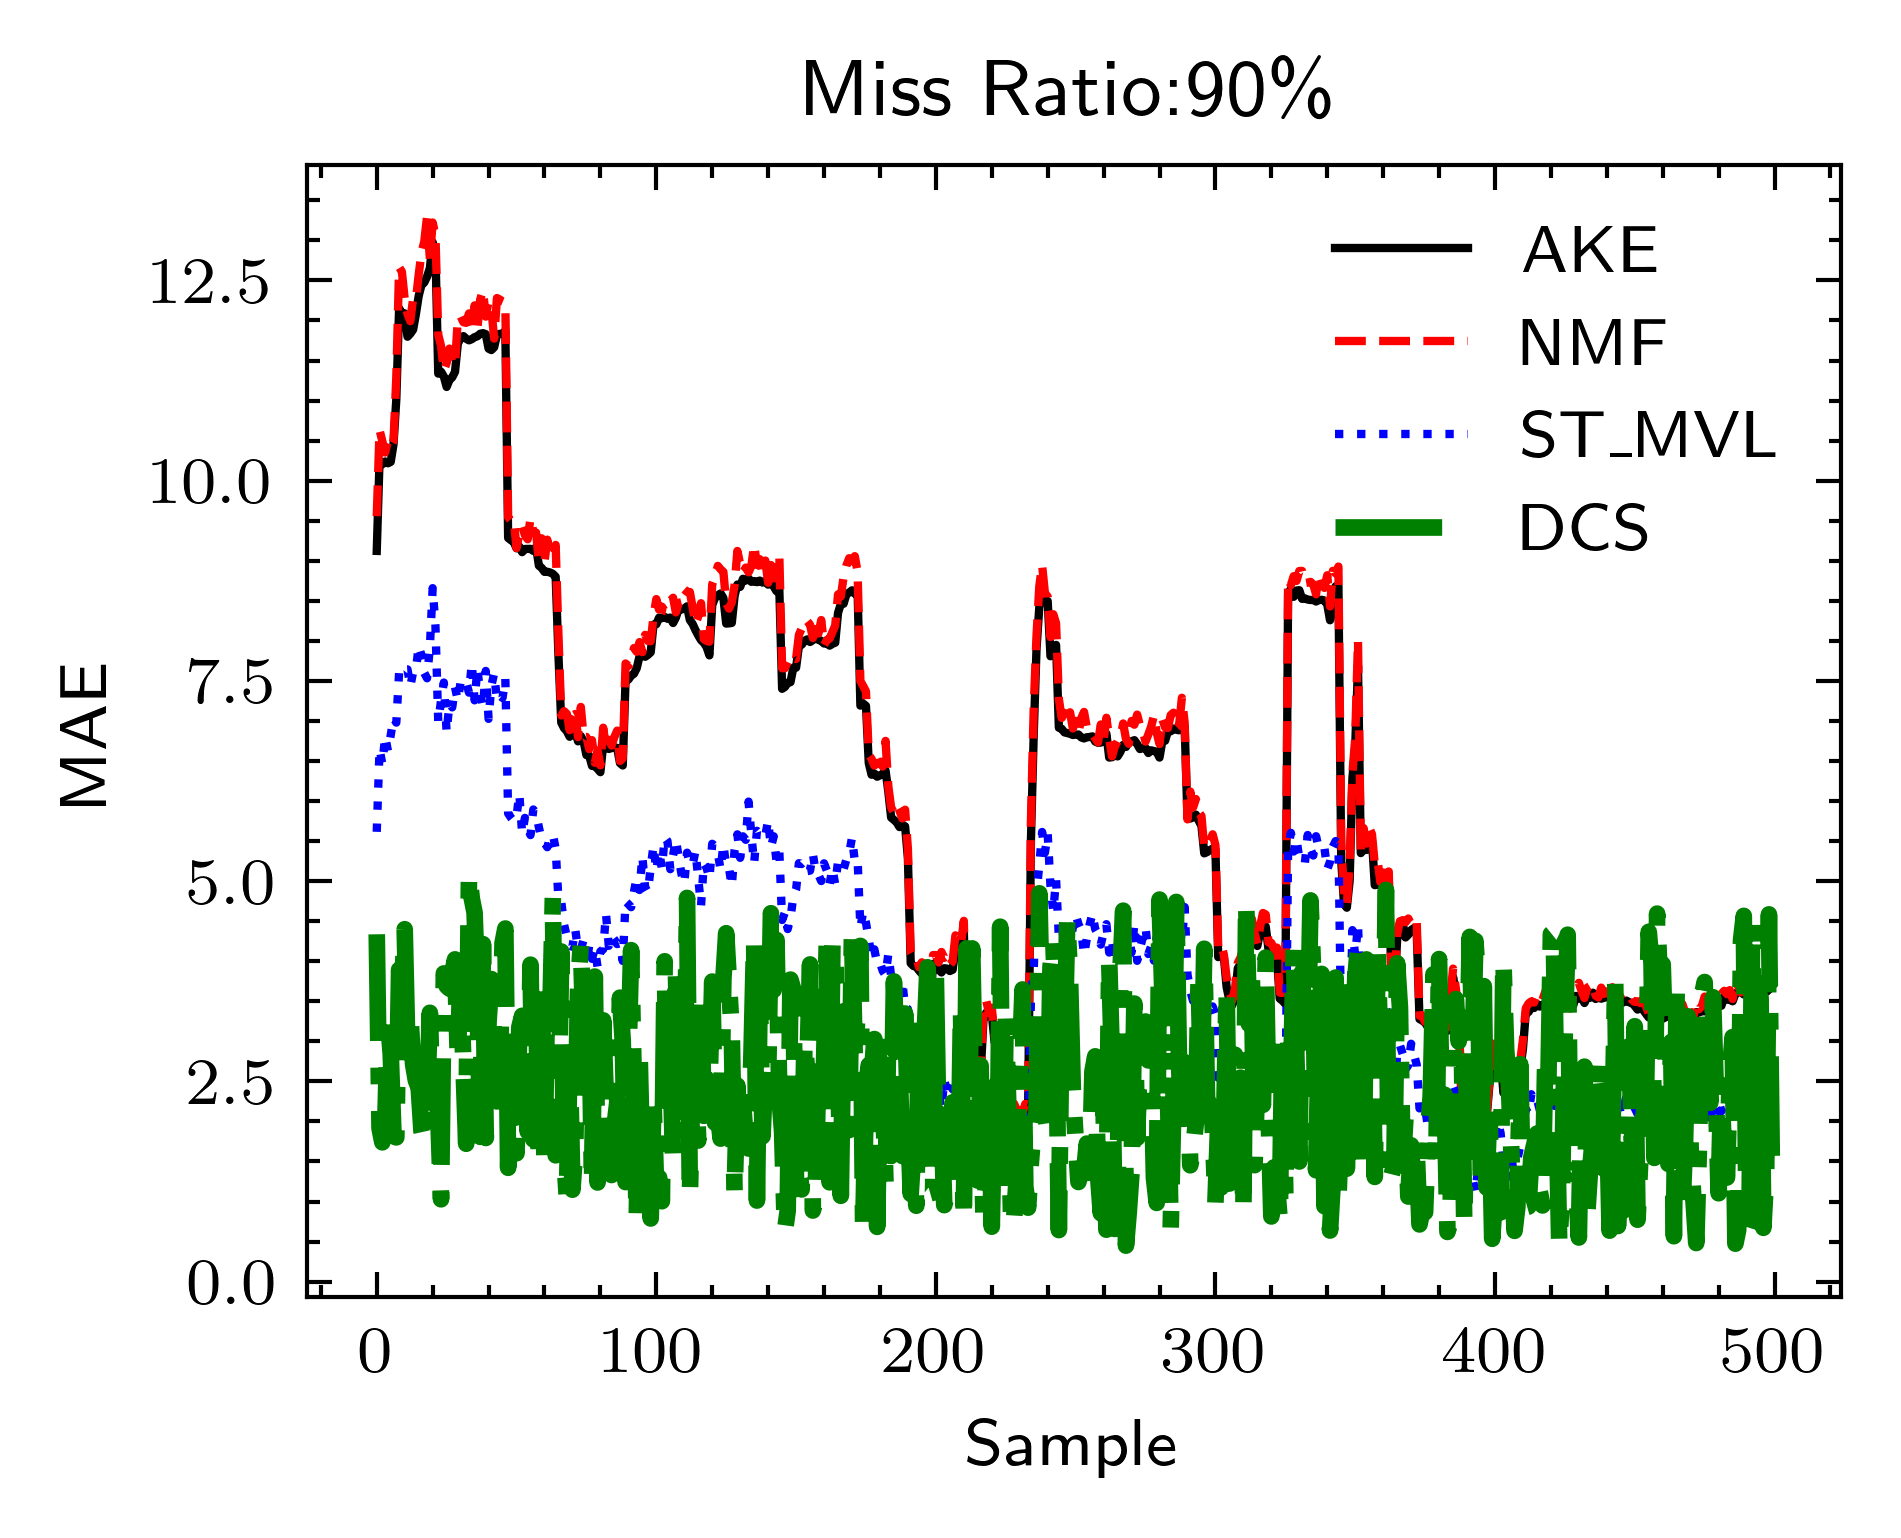

In [15]:
# per missing ratio

# ake_loss_total = []
# kriging_loss_total = []
# nmf_loss_total = []
# st_mvl_loss_total = []
# dcs_loss_total

# plt.rcParams['figure.figsize']=(8,4)


# print(len(ake_loss_total))

with plt.style.context(['science','ieee']):

    for i in range(0,9,1):
    #     ake_loss_total[i]
        plt.figure()
        # plt.ylim(-0,10)
        plt.plot(ake_loss_total[i],label='AKE')
        # plt.plot(kriging_loss_total[i],label='kriging_loss')
        plt.plot(nmf_loss_total[i],label='NMF')
        plt.plot(st_mvl_loss_total[i],label='ST_MVL')
        # plt.plot(dcs_loss_total[i],linewidth=1,label='dcs_loss_sa') # 原始模型, 无迭代次数限制
        # plt.plot(dcs_loss_total2[i],linewidth=1,label='dcs_loss')
        plt.plot(dcs_loss_total3[i],linewidth=2,label='DCS') # 带次数限制的版本
        plt.title('Miss Ratio:{}\%'.format((i+1)*10))
        plt.xlabel('Sample')
        plt.ylabel('MAE')
        plt.legend()
        plt.savefig('13_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
        # plt.savefig('11_dcs_compare_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
# indices = int(miss_ratio*10-1)
# print(indices)

# size = 1000
# plt.rcParams['figure.figsize']=(12,8)
# # x_plot = np.arange(0,29834,1)
# plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
# plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
# plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
# plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
# plt.legend()
# plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

In [96]:
# 0.2 missing ratio

ake_loss = []
kriging_loss = []
nmf_loss = []
st_mvl_loss = []

i = 0

for tensor in tensor_array[:500]:
    data_matrix,mask = generate_missing_matrix(tensor,0.9)
    
    ake = AKE()
    rec = ake.predict(data_matrix)
    ake_loss.append(np.sum(np.abs(rec-tensor)))
    
    odKrigin = OrdryKriging()
    odKrigin.train(data_matrix)
    rec1 = odKrigin.predict()
    kriging_loss.append(np.sum(np.abs(rec1-tensor)))
    
    nmf = NMF()
    rec2 = nmf.predict(data_matrix,mask)
    nmf_loss.append(np.sum(np.abs(rec2-tensor)))
    
    stmvl = ST_MVL()
    ds = get_distance_matrix(data_matrix,True)
    rec3 = stmvl.predict(data_matrix,ds)
    st_mvl_loss.append(np.sum(np.abs(rec3-tensor)))
    
    print(i)
    i += 1

/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [67]:
len(ake_loss)

29834

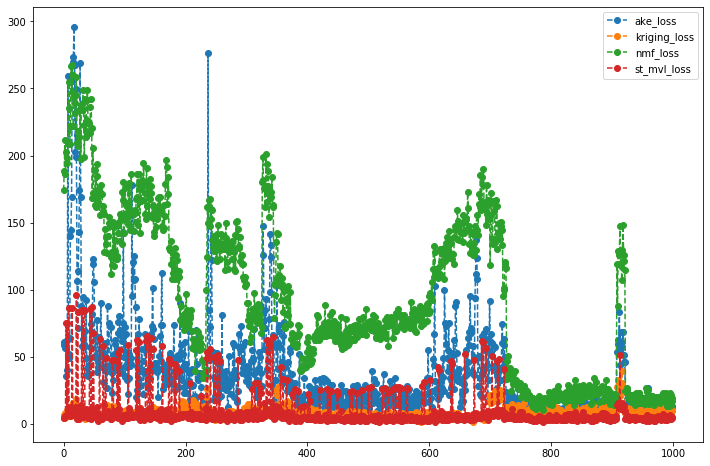

In [79]:
size = 1000
plt.rcParams['figure.figsize']=(12,8)
# x_plot = np.arange(0,29834,1)
plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
plt.legend()
plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

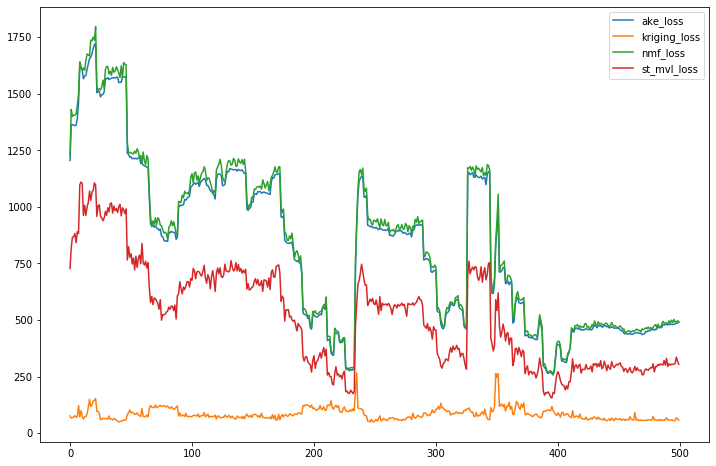

In [97]:
size = 500
plt.rcParams['figure.figsize']=(12,8)
# x_plot = np.arange(0,29834,1)
plt.plot(ake_loss[:size],label='ake_loss')
plt.plot(kriging_loss[:size],label='kriging_loss')
plt.plot(nmf_loss[:size],label='nmf_loss')
plt.plot(st_mvl_loss[:size],label='st_mvl_loss')
plt.legend()
plt.savefig('1_loss_bench_{}_90_11.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

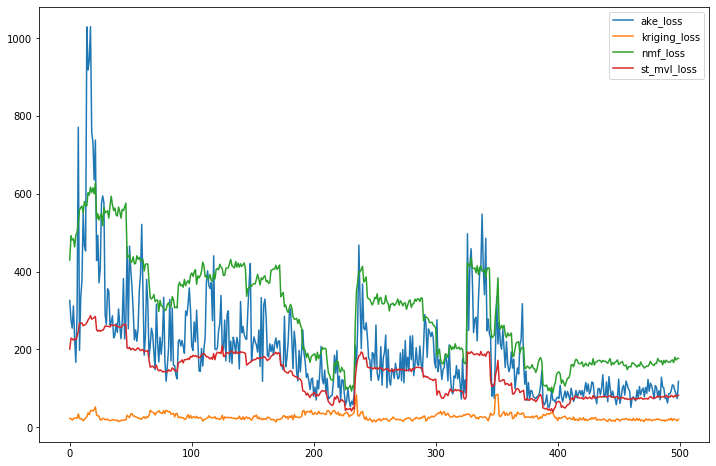

In [82]:
size = 500
plt.rcParams['figure.figsize']=(12,8)
# x_plot = np.arange(0,29834,1)
plt.plot(ake_loss_30[:size],label='ake_loss')
plt.plot(kriging_loss_30[:size],label='kriging_loss')
plt.plot(nmf_loss_30[:size],label='nmf_loss')
plt.plot(st_mvl_loss_30[:size],label='st_mvl_loss')
plt.legend()
plt.savefig('1_loss_bench_{}_30_11.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

In [23]:
ake = AKE()
rec = ake.predict(data_matrix)
print(np.sum(np.abs(rec-tensor_array[0])))

277.1402164671953


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


In [24]:
odKrigin = OrdryKriging()
odKrigin.train(data_matrix)
rec1 = odKrigin.predict()
print(np.sum(np.abs(rec1-tensor_array[0])))

20.730836590548172


In [25]:
nmf = NMF()
rec2 = nmf.predict(data_matrix,mask)
print(np.sum(np.abs(rec2-tensor_array[0])))

427.42631196277574


In [27]:
stmvl = ST_MVL()
ds = get_distance_matrix(data_matrix,True)
rec3 = stmvl.predict(data_matrix,ds)
print(np.sum(np.abs(rec3-tensor_array[0])))

200.4058400880628
